# Projeto MTR

0. Pegar o dataset de heart disease (e possivelmente de airbnb)
1. Manipular os dados para deixá-los prontos para treinamento por modelos de ML 
2. Pesquisar e escolher os modelos para serem testados (de preferência modelos que sabemos ter erros correlacionados)
3. Treinar modelos (tentar achar os melhores hiperparâmetros, usar validação cruzada de 5 ou 10 folds)
4. Construir assessores (treinados para tentar prever o erro dos modelos) (também tentar achar melhores hiperparâmetros):

    4.1. Um assessor para cada modelo (RandomForestRegressor ou algum outro)
    
    4.2. Um assessor multi-target para todos os modelos (RegressorChains (outputs relacionados) **e** Single Target Method (outputs independentes))
    
    4.3. Um assessor para cada "família" ou grupo de modelos de ML com erros correlacionados (RegressorChains)

5. Coletar resultados e tirar conclusões para apresentar

## Imports e funções

In [1]:
from utils import *
from MSVR import MSVR
from experiment_setup import ExpSetup, GroupedAssessor, OptunaStudy

/home/pbsl/pog/proj-mtr/.venv/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


# Dataset

In [2]:
DIR = 'bug'

seed = 1736114453#randint(0, 4294967295)
print(seed)

1736114453


In [3]:
setup = ExpSetup(DIR, seed, 0)

Xa_train, Xa_train_norm, Xa_test, Xa_test_norm, ya_train, ya_test, pred_corrls, pred_corrls2, performs = setup.assessorData()

Nº de instâncias: 997
[REGISTERED: DTREE]
[Training]

Accuracy:         0.9982
Recall:           1.0000
Precision:        0.9965
F1:               0.9982
AUROC:            1.0000
AUPR:             0.9999
1-maxProb média:  0.0018
1-maxProb dp:     0.0139

[Testing]

Accuracy:         0.7622
Recall:           0.3000
Precision:        0.4706
F1:               0.3664
AUROC:            0.6004
AUPR:             0.3045
1-maxProb média:  0.0003
1-maxProb dp:     0.0059

[REGISTERED: SGD]
[Training]

Accuracy:         0.7711
Recall:           0.6796
Precision:        0.8319
F1:               0.7481
AUROC:            0.8481
AUPR:             0.8656
1-maxProb média:  0.2569
1-maxProb dp:     0.1432

[Testing]

Accuracy:         0.8023
Recall:           0.6375
Precision:        0.5604
F1:               0.5965
AUROC:            0.8045
AUPR:             0.6593
1-maxProb média:  0.2599
1-maxProb dp:     0.1347

[REGISTERED: LR]
[Training]

Accuracy:         0.7711
Recall:           0.6690
Precision: 

/home/pbsl/pog/proj-mtr/experiment_setup.py:114: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['class'] = df['class'].replace({'NO_BUG':0, 'BUG':1})


[Training]

Accuracy:         0.9947
Recall:           1.0000
Precision:        0.9895
F1:               0.9947
AUROC:            0.9999
AUPR:             0.9998
1-maxProb média:  0.0132
1-maxProb dp:     0.0474

[Testing]

Accuracy:         0.7794
Recall:           0.3500
Precision:        0.5283
F1:               0.4211
AUROC:            0.7065
AUPR:             0.5024
1-maxProb média:  0.0206
1-maxProb dp:     0.0621

[REGISTERED: KAN]
[Training]

Accuracy:         0.8451
Recall:           0.8345
Precision:        0.8525
F1:               0.8434
AUROC:            0.9217
AUPR:             0.9168
1-maxProb média:  0.1782
1-maxProb dp:     0.1439

[Testing]

Accuracy:         0.7765
Recall:           0.5375
Precision:        0.5119
F1:               0.5244
AUROC:            0.7359
AUPR:             0.5859
1-maxProb média:  0.1839
1-maxProb dp:     0.1631

[REGISTERED: RFOREST]
[Training]

Accuracy:         0.9982
Recall:           1.0000
Precision:        0.9965
F1:               0.998

In [4]:
ya_train_copy = ya_train.copy()
ya_test_copy = ya_test.copy()
pred_corrls_copy = pred_corrls.copy()
pred_corrls2_copy = pred_corrls2.copy()

# Assessors

#### Análise de correlações

Conjunto de Treinamento:

O conjunto de teste dos modelos base já é o conjunto de treinamento dos assessores.

In [7]:
groups = {}
model_names = ['rforest', 'gb', 'adab', 'xgb'] # ['dtree', 'xgb', 'knn'] #list(performs.keys())

ya_train = ya_train_copy[model_names]
ya_test = ya_test_copy[model_names]
pred_corrls = pred_corrls_copy.loc[model_names, model_names]
pred_corrls2 = pred_corrls2_copy.loc[model_names, model_names]

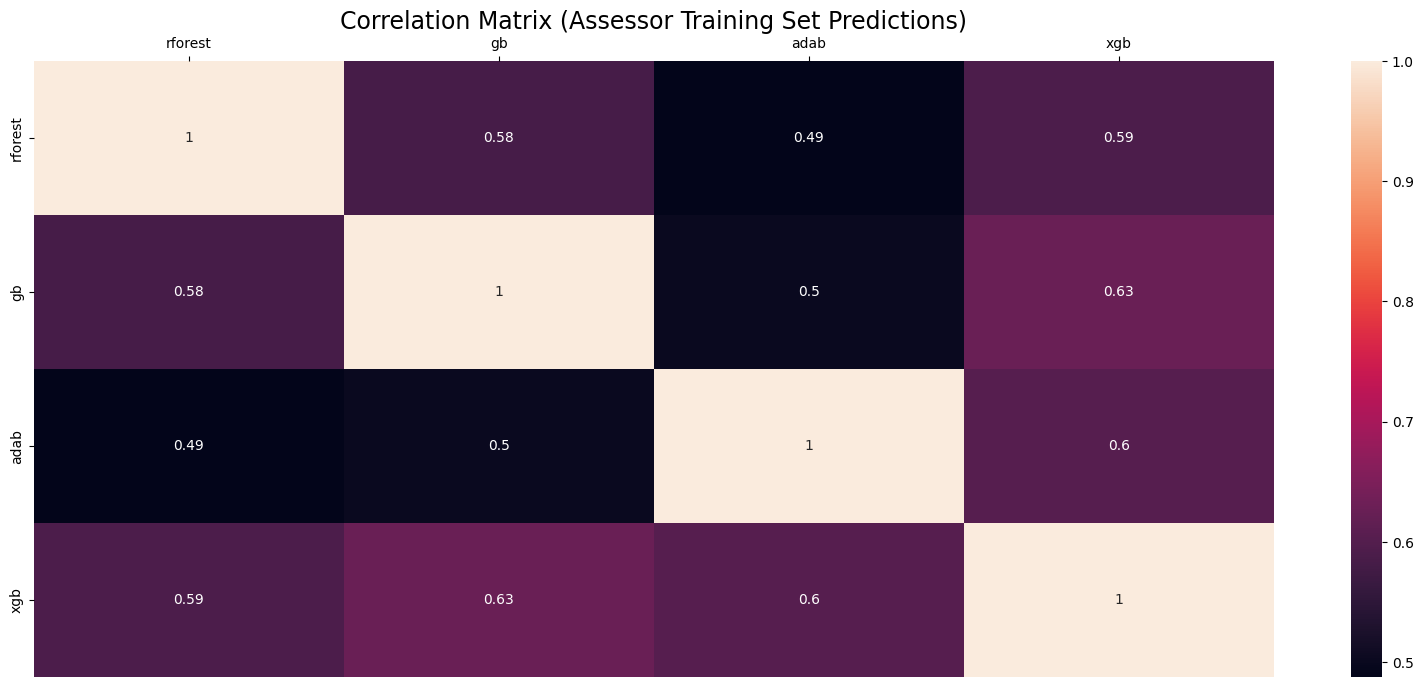

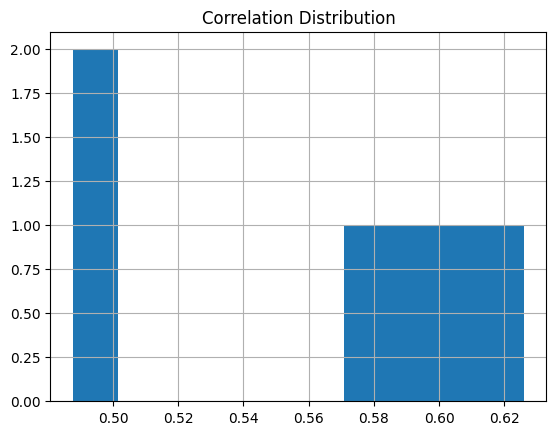

Training correlation distribution:
count    6.000000
mean     0.565633
std      0.057040
min      0.487707
25%      0.521962
50%      0.587659
75%      0.600417
max      0.626038
Name: corr, dtype: float64
[Saved image "cm_atrain.eps"]
[Saved image "cd_atrain.eps"]


In [8]:
correlation_matrix(pred_corrls, True, DIR, 'Assessor', 'Training')

In [10]:
MIN_SCORE = 0.55 #corrls_values['corr'].quantile(0.75)

print('Min_score:', MIN_SCORE)

groups['true_assessor_train'] = group_search(pred_corrls, MIN_SCORE)
groups['true_assessor_train']

Min_score: 0.55


[['xgb', 'adab'], ['xgb', 'rforest', 'gb']]

Conjunto de Teste:

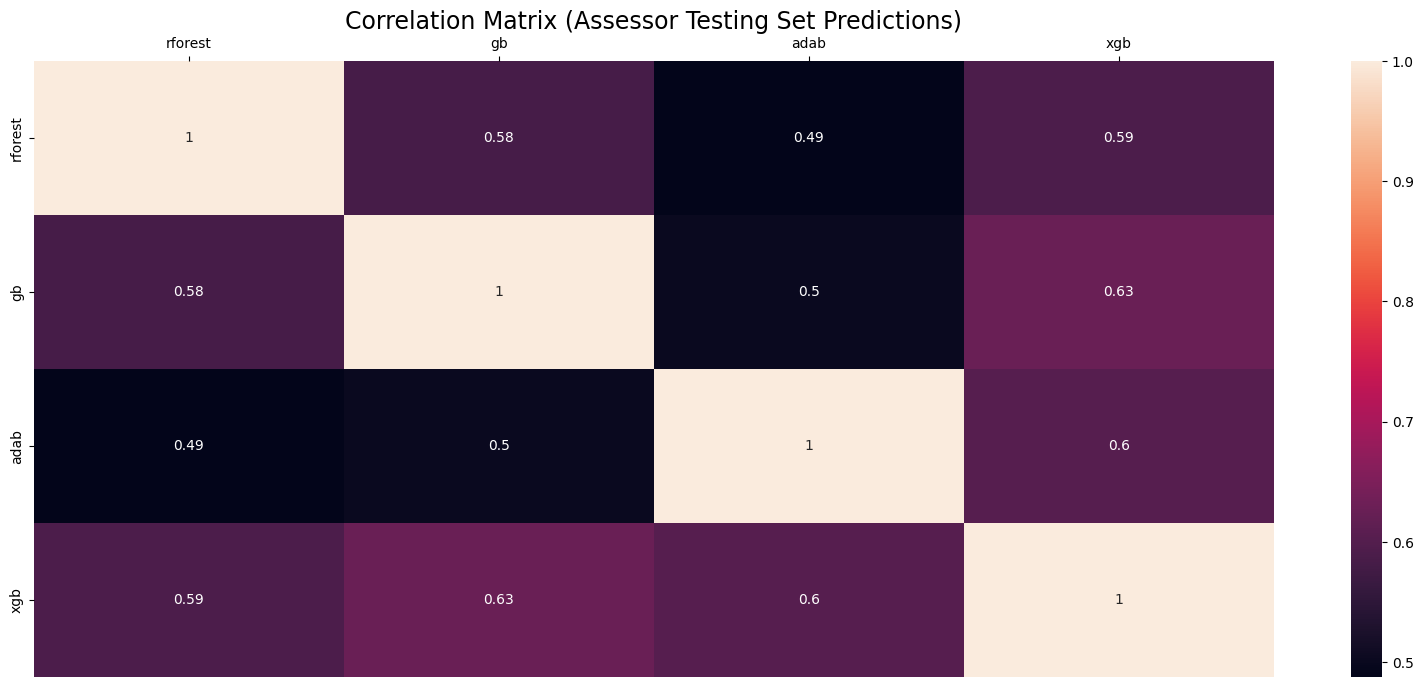

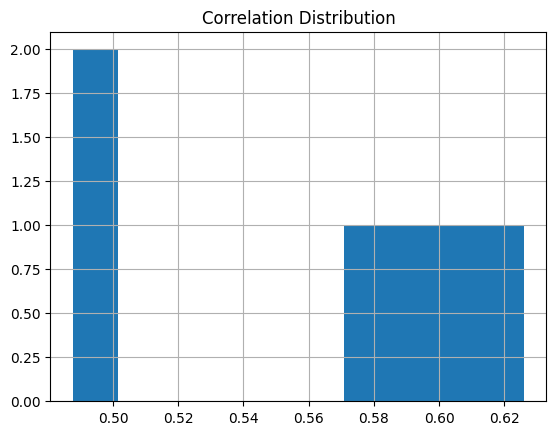

Testing correlation distribution:
count    6.000000
mean     0.565633
std      0.057040
min      0.487707
25%      0.521962
50%      0.587659
75%      0.600417
max      0.626038
Name: corr, dtype: float64
[Saved image "cm_atest.eps"]
[Saved image "cd_atest.eps"]


In [ ]:
correlation_matrix(pred_corrls2, True, DIR, 'Assessor', 'Testing')

In [12]:
groups['true_assessor_test'] = group_search(pred_corrls2, MIN_SCORE)
groups['true_assessor_test']

[['xgb', 'adab'], ['xgb', 'rforest', 'gb']]

Diferença entre correlações do conjnuto de teste e de treinamento:
MSE:  0.0003
NMSE: 0.0082
MAE:  0.0137
NMAE: 0.0835
aRRMSE: 0.0880
aCC:  0.9979


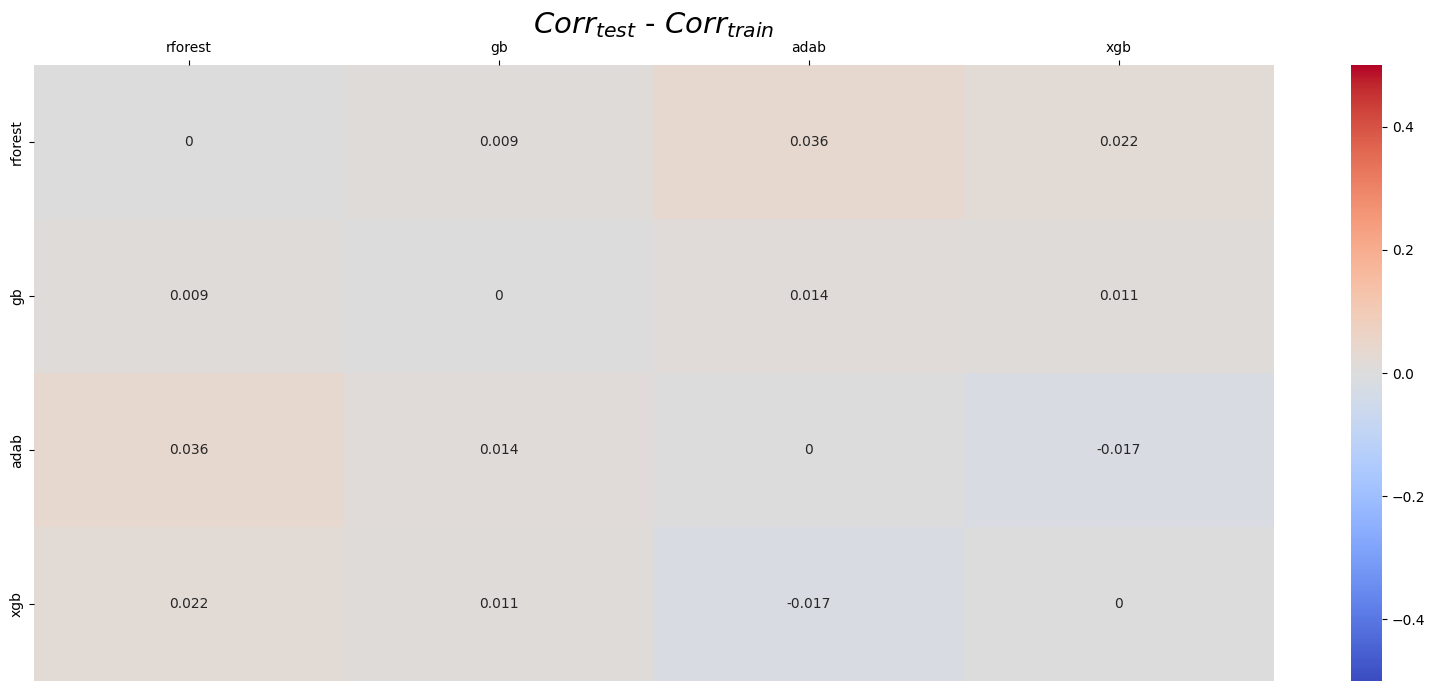

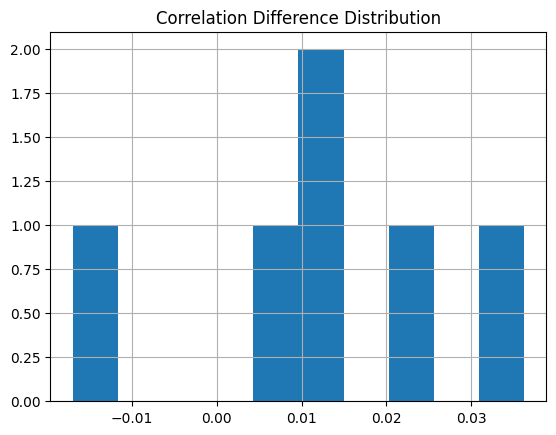

[Saved image "cmd_base.eps"]
[Saved image "cdd_base.eps"]


In [13]:
diff_corrls = pred_corrls2-pred_corrls
diff_corrls_values = corrlArray(diff_corrls)['corr']

print(f'''Diferença entre correlações do conjnuto de teste e de treinamento:
MSE:  {mse(pred_corrls, pred_corrls2):.4f}
NMSE: {nmse(pred_corrls, pred_corrls2):.4f}
MAE:  {mae(pred_corrls, pred_corrls2):.4f}
NMAE: {nmae(pred_corrls, pred_corrls2):.4f}
aRRMSE: {rrmse(pred_corrls, pred_corrls2):.4f}
aCC:  {corrCoeff(pred_corrls, pred_corrls2):.4f}''')

plt.figure(figsize=(20,8))
plt.title(r'$Corr_{test}$ - $Corr_{train}$', fontsize=21)
hm = sns.heatmap(diff_corrls, annot=True, cmap='coolwarm', vmin=-0.5, vmax=0.5)
hm.xaxis.tick_top()
plt.show(hm)

plt.title('Correlation Difference Distribution')
hg = diff_corrls_values.hist()
plt.show(hg)

save2figs(hm, hg, DIR)

## Globais

In [14]:
parameters = {'max_depth':[None,10,20,30],
                    'criterion':['squared_error', 'poisson', 'friedman_mse'],
                    'min_samples_split':[2,5,10,20,40,60],
                    'min_samples_leaf':[1,2,10,30],
                    'n_estimators':[20,50,100,150]}

In [15]:
# Criando o MultiIndex
multi_index = multIdx('ST','MRT','MRT(g)','M-SVR','M-SVR(g)','RC','RC(g)', subindex=model_names)

metrics_cols = ['MSE', 'MAE', 'NMSE', 'NMAE', 'aRRMSE', 'aCC']
metrics_df = pd.DataFrame(columns=metrics_cols, index=multi_index)
diff_metrics = pd.DataFrame(columns=metrics_cols, index=['ST','MRT','MRT(g)','M-SVR','M-SVR(g)','RC','RC(g)'])

### Regressor Chain
(RC)

In [12]:
#study = OptunaStudy(Xa_train, ya_train, 30, seed)
#
#study.search(RegressorChain, cv=5)
#
#rc_params = study.best_params
#regchain = RegressorChain(RandomForestRegressor(random_state=seed).set_params(**rc_params),
#                          random_state=seed, cv=5, verbose=True).fit(Xa_train, ya_train)

In [85]:
regchain = RegressorChain(RandomForestRegressor(random_state=seed), random_state=seed, cv=5,
                          verbose=True, order='random').fit(Xa_train, ya_train)

[Chain] ................... (1 of 4) Processing order 0, total=   0.2s
[Chain] ................... (2 of 4) Processing order 1, total=   0.3s
[Chain] ................... (3 of 4) Processing order 2, total=   0.2s
[Chain] ................... (4 of 4) Processing order 3, total=   0.2s


In [86]:
metrics_df.loc['RC',:] = assr_performance(regchain, Xa_test, ya_test, Xa_train, ya_train)

metrics_df.loc['RC',:]

[TRAINING SET]
MSE: 0.0262
NMSE: 0.3005
MAE: 0.0927
NMAE: 0.4426
aRRMSE: 0.5352
aCC: 0.8562

[TESTING SET]
MSE: 0.0775
NMSE: 0.8522
MAE: 0.1697
NMAE: 0.7815
aRRMSE: 0.9223
aCC: 0.3992


MSE       MAE      NMSE      NMAE    aRRMSE       aCC
Model                                                              
rforest  0.062368  0.760117  0.170469  0.746096  0.871847  0.493599
gb       0.142943  0.918627   0.25739  0.801837   0.95845   0.32598
adab     0.002476  0.795496  0.033494  0.745096  0.891906  0.462718
xgb      0.102033  0.934713  0.217264  0.832907  0.966806  0.314579

#### Análise das correlações

Melhorar esse cálculo de correlação para fazer melhor uso do 1-(probabilidade da classe correta)

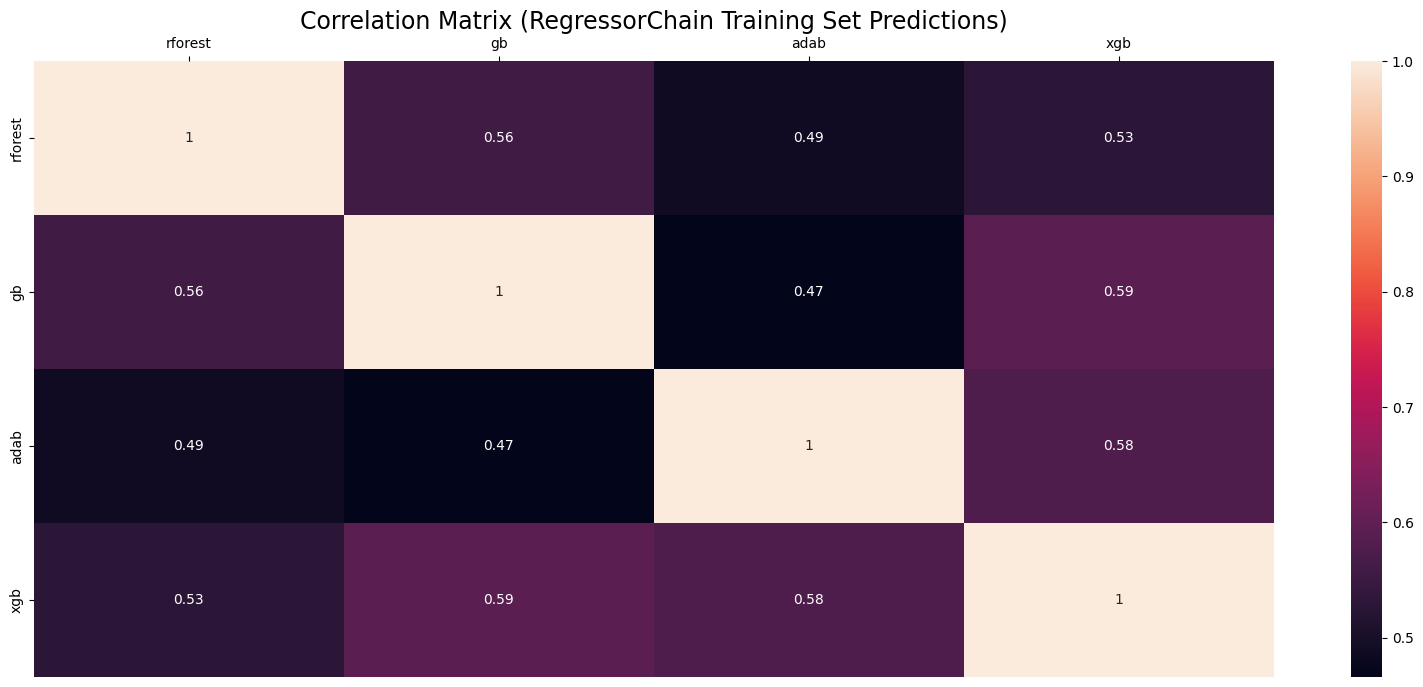

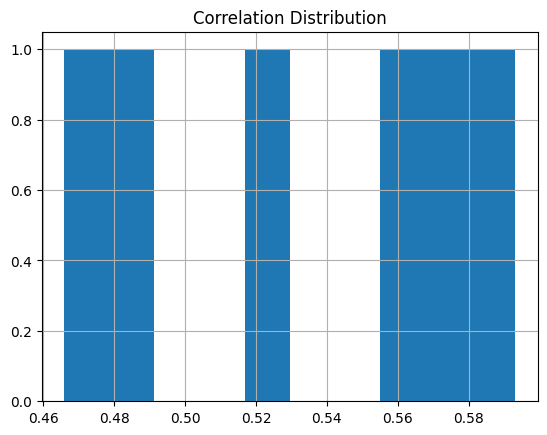

Training correlation distribution:
count    6.000000
mean     0.534026
std      0.050193
min      0.465946
25%      0.496837
50%      0.541473
75%      0.570521
max      0.593103
Name: corr, dtype: float64


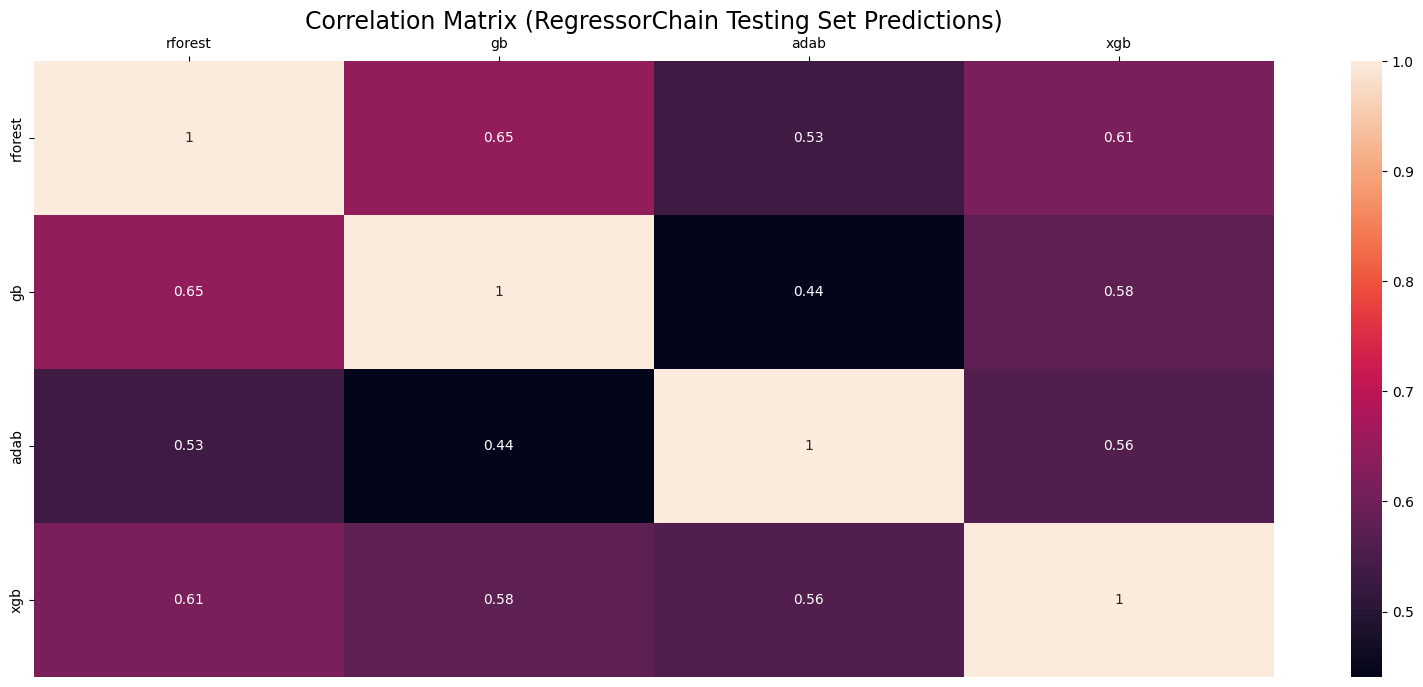

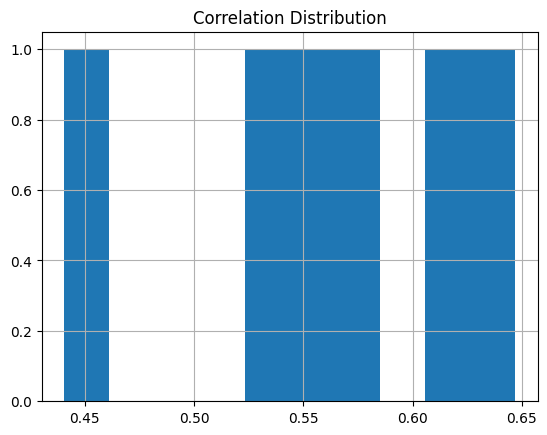

Testing correlation distribution:
count    6.000000
mean     0.561974
std      0.071842
min      0.440614
25%      0.539378
50%      0.568681
75%      0.605166
max      0.646932
Name: corr, dtype: float64

Diferença entre correlações das previsões do assessor e do conjunto de teste:
MSE: 0.0016
NMSE: 0.0281
MAE: 0.0467
NMAE: 0.1777
aRRMSE: 0.2091
aCC: 0.9869


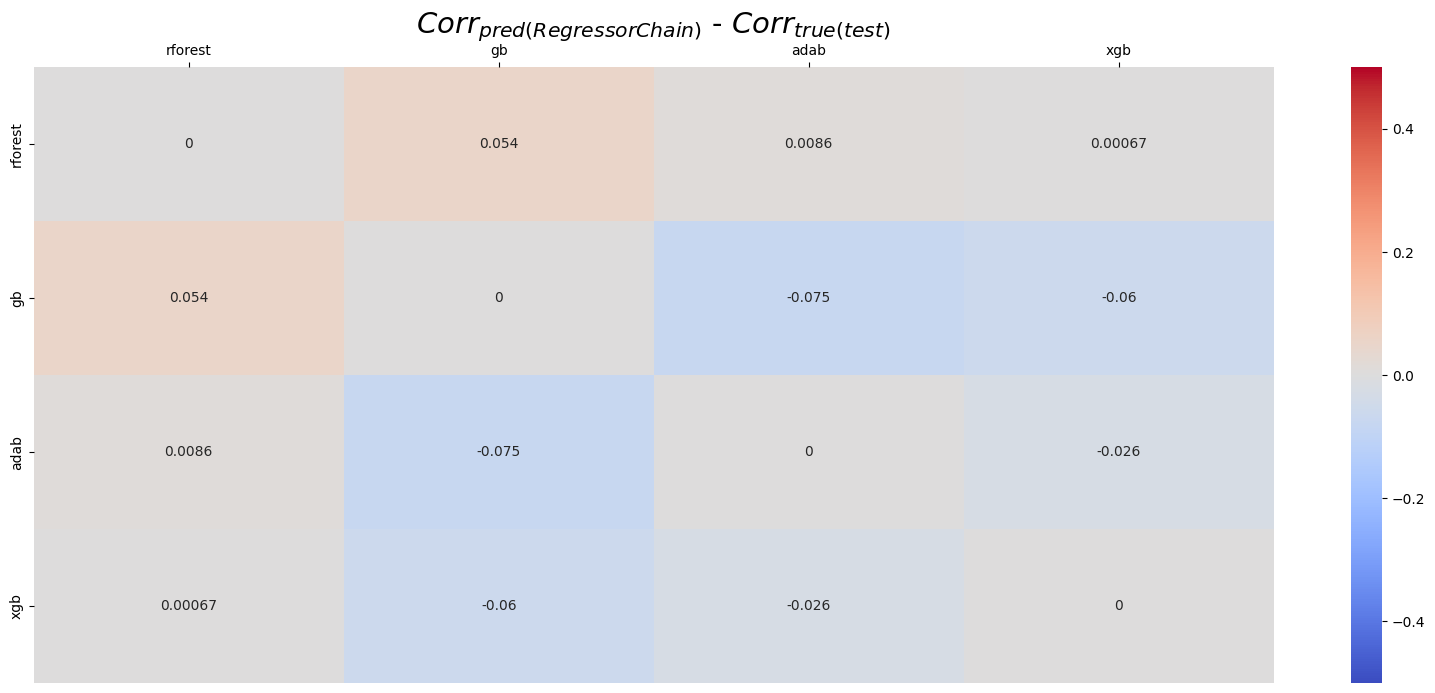

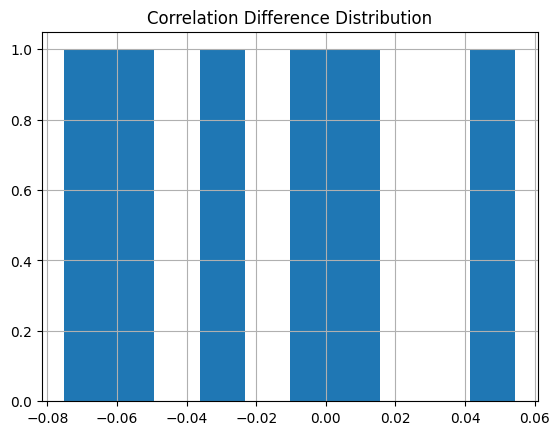

In [87]:
#regchain_corrls = pd.DataFrame(regchain.predict(Xa_train), 
#                               index=Xa_train.index,
#                               columns=model_names).corr('kendall') 

results = correlation_pred_performance(regchain, Xa_test, ya_test, Xa_train, 
                                       min_score=MIN_SCORE, name="RegressorChain",
                                       show_plot=True, save_plot=None)

In [88]:
diff_metrics.loc['RC',:] = results['results']
diff_metrics.loc['RC',:]

MSE       0.001614
MAE       0.028086
NMSE       0.04665
NMAE      0.177681
aRRMSE    0.209144
aCC       0.986913
Name: RC, dtype: object

In [89]:
groups['regchain_assessor'] = results['groups']
groups['regchain_assessor']['test']

[['xgb', 'adab'], ['xgb', 'rforest', 'gb']]

### Ensemble of Regressor Chains

In [92]:
num_chains = 50
rc_ac = f'RC[{num_chains}]'

rc_ests = [RegressorChain(base_estimator=RandomForestRegressor(random_state=seed),
                          random_state=seed+i,
                          order='random', cv=5) for i in range(num_chains)]

rc_plus = GroupedAssessor(rc_ests).fit(Xa_train, ya_train)

In [103]:
# keeping the concat because multiple numbers of chains could be recorded
if(rc_ac in metrics_df.index):
    metrics_df.loc[rc_ac,:] = assr_performance(rc_plus, Xa_test, ya_test, Xa_train, ya_train)
else:
    new_df = pd.DataFrame(assr_performance(rc_plus, Xa_test, ya_test, Xa_train, ya_train), 
                          columns=metrics_cols,
                          index=multIdx(rc_ac, subindex=model_names))

    metrics_df = pd.concat([metrics_df, new_df])
metrics_df.loc[rc_ac,:]

[TRAINING SET]
MSE: 0.0227
NMSE: 0.2587
MAE: 0.0918
NMAE: 0.4248
aRRMSE: 0.5062
aCC: 0.9013

[TESTING SET]
MSE: 0.0743
NMSE: 0.8211
MAE: 0.1687
NMAE: 0.7739
aRRMSE: 0.9055
aCC: 0.4268


MSE       MAE      NMSE      NMAE    aRRMSE       aCC
Model                                                              
rforest  0.061117  0.744865  0.173585  0.759734  0.863056  0.506016
gb       0.140483  0.902815  0.258035  0.803846  0.950166  0.335281
adab     0.002436   0.78251  0.032562  0.724357  0.884596   0.47723
xgb      0.093246  0.854217  0.210639  0.807512  0.924238  0.388732

#### Análise das correlações

Melhorar esse cálculo de correlação para fazer melhor uso do 1-(probabilidade da classe correta)

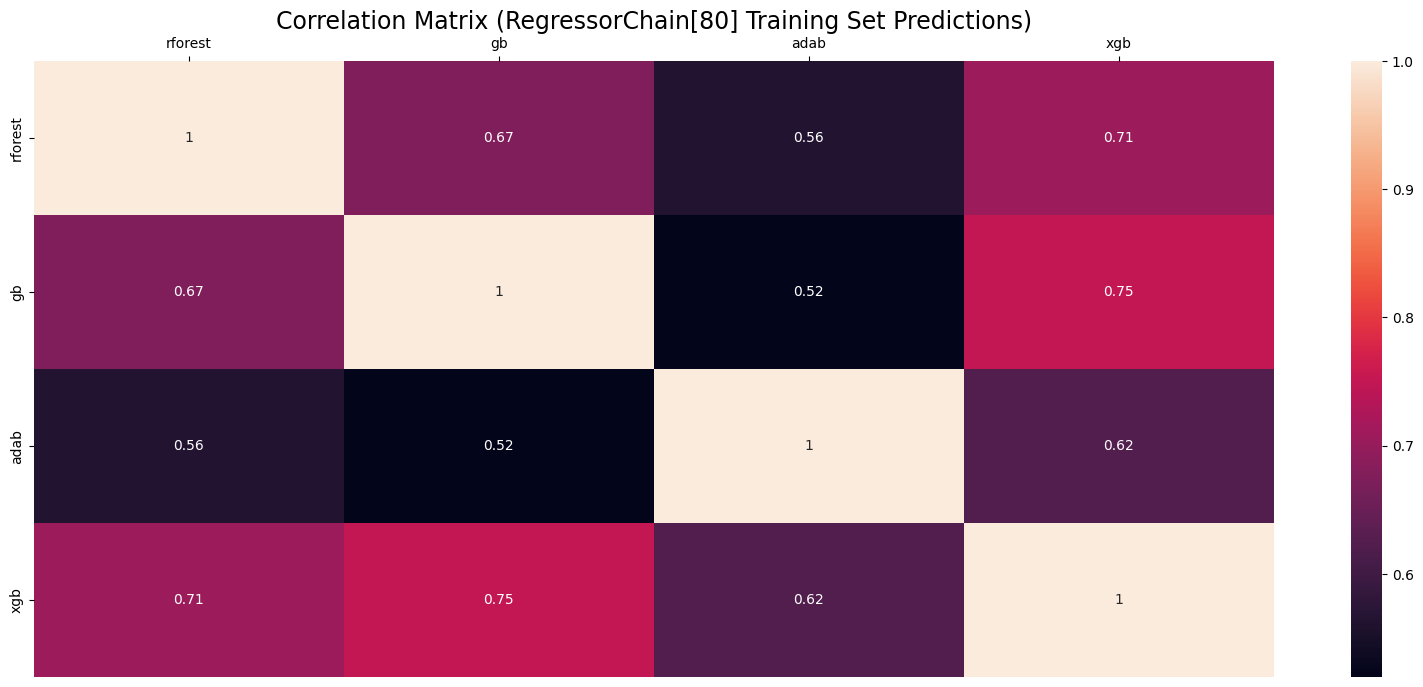

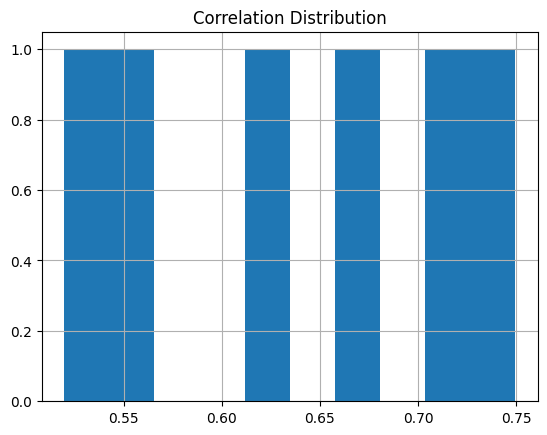

Training correlation distribution:
count    6.000000
mean     0.639158
std      0.087752
min      0.519672
25%      0.577420
50%      0.647799
75%      0.699058
max      0.749576
Name: corr, dtype: float64


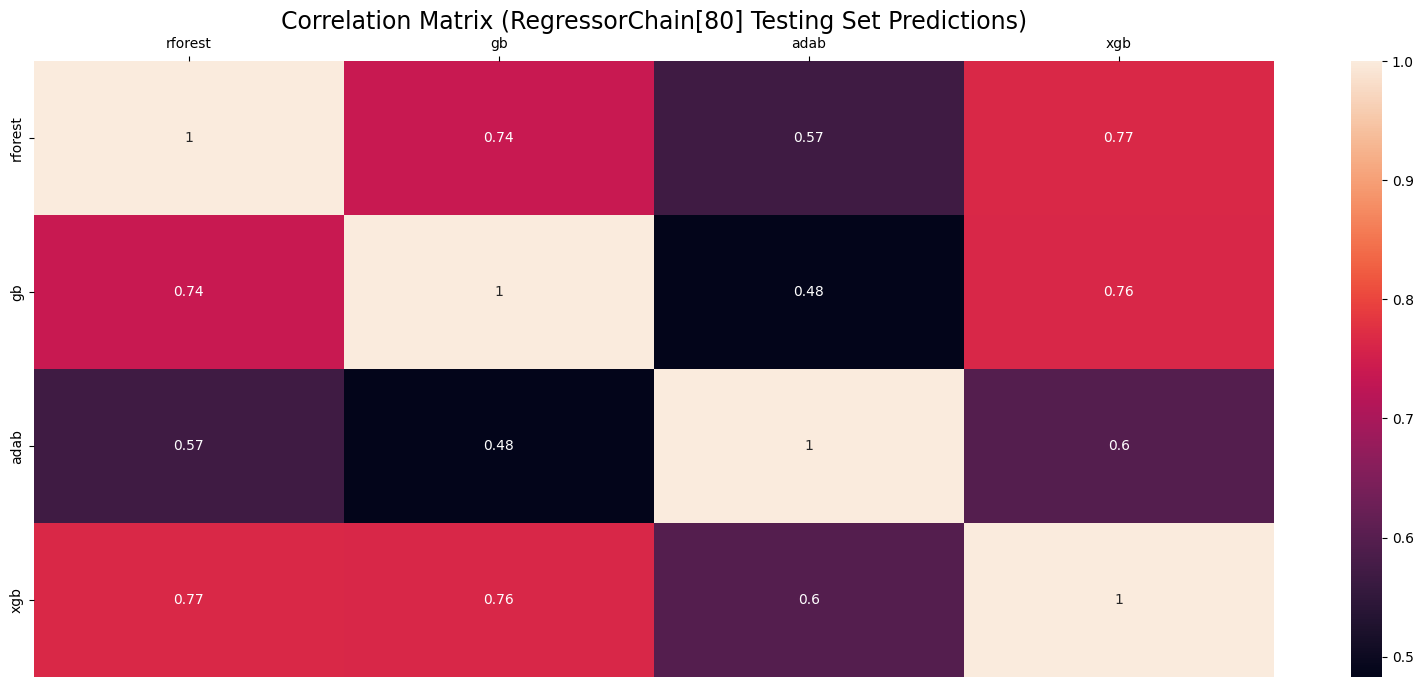

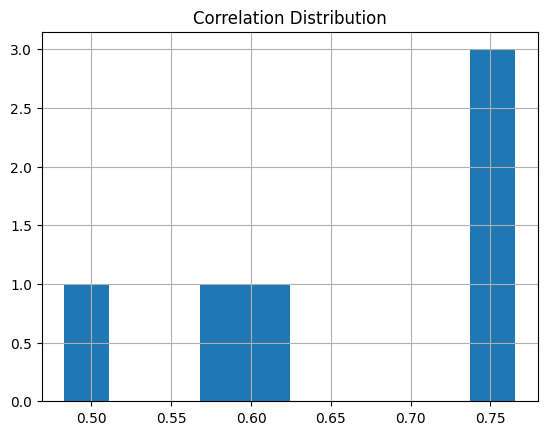

Testing correlation distribution:
count    6.000000
mean     0.652426
std      0.119110
min      0.482953
25%      0.575925
50%      0.667603
75%      0.756004
max      0.765558
Name: corr, dtype: float64

Diferença entre correlações das previsões do assessor e do conjunto de teste:
MSE: 0.0079
NMSE: 0.0639
MAE: 0.2419
NMAE: 0.4116
aRRMSE: 0.4564
aCC: 0.9418


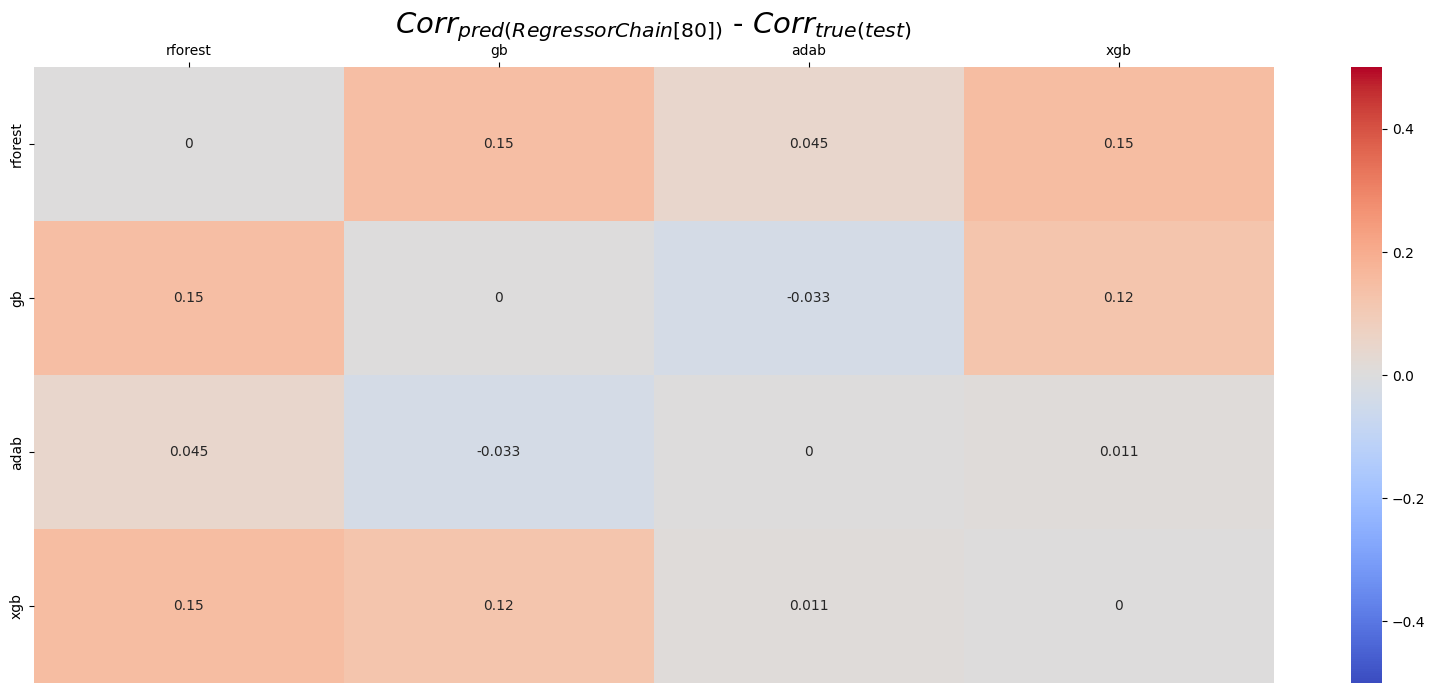

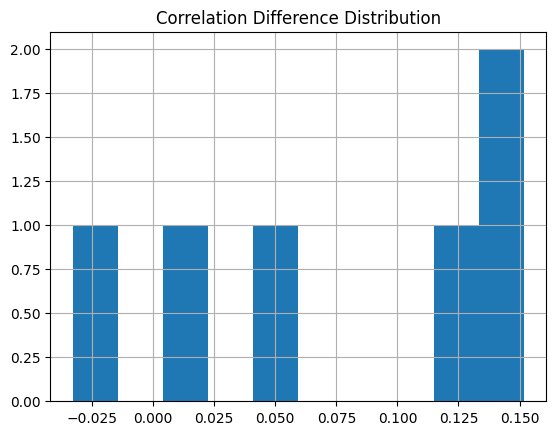

In [57]:
#regchain_corrls = pd.DataFrame(regchain.predict(Xa_train), 
#                               index=Xa_train.index,
#                               columns=model_names).corr('kendall') 
#80chains
results = correlation_pred_performance(rc_plus, Xa_test, ya_test, Xa_train, 
                                       min_score=MIN_SCORE, name=f"RegressorChain[{num_chains}]",
                                       show_plot=True, save_plot=None)

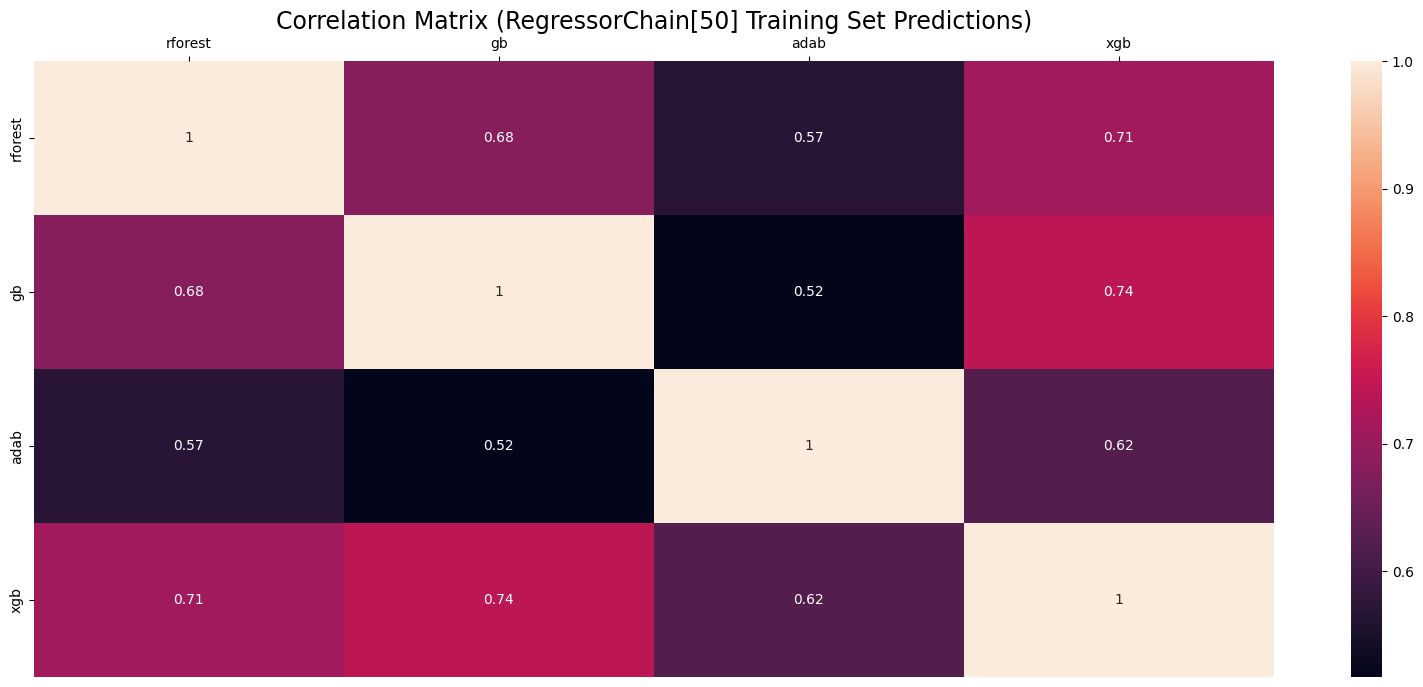

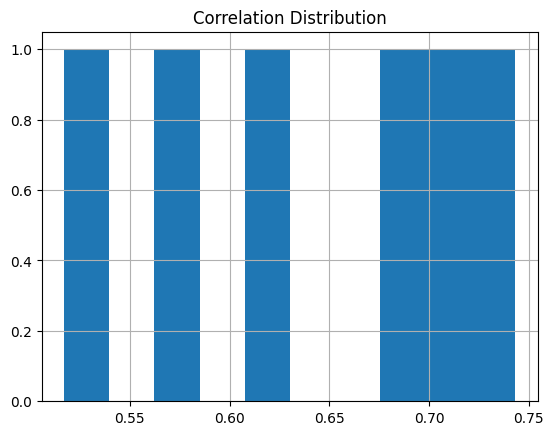

Training correlation distribution:
count    6.000000
mean     0.640503
std      0.086869
min      0.517136
25%      0.582574
50%      0.650944
75%      0.703529
max      0.743153
Name: corr, dtype: float64


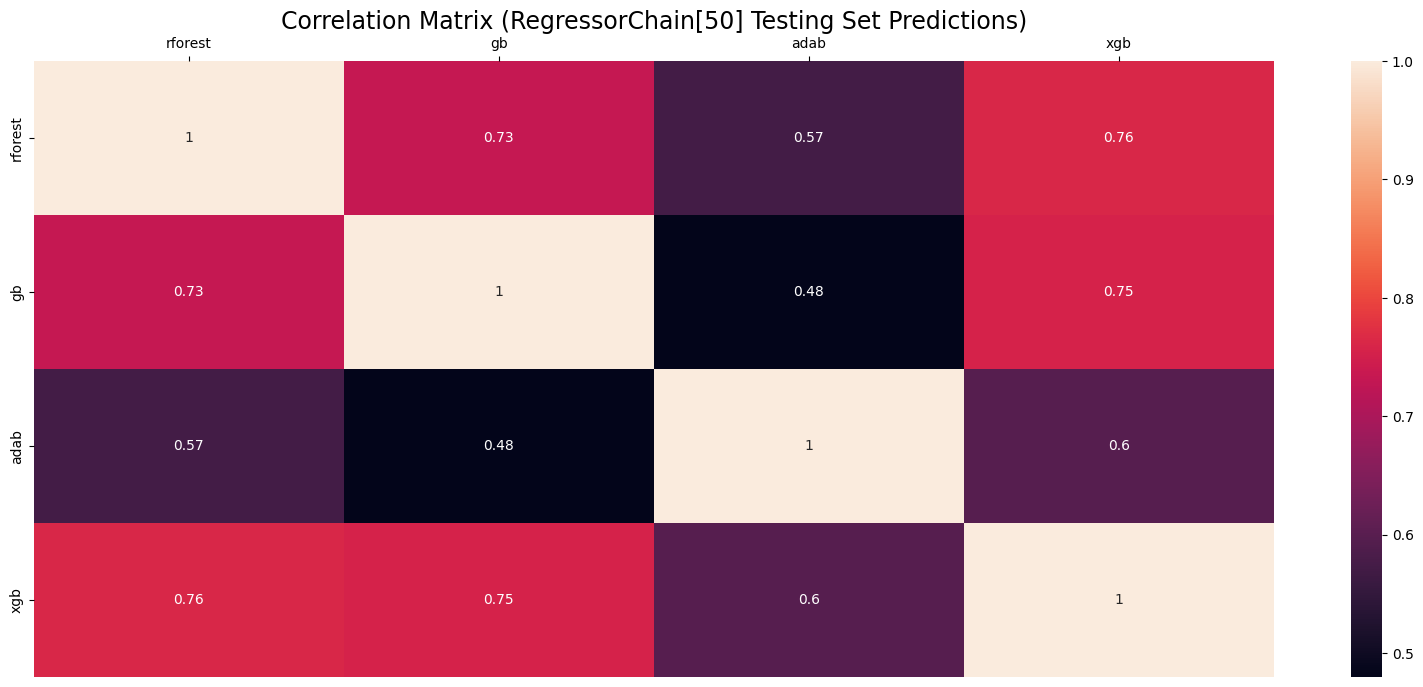

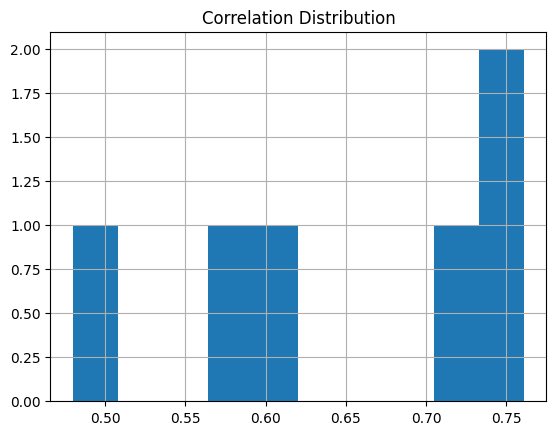

Testing correlation distribution:
count    6.000000
mean     0.649720
std      0.116247
min      0.480054
25%      0.579213
50%      0.664675
75%      0.749132
max      0.760907
Name: corr, dtype: float64

Diferença entre correlações das previsões do assessor e do conjunto de teste:
MSE: 0.0074
NMSE: 0.0626
MAE: 0.2250
NMAE: 0.4027
aRRMSE: 0.4434
aCC: 0.9467


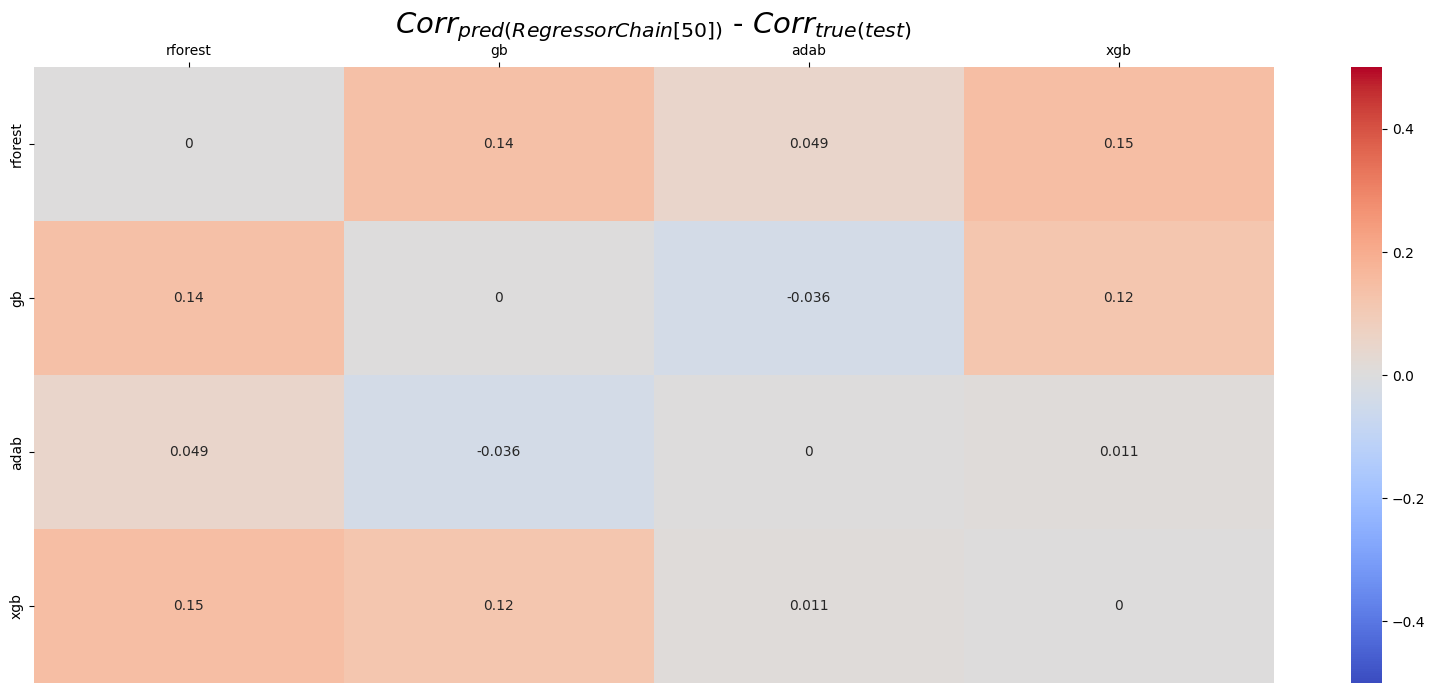

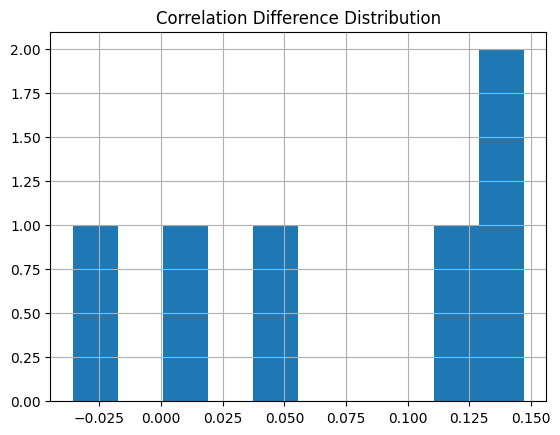

In [94]:
#regchain_corrls = pd.DataFrame(regchain.predict(Xa_train), 
#                               index=Xa_train.index,
#                               columns=model_names).corr('kendall') 
#50chains
results = correlation_pred_performance(rc_plus, Xa_test, ya_test, Xa_train, 
                                       min_score=MIN_SCORE, name=f"RegressorChain[{num_chains}]",
                                       show_plot=True, save_plot=None)

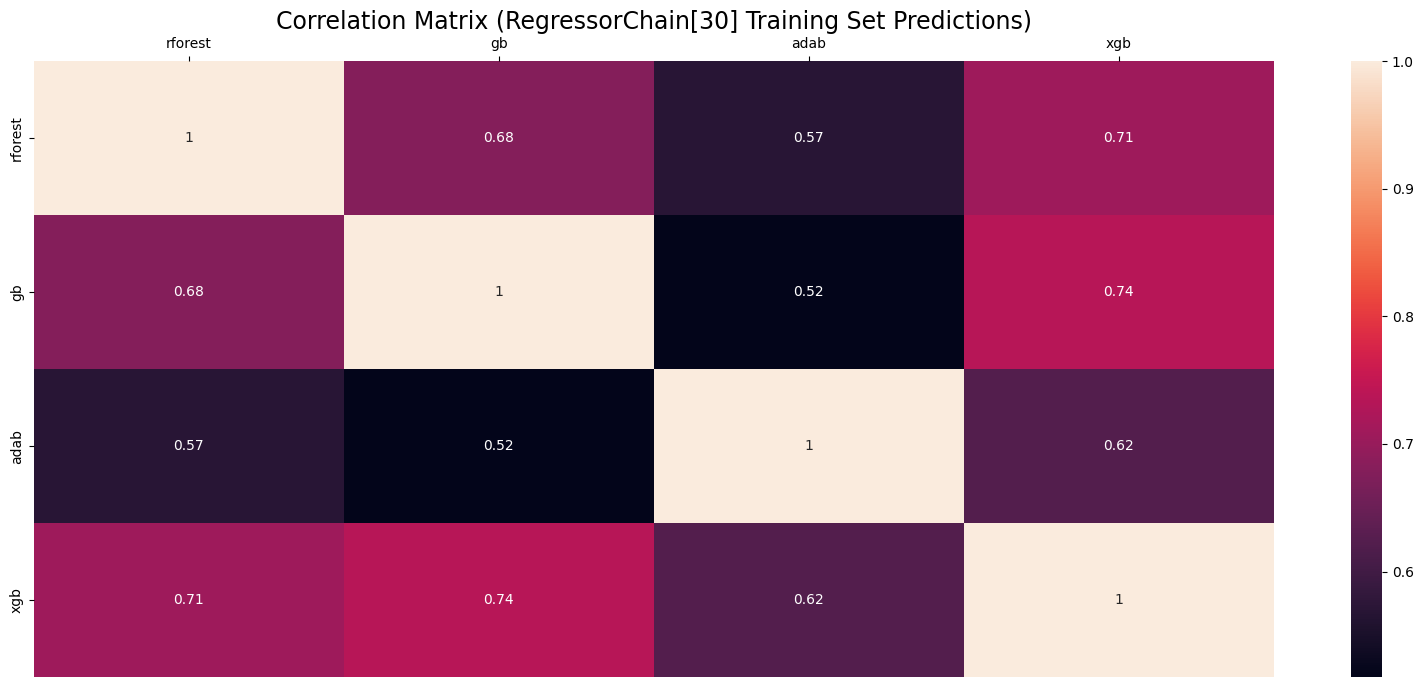

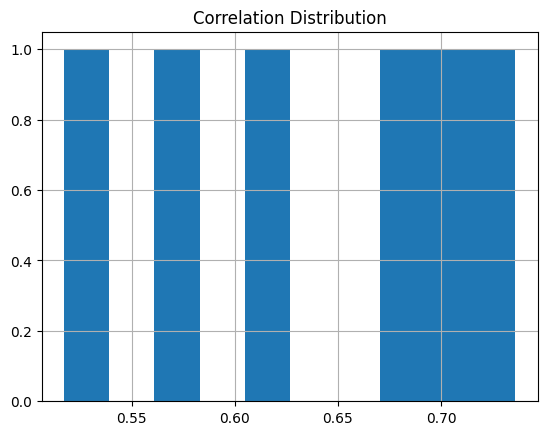

Training correlation distribution:
count    6.000000
mean     0.638121
std      0.084427
min      0.517399
25%      0.581709
50%      0.650000
75%      0.699830
max      0.735940
Name: corr, dtype: float64


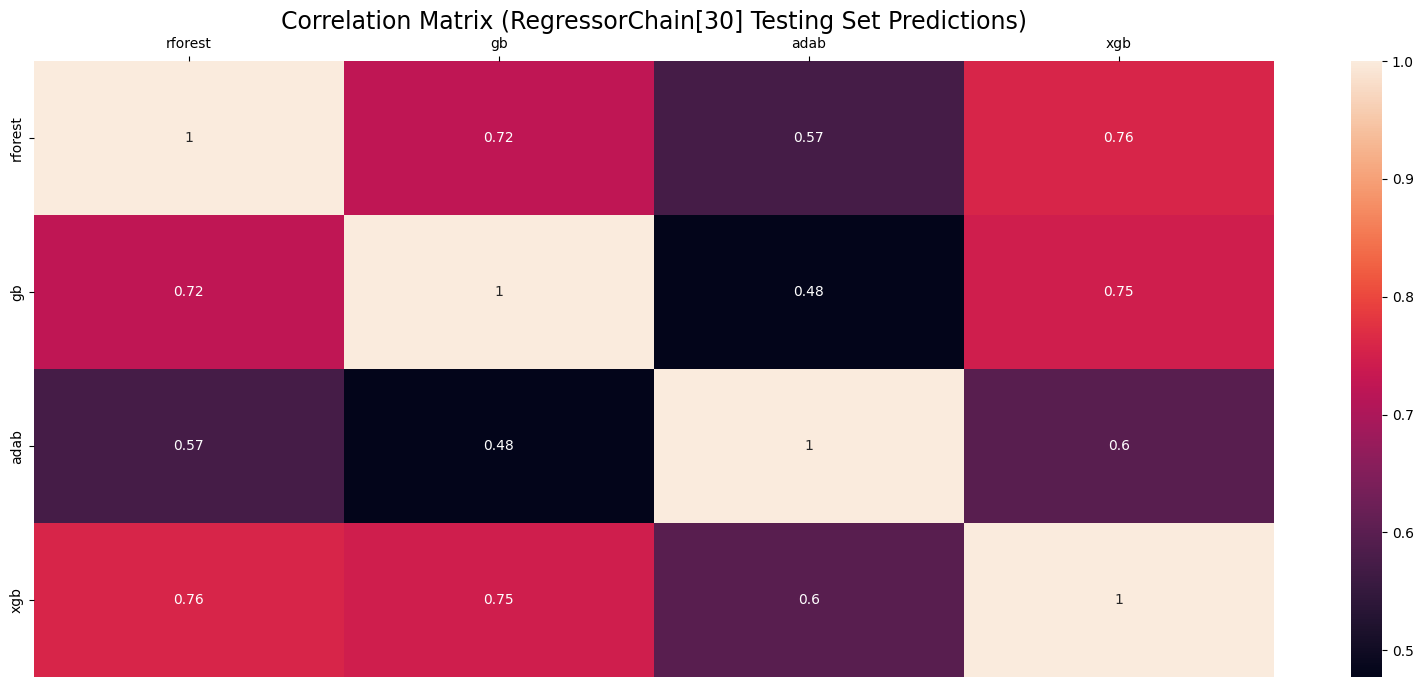

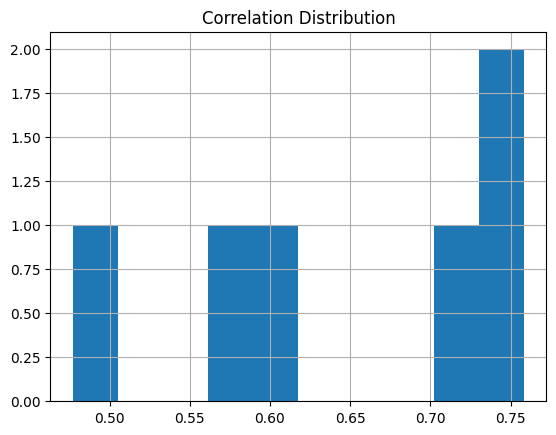

Testing correlation distribution:
count    6.000000
mean     0.645877
std      0.114053
min      0.477245
25%      0.578300
50%      0.660891
75%      0.740607
max      0.758289
Name: corr, dtype: float64

Diferença entre correlações das previsões do assessor e do conjunto de teste:
MSE: 0.0068
NMSE: 0.0604
MAE: 0.2066
NMAE: 0.3884
aRRMSE: 0.4261
aCC: 0.9510


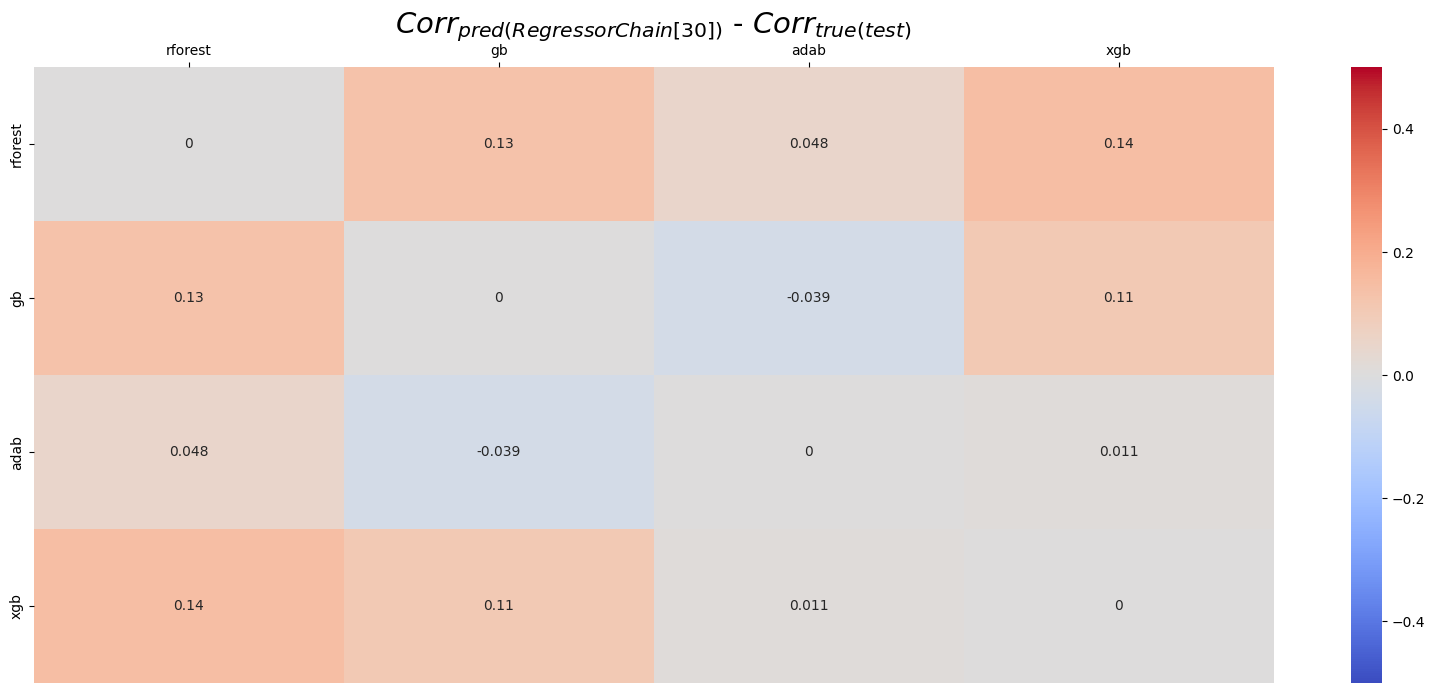

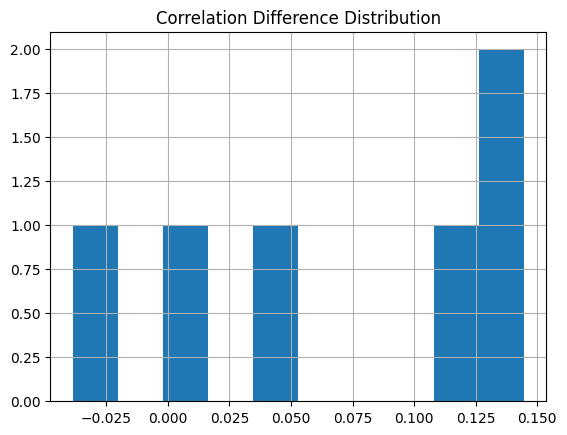

In [39]:
#regchain_corrls = pd.DataFrame(regchain.predict(Xa_train), 
#                               index=Xa_train.index,
#                               columns=model_names).corr('kendall') 
#30chains
results = correlation_pred_performance(rc_plus, Xa_test, ya_test, Xa_train, 
                                       min_score=MIN_SCORE, name=f"RegressorChain[{num_chains}]",
                                       show_plot=True, save_plot=None)

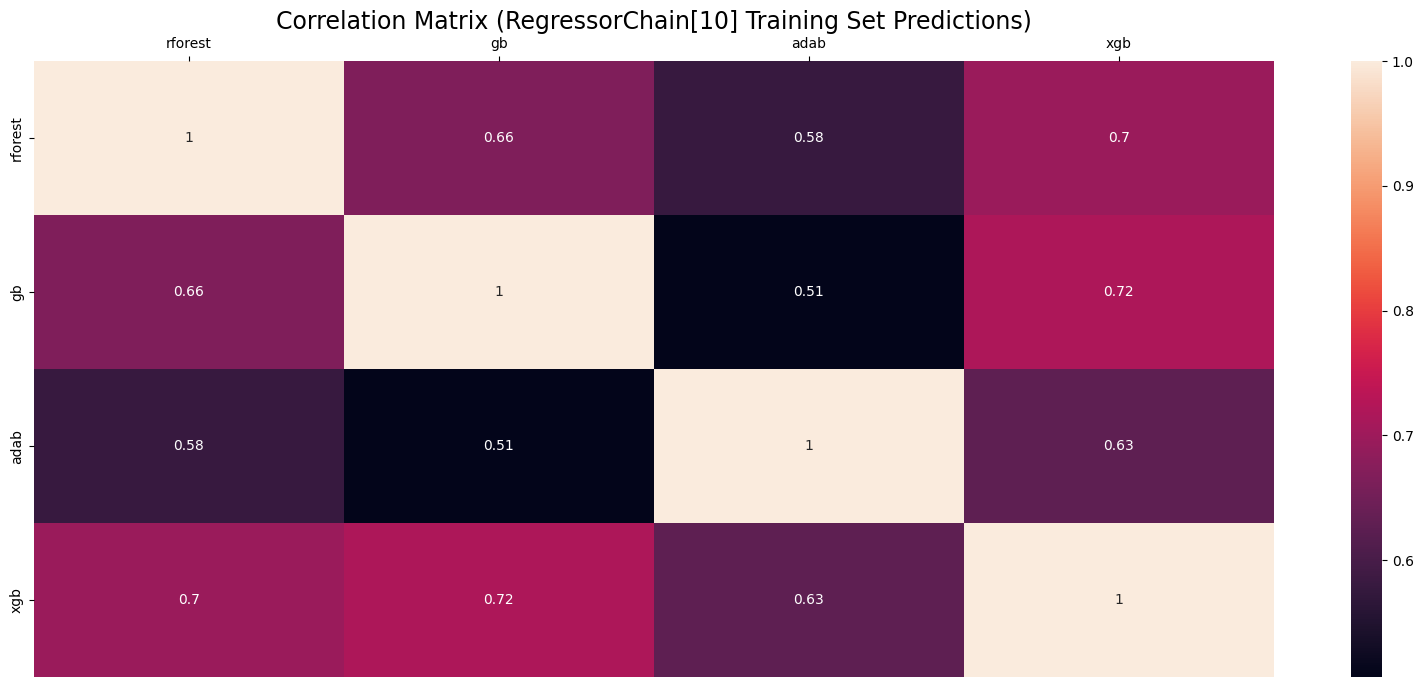

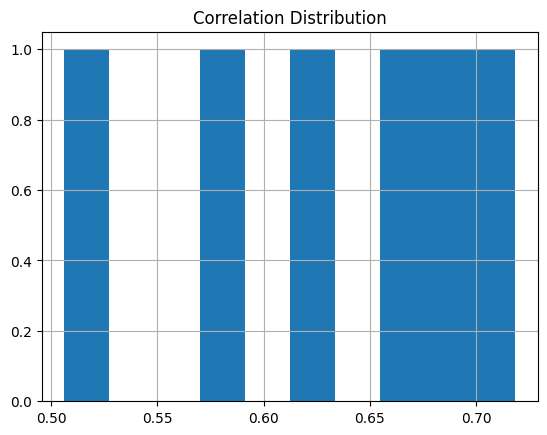

Training correlation distribution:
count    6.000000
mean     0.631676
std      0.079035
min      0.506233
25%      0.590619
50%      0.645872
75%      0.687612
max      0.718351
Name: corr, dtype: float64


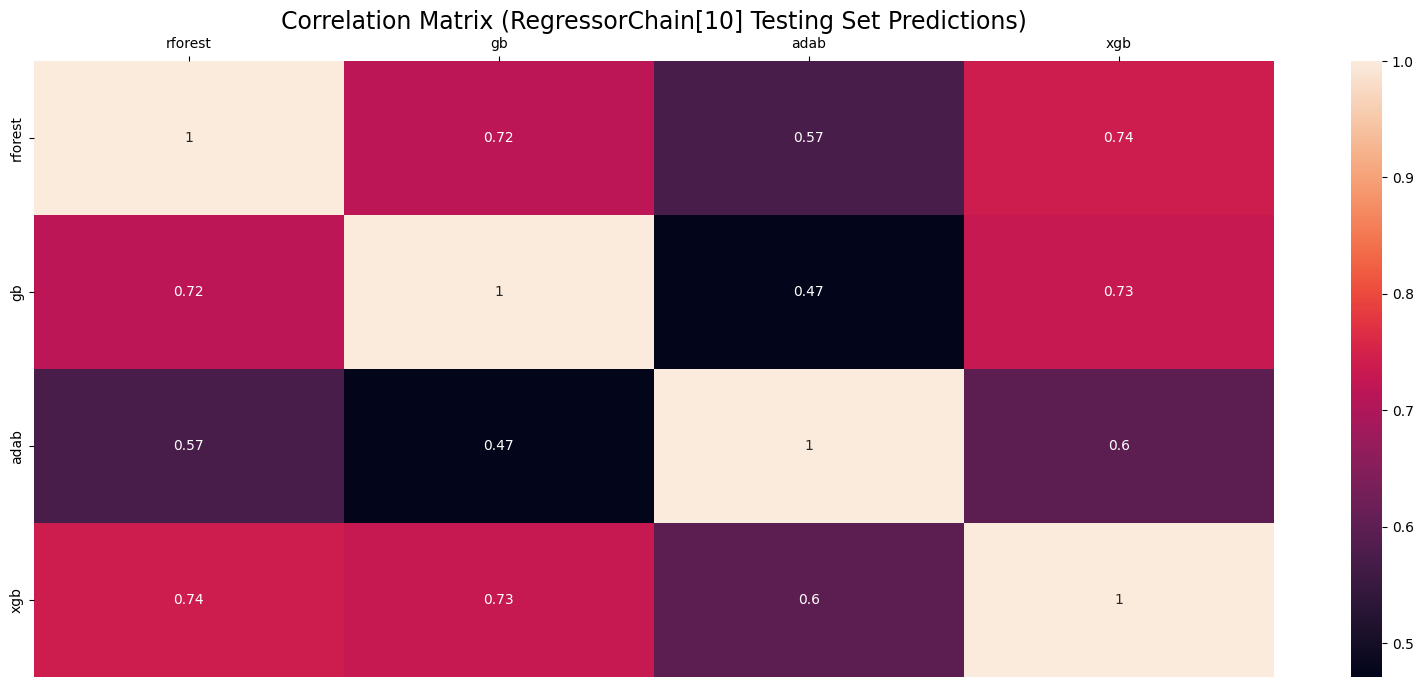

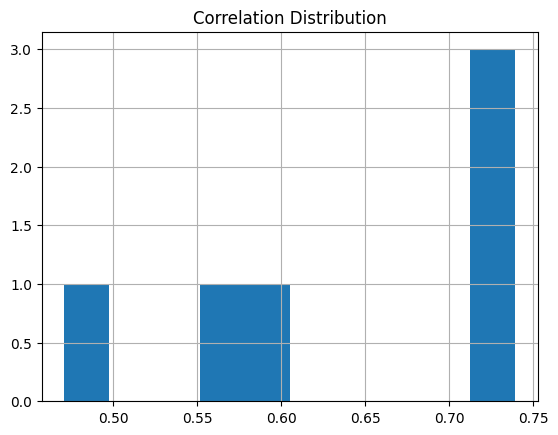

Testing correlation distribution:
count    6.000000
mean     0.637962
std      0.108105
min      0.470957
25%      0.579792
50%      0.657153
75%      0.726151
max      0.739352
Name: corr, dtype: float64

Diferença entre correlações das previsões do assessor e do conjunto de teste:
MSE: 0.0055
NMSE: 0.0560
MAE: 0.1682
NMAE: 0.3593
aRRMSE: 0.3894
aCC: 0.9606


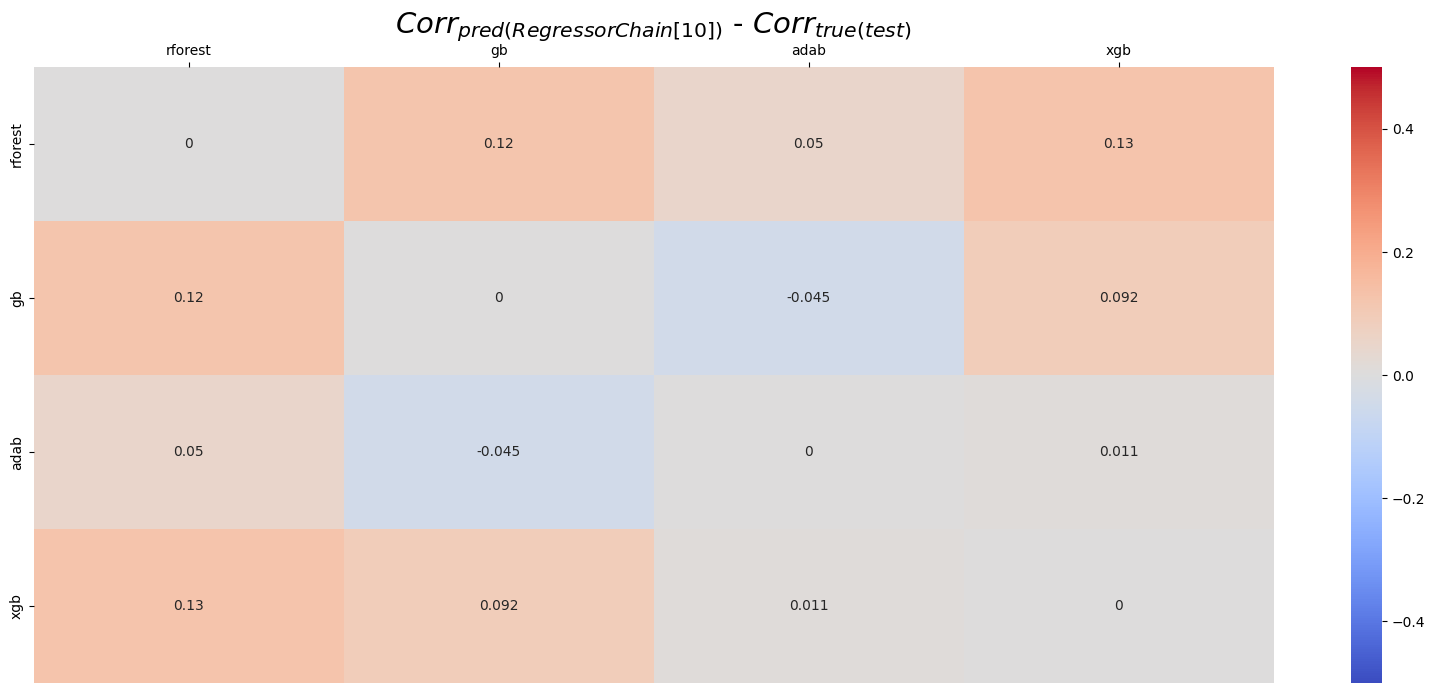

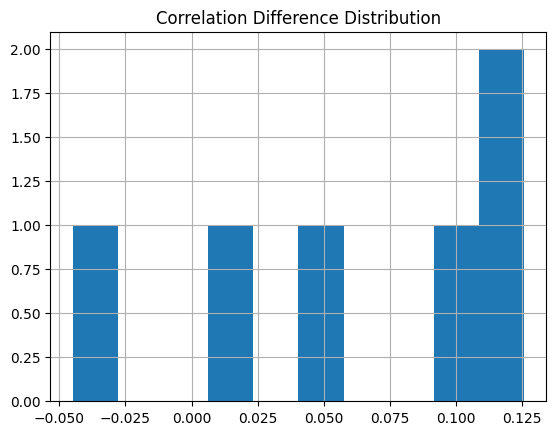

In [23]:
#regchain_corrls = pd.DataFrame(regchain.predict(Xa_train), 
#                               index=Xa_train.index,
#                               columns=model_names).corr('kendall') 
#10chains
results = correlation_pred_performance(rc_plus, Xa_test, ya_test, Xa_train, 
                                       min_score=MIN_SCORE, name=f"RegressorChain[{num_chains}]",
                                       show_plot=True, save_plot=None)

In [95]:
diff_metrics.loc[rc_ac,:] = results['results']
diff_metrics.loc[rc_ac,:]

MSE       0.007353
MAE       0.062562
NMSE      0.225012
NMAE      0.402657
aRRMSE    0.443365
aCC       0.946736
Name: RC[50], dtype: object

In [96]:
groups[f'regchain{num_chains}_assessor'] = results['groups']
groups[f'regchain{num_chains}_assessor']['test']

[['adab', 'rforest', 'xgb'], ['xgb', 'rforest', 'gb']]

### Multi-Output Random Forest Regressor 

In [47]:
mrf = RandomForestRegressor(random_state=seed).fit(Xa_train, ya_train)

In [48]:
metrics_df.loc['MRT',:] = assr_performance(mrf, Xa_test, ya_test, Xa_train, ya_train)

[TRAINING SET]
MSE: 0.0098
NMSE: 0.1102
MAE: 0.0635
NMAE: 0.2866
aRRMSE: 0.3317
aCC: 0.9709

[TESTING SET]
MSE: 0.0759
NMSE: 0.8507
MAE: 0.1767
NMAE: 0.7922
aRRMSE: 0.9220
aCC: 0.4000


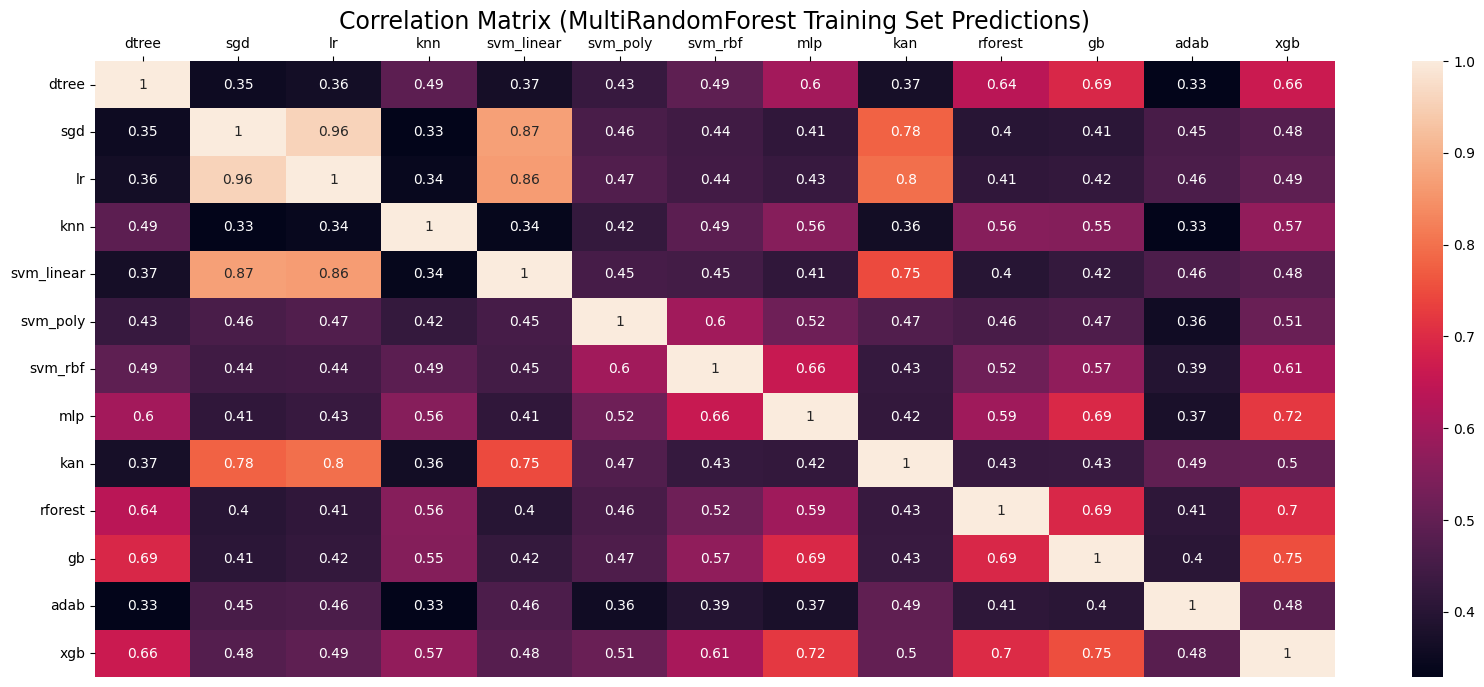

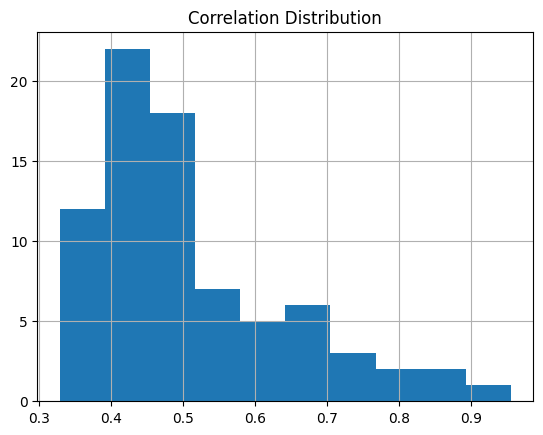

Training correlation distribution:
count    78.000000
mean      0.507130
std       0.140522
min       0.328708
25%       0.414629
50%       0.465506
75%       0.573569
max       0.955567
Name: corr, dtype: float64


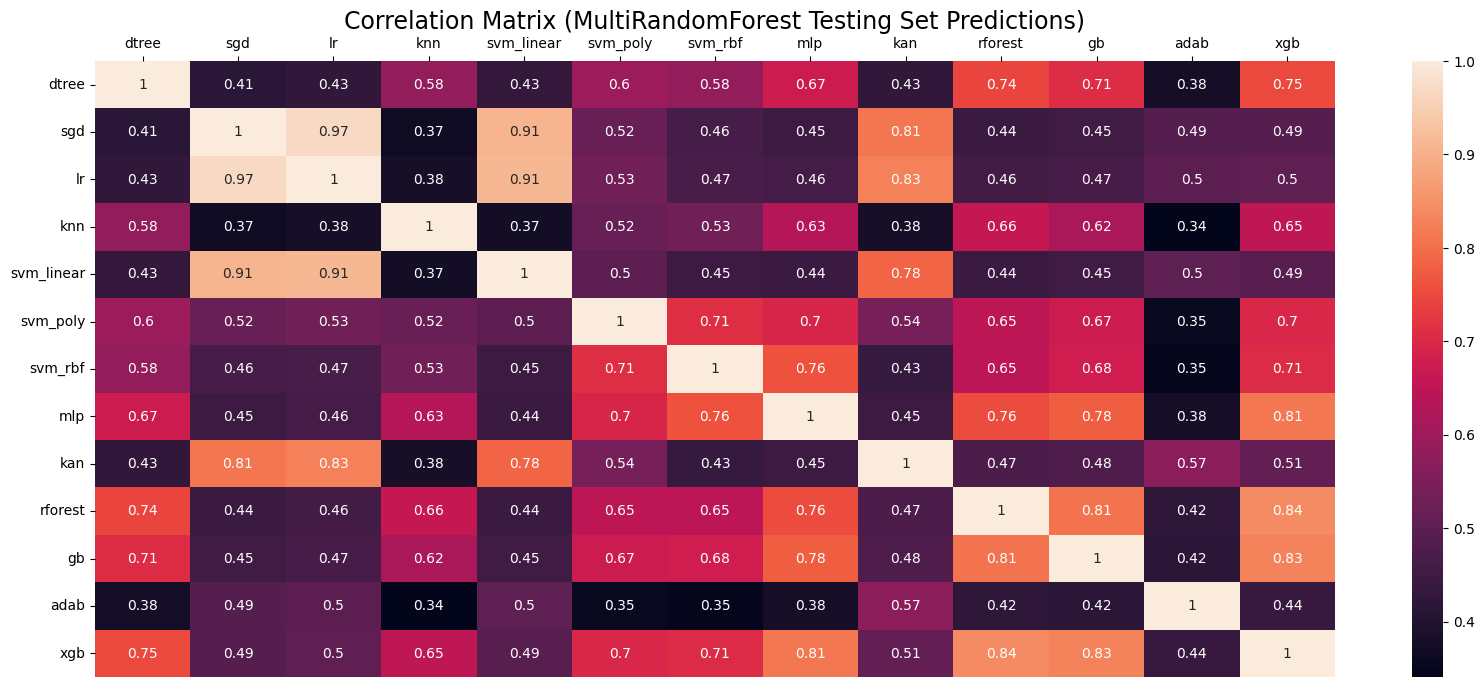

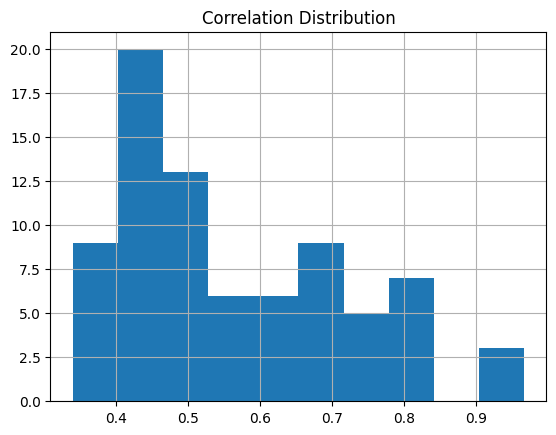

Testing correlation distribution:
count    78.000000
mean      0.566318
std       0.158473
min       0.340736
25%       0.443978
50%       0.506745
75%       0.691295
max       0.966598
Name: corr, dtype: float64

Diferença entre correlações das previsões do assessor e do conjunto de teste:
MSE: 0.0314
NMSE: 0.1384
MAE: 0.9233
NMAE: 1.0549
aRRMSE: 0.8772
aCC: 0.8499


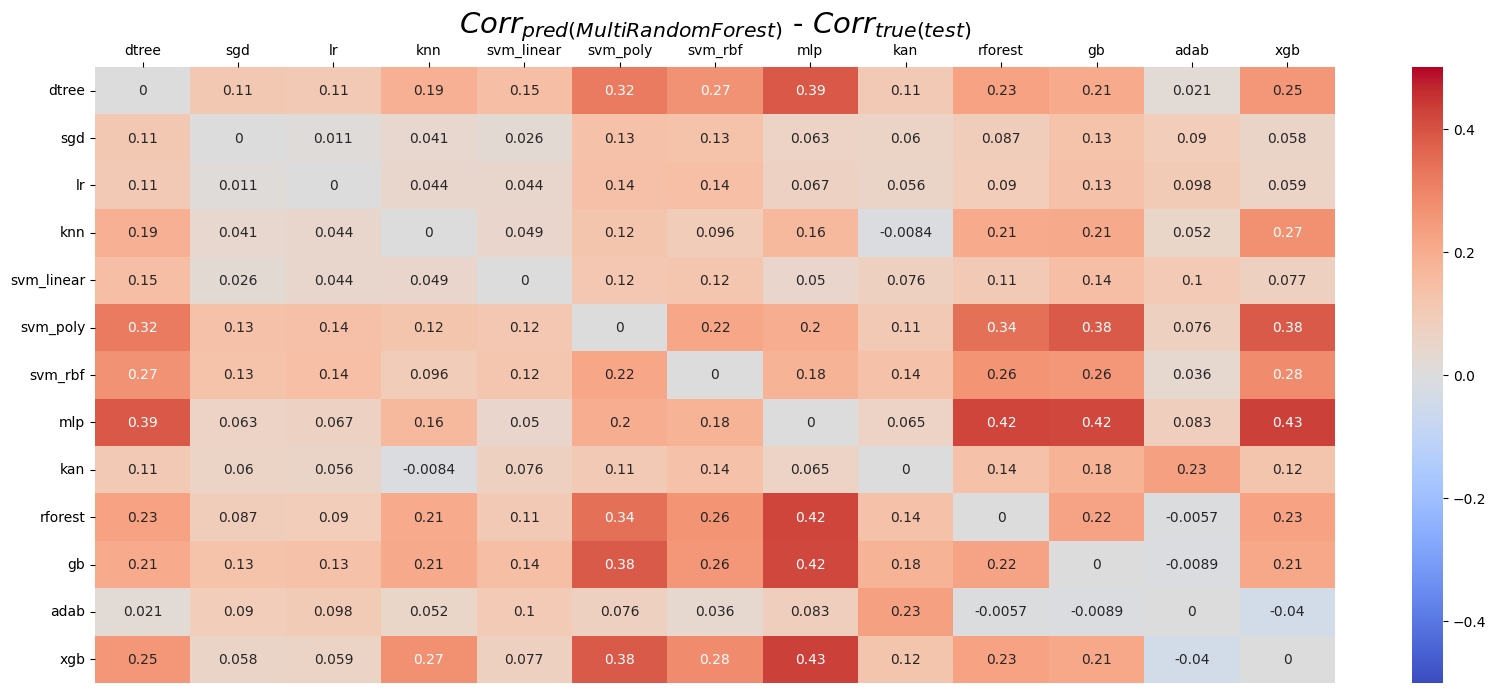

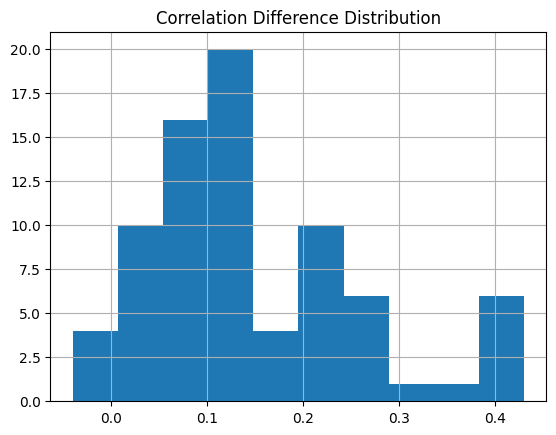

In [49]:
results = correlation_pred_performance(mrf, Xa_test, ya_test, Xa_train, 
                                       MIN_SCORE, name="MultiRandomForest")

In [50]:
diff_metrics.loc['MRT',:] = results['results']
diff_metrics.loc['MRT',:]

MSE       0.031352
MAE       0.138443
NMSE      0.923295
NMAE      1.054856
aRRMSE    0.877241
aCC       0.849872
Name: MRT, dtype: object

In [51]:
groups['mrf_assessor'] = results['groups']
groups['mrf_assessor']['test']

[['rforest', 'mlp', 'gb', 'dtree', 'svm_rbf', 'svm_poly', 'xgb'],
 ['rforest', 'mlp', 'gb', 'dtree', 'knn', 'xgb'],
 ['sgd', 'lr', 'kan', 'svm_linear'],
 ['adab', 'kan']]

### Multi-Output SVR

In [ ]:
#msvr = MSVR()
#msvr.fit(np.asarray(Xa_train_norm), np.asarray(ya_train))
#msvr_params = product(svm_rbf_params)
#g_search = GridSearchCV(MSVR(), svm_rbf_params, scoring='neg_mean_squared_error', n_jobs=-1).fit(np.asarray(Xa_train_norm), np.asarray(ya_train))
#print(g_search.best_params_)
#msvr = g_search.best_estimator_

{'C': 1, 'gamma': 'auto'}


In [ ]:
#study_norm = OptunaStudy(Xa_train_norm, ya_train.values, 200)
#study_norm.search(MSVR)

[I 2025-05-09 18:22:52,268] A new study created in memory with name: no-name-ead237f8-ba78-422b-b7e6-e84d3756c054
[I 2025-05-09 18:22:52,323] Trial 0 finished with value: -0.08585997173926715 and parameters: {'C': 0.75, 'gamma': 'scale', 'tol': 0.013388514723715328, 'degree': 4, 'epsilon': 0.5323980435298018}. Best is trial 0 with value: -0.08585997173926715.
[I 2025-05-09 18:22:52,369] Trial 1 finished with value: -0.08012206134239352 and parameters: {'C': 1.25, 'gamma': 'scale', 'tol': 0.08527568969979069, 'degree': 6, 'epsilon': 0.25403596876999807}. Best is trial 1 with value: -0.08012206134239352.
[I 2025-05-09 18:22:52,417] Trial 2 finished with value: -0.07857961892137474 and parameters: {'C': 1.75, 'gamma': 'scale', 'tol': 0.04523580644687323, 'degree': 2, 'epsilon': 0.13231750271315915}. Best is trial 2 with value: -0.07857961892137474.
[I 2025-05-09 18:22:52,454] Trial 3 finished with value: -0.08191907919828587 and parameters: {'C': 1.75, 'gamma': 'auto', 'tol': 0.2196930350

FrozenTrial(number=151, state=1, values=[-0.07843179983465308], datetime_start=datetime.datetime(2025, 5, 9, 18, 22, 59, 551119), datetime_complete=datetime.datetime(2025, 5, 9, 18, 22, 59, 597645), params={'C': 2.25, 'gamma': 'scale', 'tol': 0.0023733109529851444, 'degree': 7, 'epsilon': 0.1000217763075082}, user_attrs={}, system_attrs={}, intermediate_values={}, distributions={'C': CategoricalDistribution(choices=(0.25, 0.5, 0.75, 1.0, 1.25, 1.5, 1.75, 2.0, 2.25, 2.5, 2.75, 3.0, 3.25, 3.5, 3.75, 4.0, 4.25, 4.5, 4.75)), 'gamma': CategoricalDistribution(choices=('auto', 'scale')), 'tol': FloatDistribution(high=0.5, log=True, low=0.001, step=None), 'degree': IntDistribution(high=8, log=False, low=2, step=1), 'epsilon': FloatDistribution(high=0.8, log=True, low=0.1, step=None)}, trial_id=151, value=None)


In [52]:
msvr = MSVR().fit(Xa_train_norm, ya_train.values)

In [53]:
metrics_df.loc['M-SVR',:] = assr_performance(msvr, Xa_test_norm, ya_test, Xa_train_norm, ya_train)

[TRAINING SET]
MSE: 0.0502
NMSE: 1.0641
MAE: 0.1544
NMAE: 0.8576
aRRMSE: 0.8867
aCC: 0.6848

[TESTING SET]
MSE: 0.0838
NMSE: 2.9872
MAE: 0.1966
NMAE: 1.1318
aRRMSE: 1.3023
aCC: 0.2901


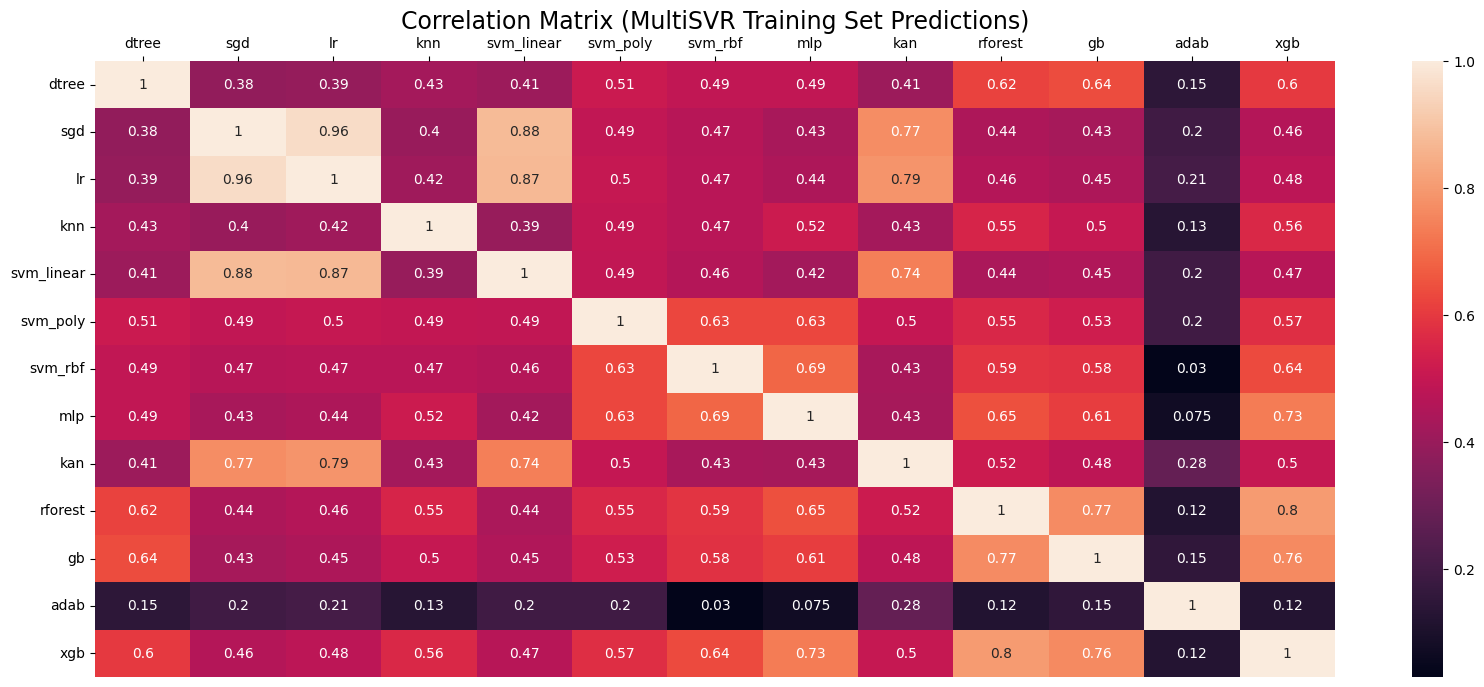

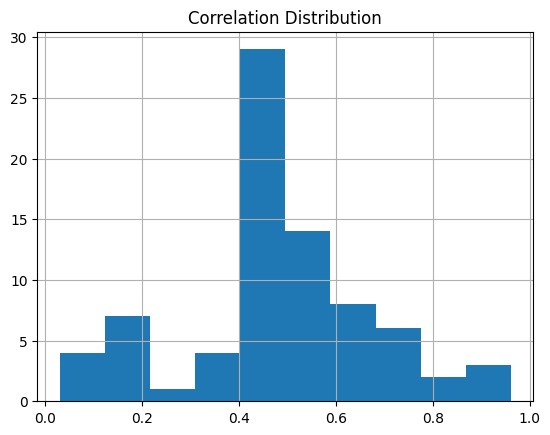

Training correlation distribution:
count    78.000000
mean      0.484578
std       0.189859
min       0.030484
25%       0.423198
50%       0.479472
75%       0.586725
max       0.960771
Name: corr, dtype: float64


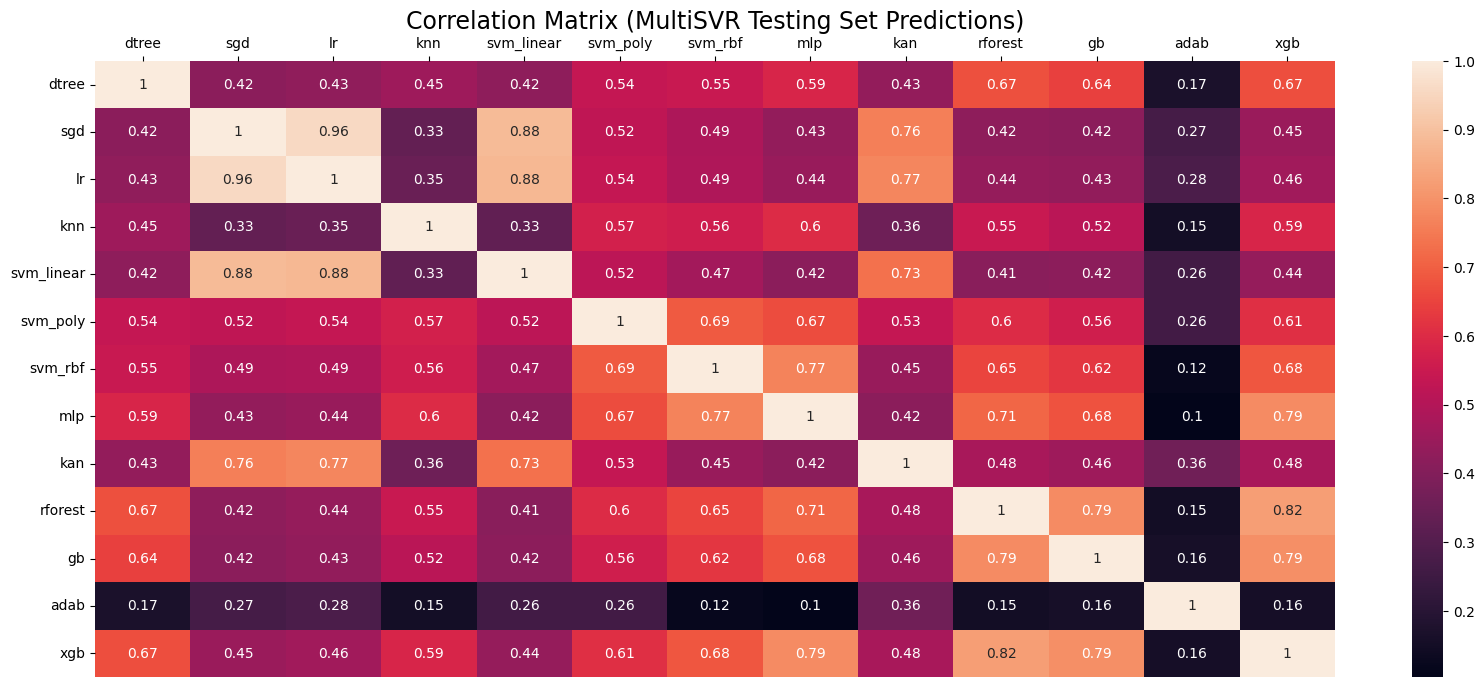

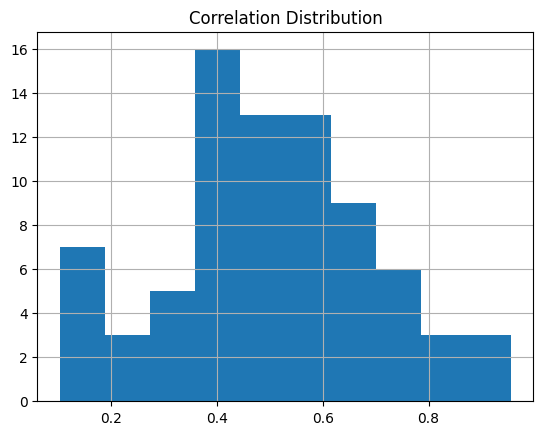

Testing correlation distribution:
count    78.000000
mean      0.505548
std       0.190801
min       0.103930
25%       0.417677
50%       0.483277
75%       0.639192
max       0.955672
Name: corr, dtype: float64

Diferença entre correlações das previsões do assessor e do conjunto de teste:
MSE: 0.0265
NMSE: 0.1286
MAE: 0.7833
NMAE: 1.0021
aRRMSE: 0.8167
aCC: 0.8304


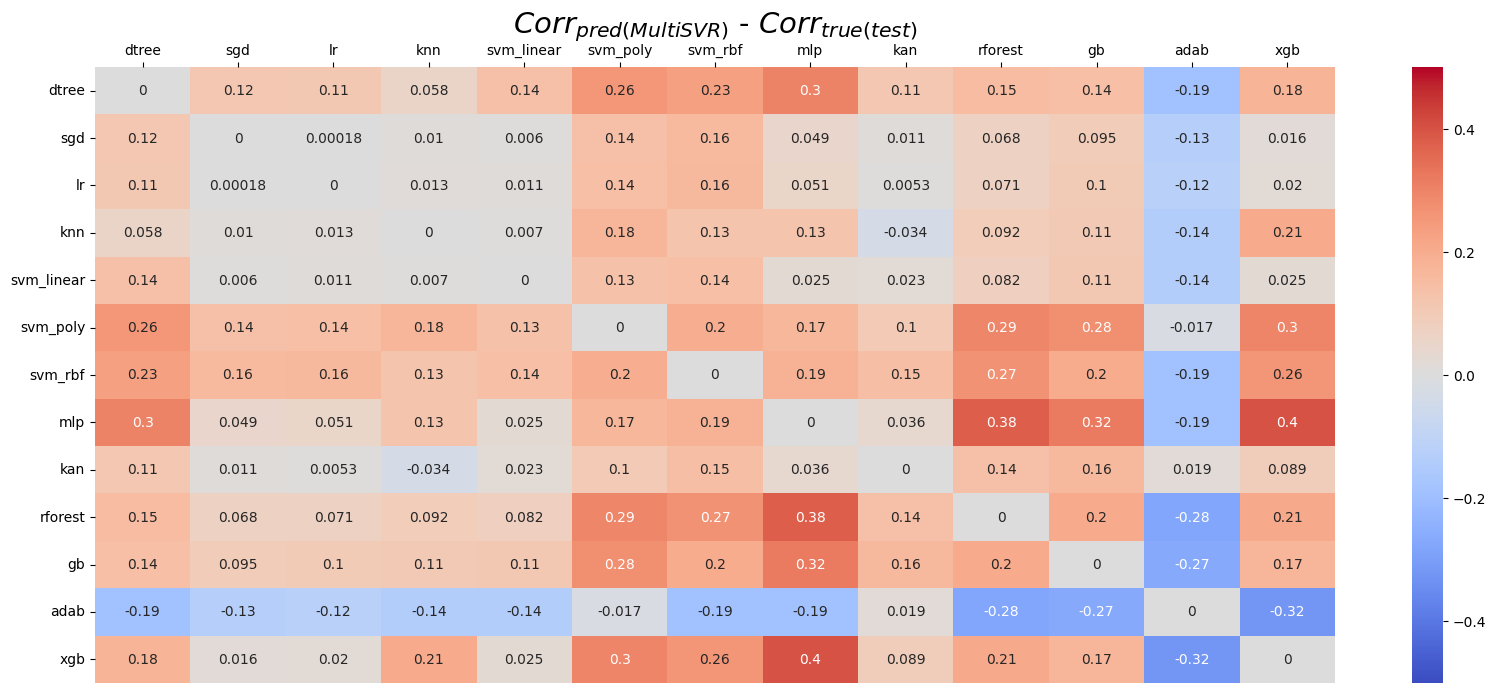

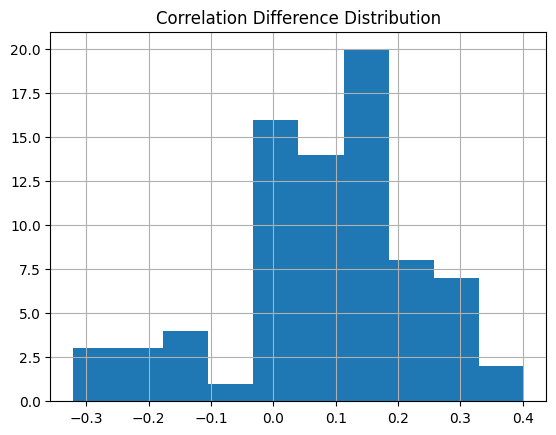

In [54]:
results = correlation_pred_performance(msvr, 
                                       pd.DataFrame(Xa_test_norm, index=Xa_test.index), 
                                       ya_test,
                                       pd.DataFrame(Xa_train_norm, index=Xa_train.index), 
                                       MIN_SCORE, name="MultiSVR")

In [56]:
diff_metrics.loc['M-SVR',:] = results['results']
diff_metrics.loc['M-SVR',:]

MSE       0.026454
MAE       0.128632
NMSE      0.783253
NMAE      1.002141
aRRMSE    0.816746
aCC       0.830393
Name: M-SVR, dtype: object

In [ ]:
groups['msvr_assessor'] = results['groups']
groups['msvr_assessor']['test']

[['mlp', 'knn', 'svm_rbf', 'svm_poly', 'xgb'],
 ['rforest', 'mlp', 'gb', 'dtree', 'xgb'],
 ['rforest', 'mlp', 'gb', 'svm_rbf', 'svm_poly', 'xgb'],
 ['sgd', 'lr', 'kan', 'svm_linear'],
 ['adab']]

### Multi-Output Regressor 
(ST)

In [26]:
single_tgt = MultiOutputRegressor(RandomForestRegressor(random_state=seed), 
                                  n_jobs=-1).fit(Xa_train, ya_train)

In [27]:
metrics_df.loc['ST',:] = assr_performance(single_tgt, Xa_test, ya_test, Xa_train, ya_train)

[TRAINING SET]
MSE: 0.0096
NMSE: 0.1132
MAE: 0.0589
NMAE: 0.2793
aRRMSE: 0.3362
aCC: 0.9669

[TESTING SET]
MSE: 0.0754
NMSE: 0.8356
MAE: 0.1663
NMAE: 0.7647
aRRMSE: 0.9135
aCC: 0.4172


#### Análise das correlações

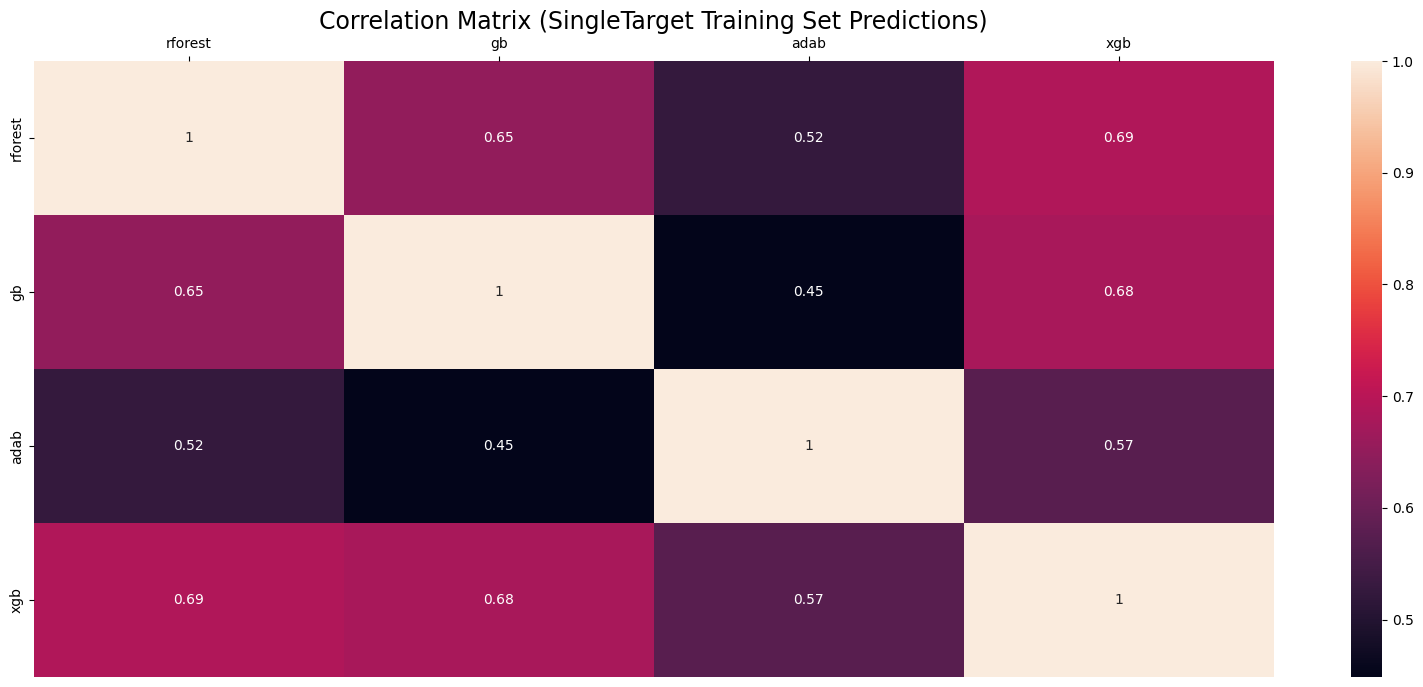

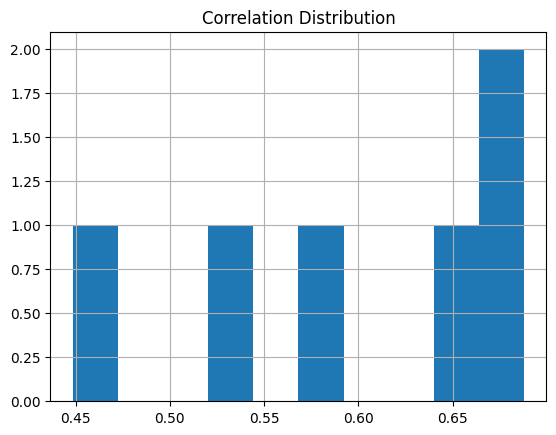

Training correlation distribution:
count    6.000000
mean     0.594121
std      0.095414
min      0.448673
25%      0.537008
50%      0.612497
75%      0.671685
max      0.687798
Name: corr, dtype: float64


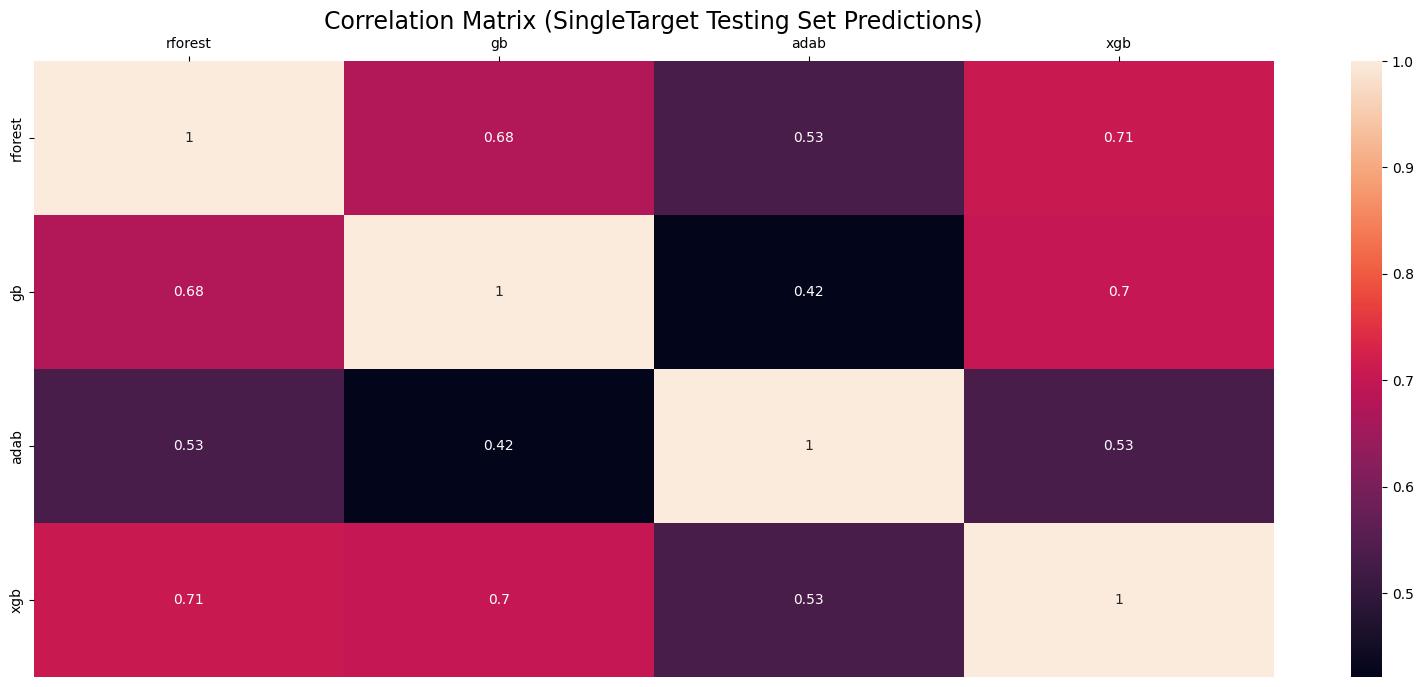

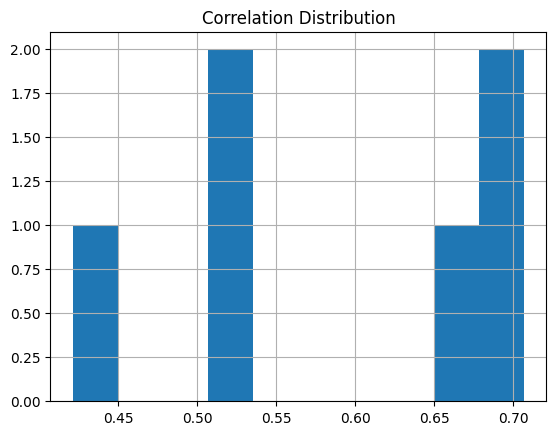

Testing correlation distribution:
count    6.000000
mean     0.595134
std      0.116688
min      0.421232
25%      0.532983
50%      0.604389
75%      0.694785
max      0.706694
Name: corr, dtype: float64

Diferença entre correlações das previsões do assessor e do conjunto de teste:
MSE: 0.0039
NMSE: 0.0496
MAE: 0.1166
NMAE: 0.3163
aRRMSE: 0.3389
aCC: 0.9619


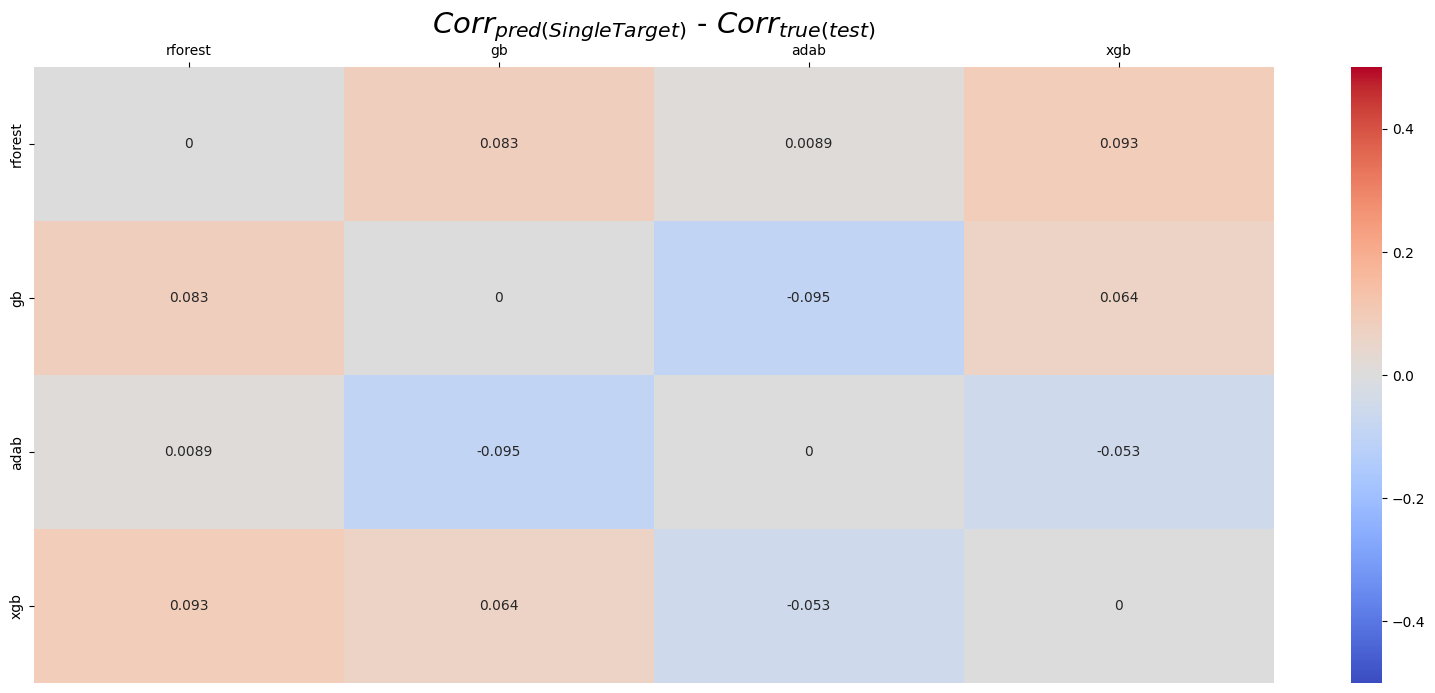

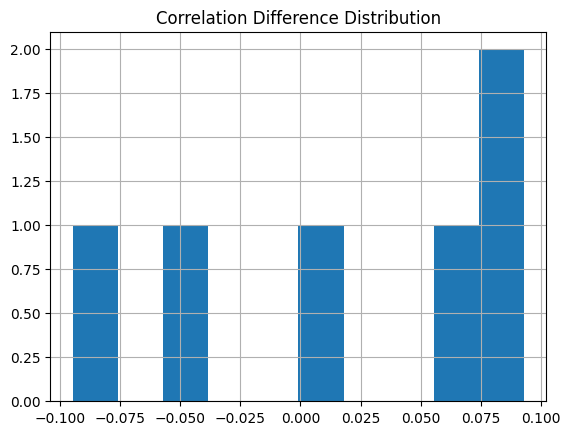

In [28]:
results = correlation_pred_performance(single_tgt, Xa_test, ya_test, Xa_train,
                                       MIN_SCORE, name="SingleTarget")

In [29]:
diff_metrics.loc['ST',:] = results['results']
diff_metrics.loc['ST',:]

MSE       0.003932
MAE       0.049565
NMSE      0.116603
NMAE      0.316346
aRRMSE    0.338855
aCC       0.961911
Name: ST, dtype: object

In [30]:
groups['st_assessor'] = results['groups']
groups['st_assessor']['test']

[['adab'], ['xgb', 'rforest', 'gb']]

## Grupais

In [ ]:
#keys = list(groups.keys())
#for i in range(len(keys)):
#    for j in range(i+1, len(keys)):
#        print(f'{keys[i]}({len(groups[keys[i]])}) & {keys[j]}({len(groups[keys[j]])}):')
#        count = 0
#        for g in groups[keys[i]]:
#            if(g in groups[keys[j]]):
#                print(g)
#                count += 1
#        print(f'Número de grupos em comum: {count}\n\n')

In [31]:
for g in groups['true_assessor_train']:
    if(len(g)!=1):
        teste = []
        for i, m in enumerate(g):
            for n in g[i+1:]:
                teste.append(pred_corrls.loc[m,n])
        print(g)
        print(f'total: {np.mean(teste)}\n')

['xgb', 'adab']
total: 0.6033106773811306

['xgb', 'rforest', 'gb']
total: 0.6004521295154231



### Regressor Chain

In [77]:
#[RegressorChain(base_estimator=RandomForestRegressor(random_state=seed),
#                random_state=seed,
#                order='random', cv=5) for _ in range(num_chains)]

rcg = GroupedAssessor([RegressorChain(base_estimator=RandomForestRegressor(random_state=seed),
                                      random_state=seed,
                                      order='random', 
                                      cv=5) for _ in range(len(groups['true_assessor_train']))])

rcg.fit(Xa_train, ya_train, groups=groups['true_assessor_train'])

[TRAINING SET]
MSE: 0.0236
NMSE: 0.2783
MAE: 0.0876
NMAE: 0.4145
aRRMSE: 0.5157
aCC: 0.8707

[TESTING SET]
MSE: 0.0749
NMSE: 0.8269
MAE: 0.1684
NMAE: 0.7735
aRRMSE: 0.9084
aCC: 0.4221


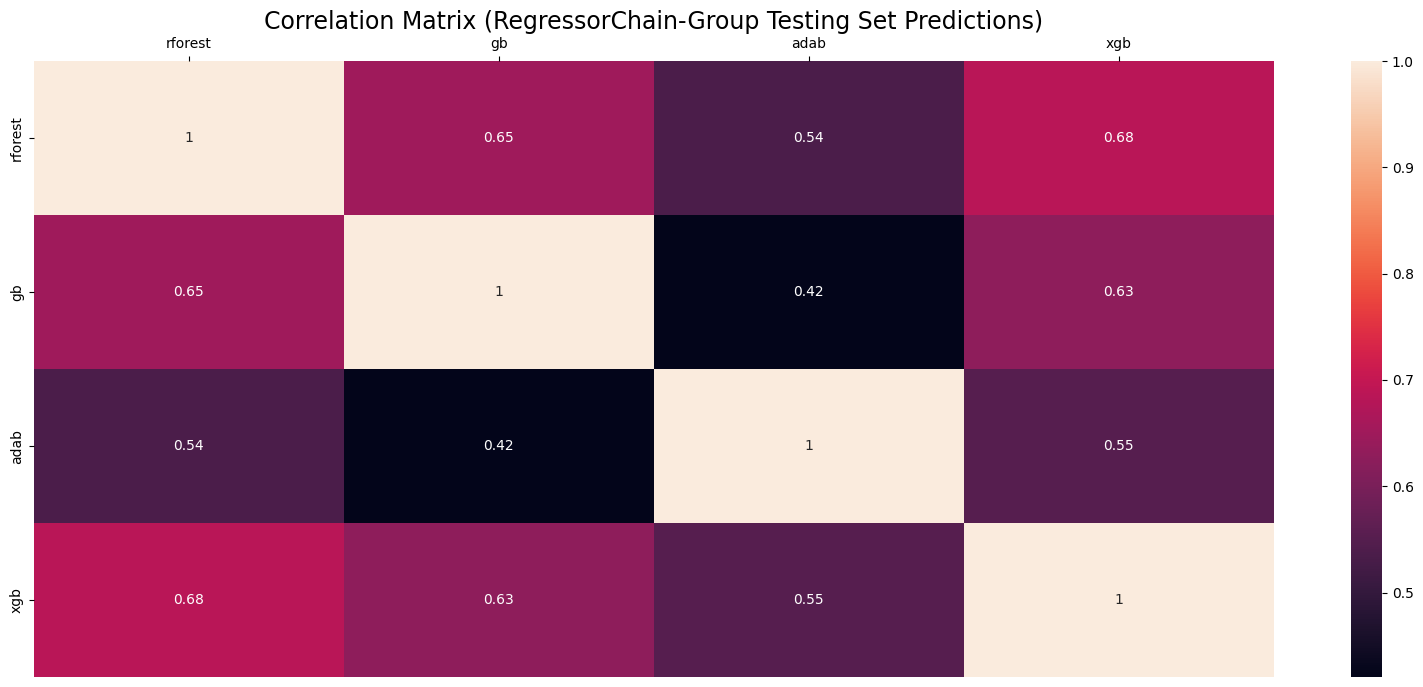

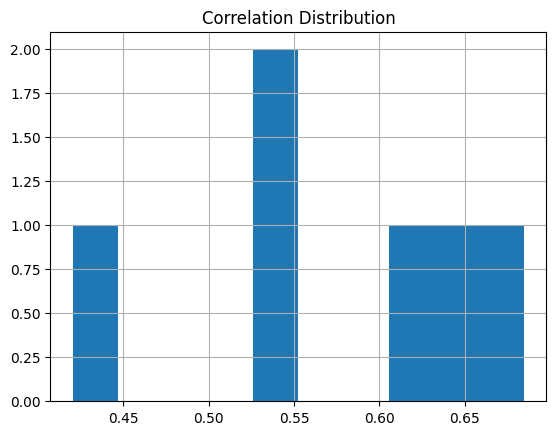

Testing correlation distribution:
count    6.000000
mean     0.578149
std      0.096578
min      0.420519
25%      0.538745
50%      0.588780
75%      0.645315
max      0.684588
Name: corr, dtype: float64

Diferença entre correlações das previsões do assessor e do conjunto de teste:
MSE: 0.0024
NMSE: 0.0352
MAE: 0.0687
NMAE: 0.2224
aRRMSE: 0.2610
aCC: 0.9787


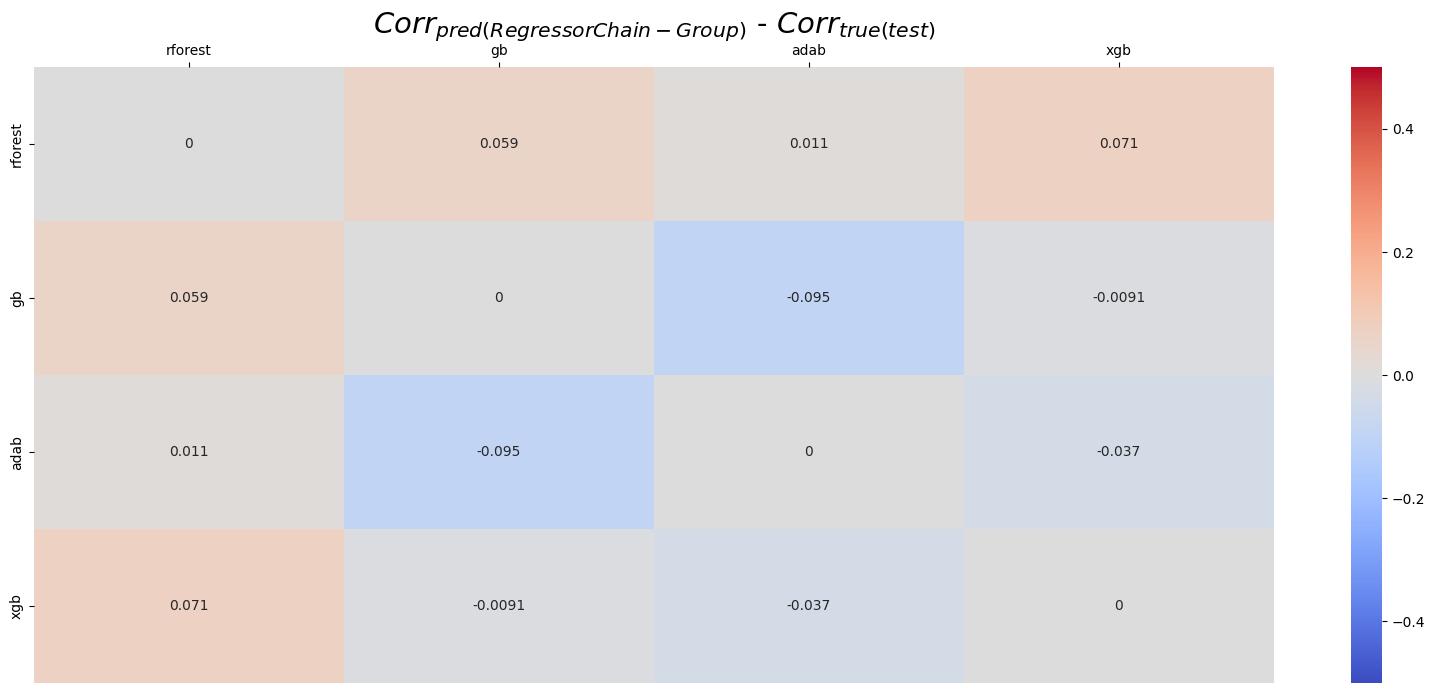

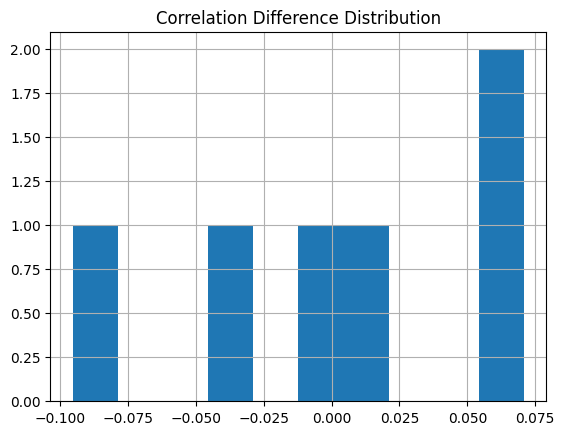

[['adab'], ['xgb', 'rforest', 'gb']]


In [78]:
metrics_df.loc['RC(g)',:] = assr_performance(rcg, Xa_test, ya_test, Xa_train, ya_train)

results = correlation_pred_performance(rcg, Xa_test, ya_test, min_score=MIN_SCORE, name="RegressorChain-Group")

diff_metrics.loc['RC(g)',:] = results['results']

groups['rcg_assessor'] = results['groups']
print(groups['rcg_assessor']['test'])

In [34]:
results

{'results': [0.0059022762499560035,
  0.055229814697688354,
  np.float64(0.18018034819125606),
  np.float64(0.355461143640966),
  np.float64(0.39965632055997313),
  np.float64(0.9486059105673641)],
 'groups': {'test': [['xgb', 'adab'], ['xgb', 'rforest', 'gb']]}}

### Ensemble of Regressor Chains

In [60]:
#rcg = GroupedAssessor(RegressorChain, model_names, random_state=seed)
#rcg.fit(Xa_train, ya_train, groups['true_assessor_train'], base_estimator=RandomForestRegressor(random_state=seed), 
#        random_state=seed, order='random', cv=5)

#rcg_plus = GroupedAssessor(VotingRegressor, model_names, random_state=seed,
#                           estimators=rc_ests, n_jobs=-1)

rcg_ac = f'RC[{num_chains}](g)'

rcg_plus = GroupedAssessor([GroupedAssessor([RegressorChain(
                                                base_estimator=RandomForestRegressor(random_state=seed),
                                                random_state=seed+i,
                                                order='random', cv=5) for i in range(num_chains)]
                                            ) for _ in range(len(groups['true_assessor_train']))])

rcg_plus.fit(Xa_train, ya_train, groups=groups['true_assessor_train'])

[TRAINING SET]
MSE: 0.0193
NMSE: 0.2227
MAE: 0.0833
NMAE: 0.3874
aRRMSE: 0.4700
aCC: 0.9176

[TESTING SET]
MSE: 0.0741
NMSE: 0.8195
MAE: 0.1675
NMAE: 0.7690
aRRMSE: 0.9046
aCC: 0.4296


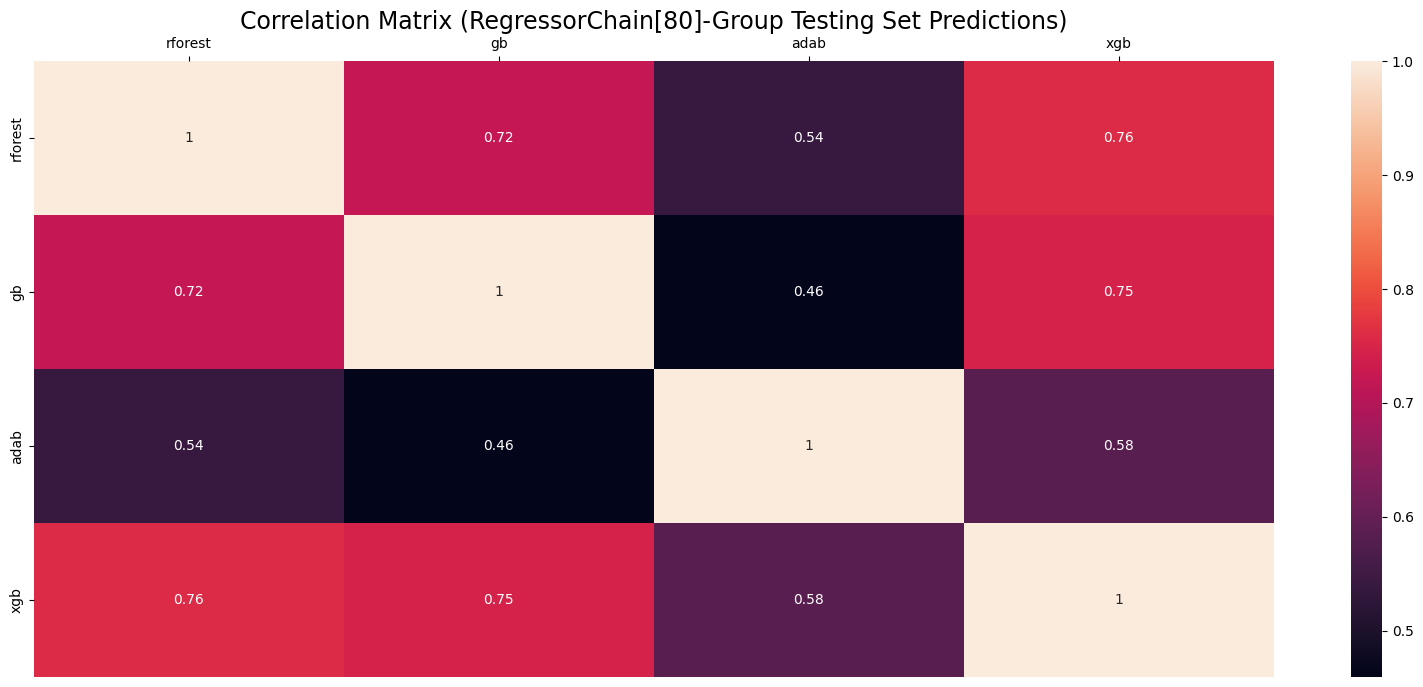

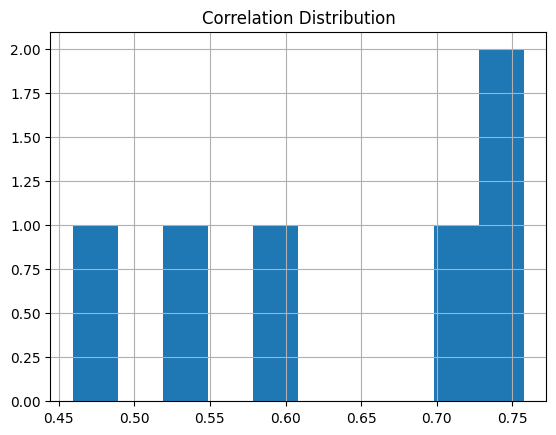

Testing correlation distribution:
count    6.000000
mean     0.634082
std      0.124203
min      0.459540
25%      0.549959
50%      0.651459
75%      0.739113
max      0.757576
Name: corr, dtype: float64

Diferença entre correlações das previsões do assessor e do conjunto de teste:
MSE: 0.0065
NMSE: 0.0567
MAE: 0.1995
NMAE: 0.3659
aRRMSE: 0.4176
aCC: 0.9438


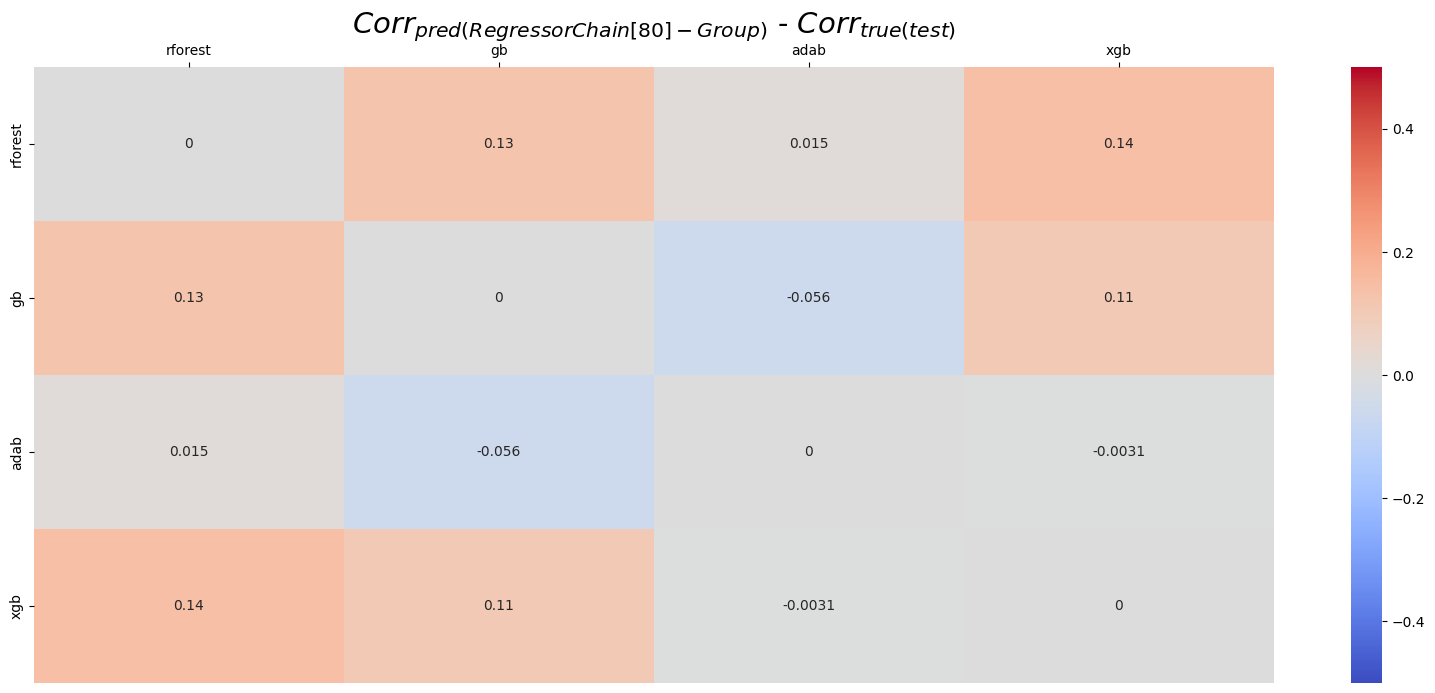

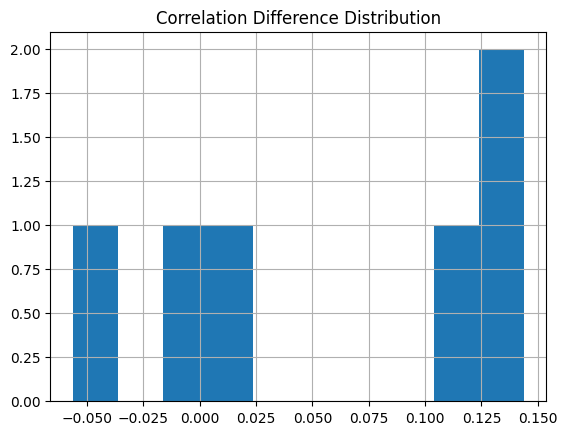

[['xgb', 'adab'], ['xgb', 'rforest', 'gb']]


In [61]:
# keeping the concat because multiple numbers of chains could be recorded
#80chains
if(rcg_ac in metrics_df.index):
    metrics_df.loc[rcg_ac,:] = assr_performance(rcg_plus, Xa_test, ya_test, Xa_train, ya_train)
else:
    new_df = pd.DataFrame(assr_performance(rcg_plus, Xa_test, ya_test, Xa_train, ya_train), 
                          columns=metrics_cols,
                          index=multIdx(rcg_ac, subindex=model_names))

    metrics_df = pd.concat([metrics_df, new_df])

results = correlation_pred_performance(rcg_plus, Xa_test, ya_test, min_score=MIN_SCORE, name=f"RegressorChain[{num_chains}]-Group")

diff_metrics.loc[rcg_ac,:] = results['results']

groups[f'rcg({num_chains})_assessor'] = results['groups']
print(groups[f'rcg({num_chains})_assessor']['test'])

[TRAINING SET]
MSE: 0.0190
NMSE: 0.2218
MAE: 0.0826
NMAE: 0.3863
aRRMSE: 0.4694
aCC: 0.9181

[TESTING SET]
MSE: 0.0741
NMSE: 0.8200
MAE: 0.1674
NMAE: 0.7691
aRRMSE: 0.9049
aCC: 0.4293


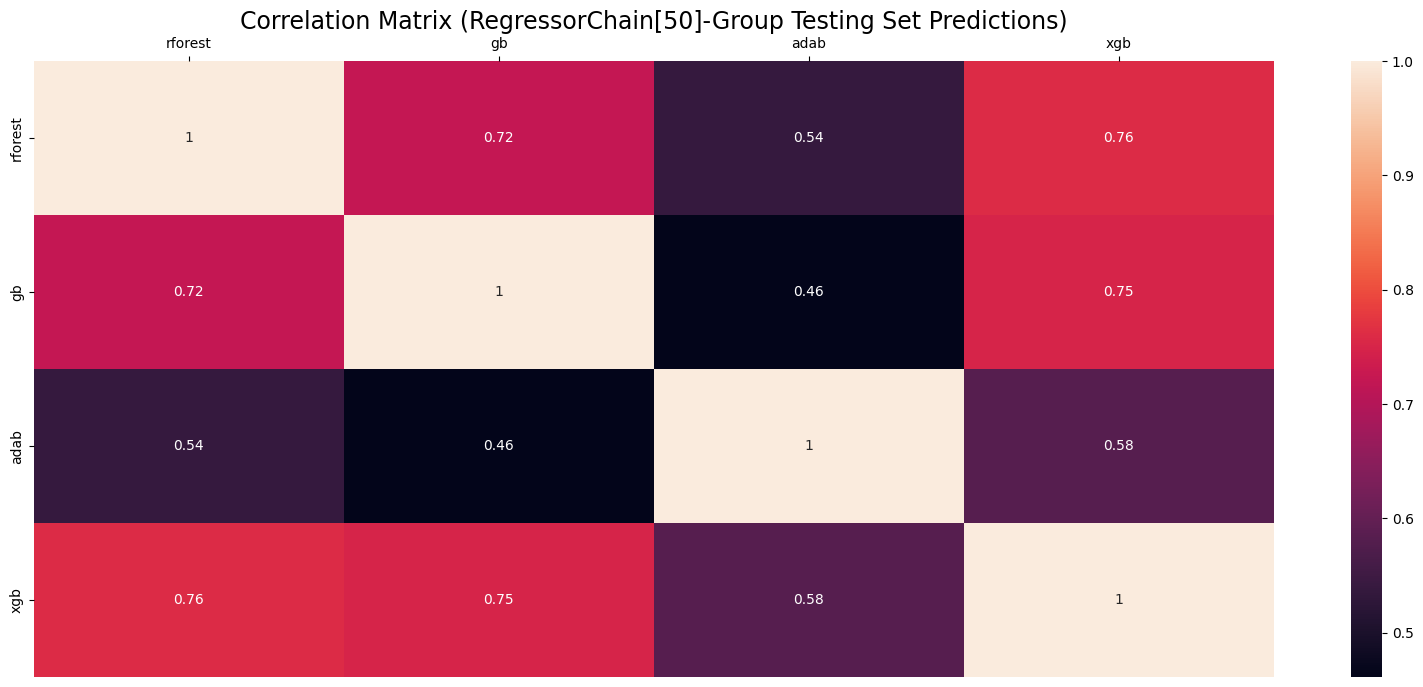

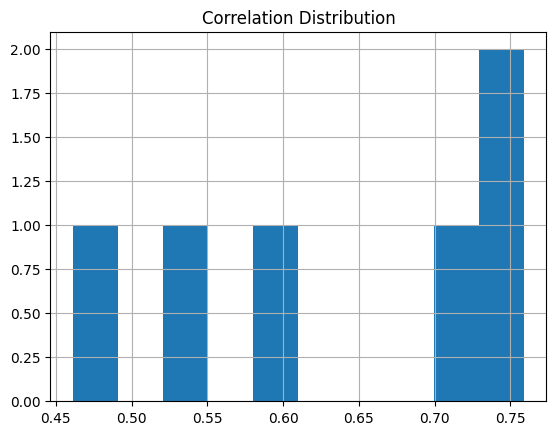

Testing correlation distribution:
count    6.000000
mean     0.635323
std      0.124964
min      0.461324
25%      0.549457
50%      0.652284
75%      0.742001
max      0.758958
Name: corr, dtype: float64

Diferença entre correlações das previsões do assessor e do conjunto de teste:
MSE: 0.0067
NMSE: 0.0574
MAE: 0.2052
NMAE: 0.3701
aRRMSE: 0.4223
aCC: 0.9422


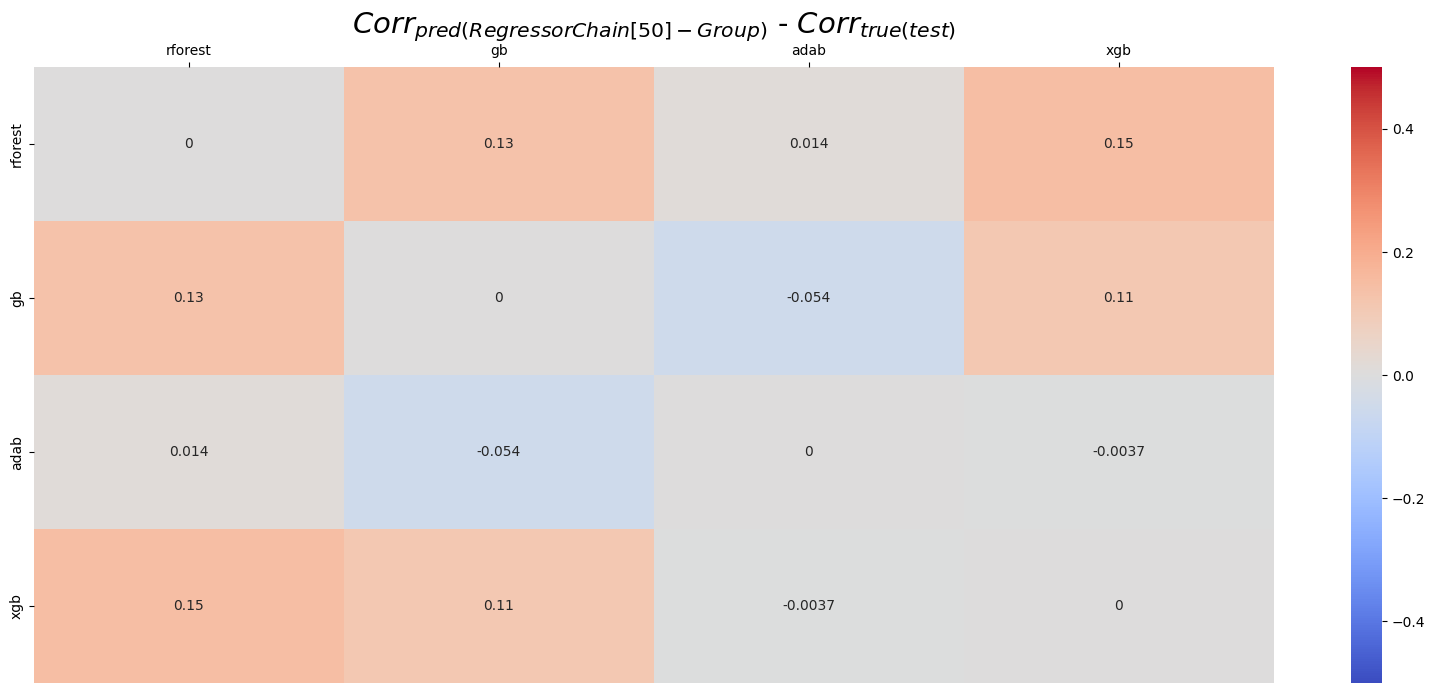

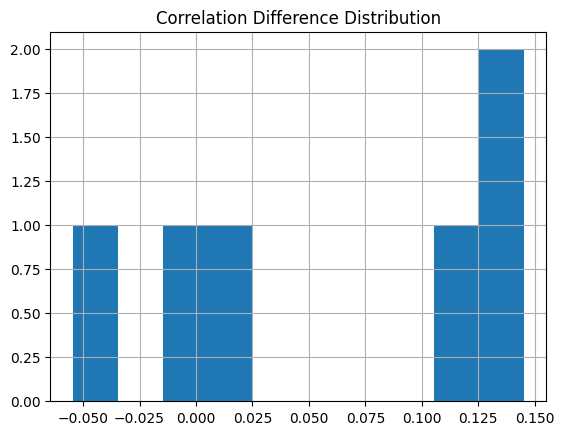

[['xgb', 'adab'], ['xgb', 'rforest', 'gb']]


In [49]:
# keeping the concat because multiple numbers of chains could be recorded
#50chains
if(rcg_ac in metrics_df.index):
    metrics_df.loc[rcg_ac,:] = assr_performance(rcg_plus, Xa_test, ya_test, Xa_train, ya_train)
else:
    new_df = pd.DataFrame(assr_performance(rcg_plus, Xa_test, ya_test, Xa_train, ya_train), 
                          columns=metrics_cols,
                          index=multIdx(rcg_ac, subindex=model_names))

    metrics_df = pd.concat([metrics_df, new_df])

results = correlation_pred_performance(rcg_plus, Xa_test, ya_test, min_score=MIN_SCORE, name=f"RegressorChain[{num_chains}]-Group")

diff_metrics.loc[rcg_ac,:] = results['results']

groups[f'rcg({num_chains})_assessor'] = results['groups']
print(groups[f'rcg({num_chains})_assessor']['test'])

[TRAINING SET]
MSE: 0.0188
NMSE: 0.2208
MAE: 0.0823
NMAE: 0.3860
aRRMSE: 0.4689
aCC: 0.9189

[TESTING SET]
MSE: 0.0741
NMSE: 0.8203
MAE: 0.1674
NMAE: 0.7693
aRRMSE: 0.9051
aCC: 0.4290


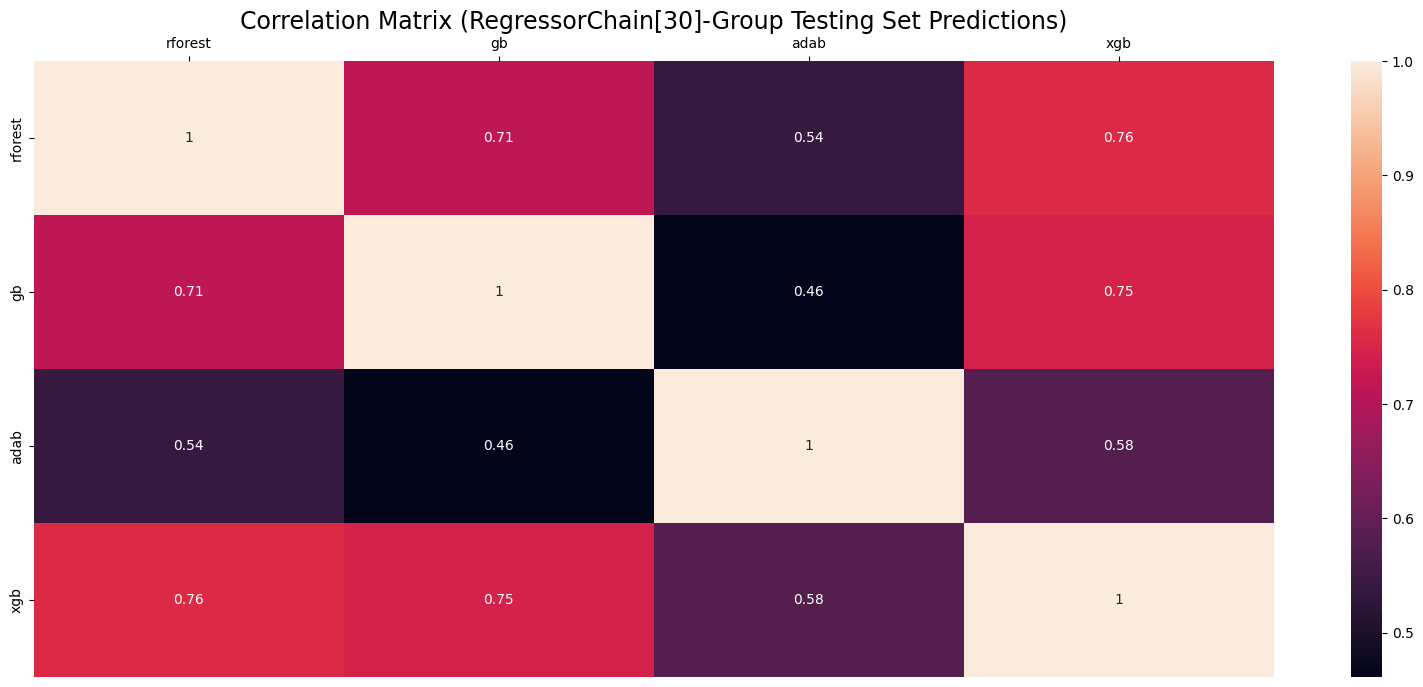

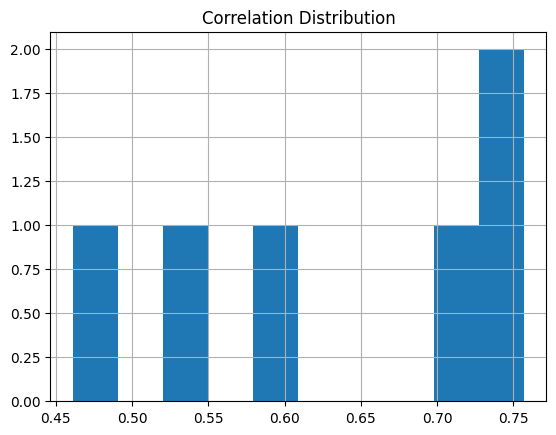

Testing correlation distribution:
count    6.000000
mean     0.633116
std      0.123308
min      0.461279
25%      0.549546
50%      0.647089
75%      0.738745
max      0.756907
Name: corr, dtype: float64

Diferença entre correlações das previsões do assessor e do conjunto de teste:
MSE: 0.0063
NMSE: 0.0565
MAE: 0.1947
NMAE: 0.3642
aRRMSE: 0.4121
aCC: 0.9448


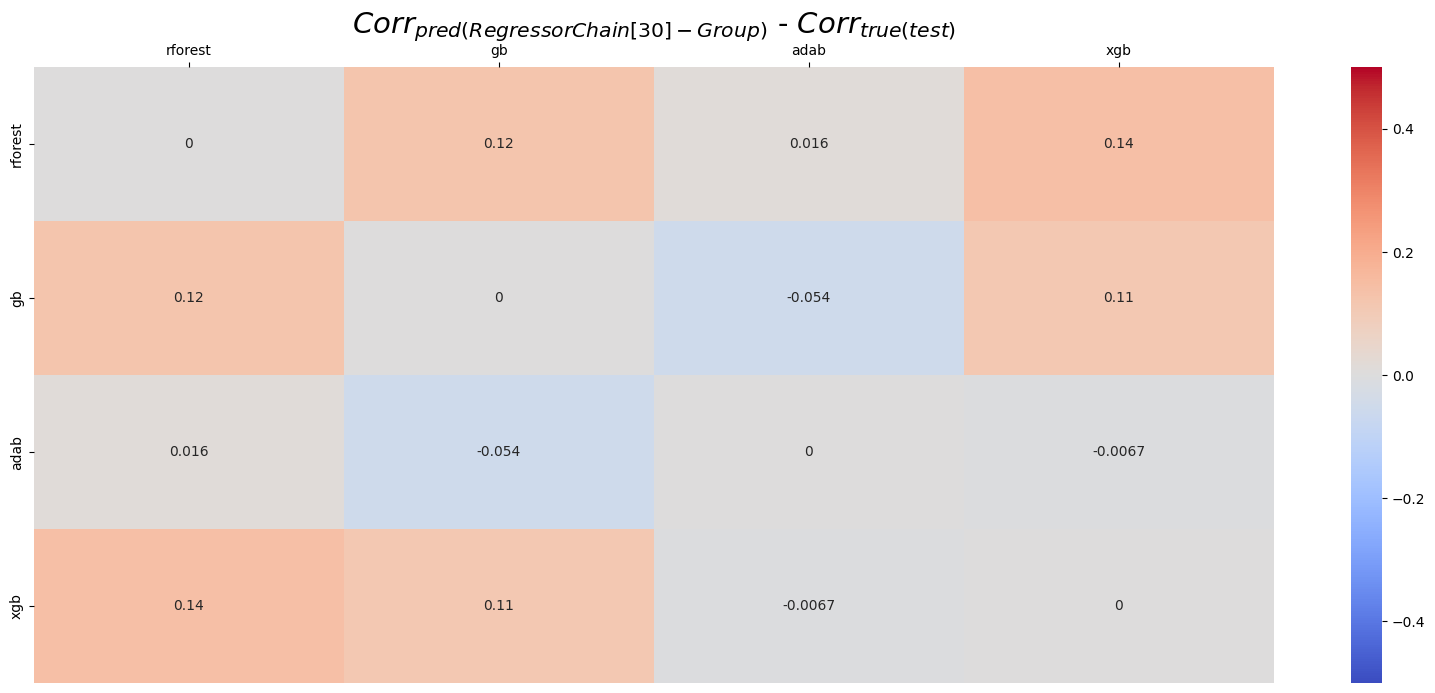

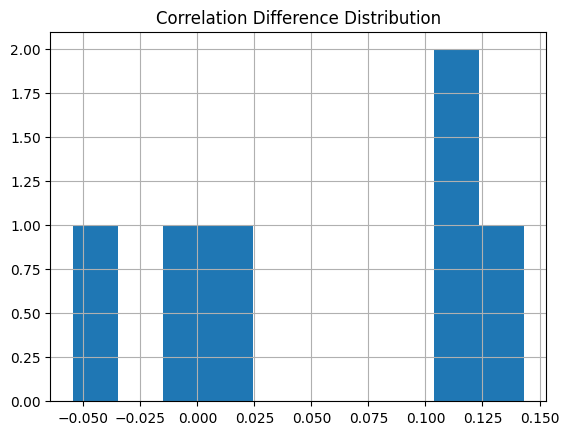

[['xgb', 'adab'], ['xgb', 'rforest', 'gb']]


In [43]:
# keeping the concat because multiple numbers of chains could be recorded
# 30chains
if(rcg_ac in metrics_df.index):
    metrics_df.loc[rcg_ac,:] = assr_performance(rcg_plus, Xa_test, ya_test, Xa_train, ya_train)
else:
    new_df = pd.DataFrame(assr_performance(rcg_plus, Xa_test, ya_test, Xa_train, ya_train), 
                          columns=metrics_cols,
                          index=multIdx(rcg_ac, subindex=model_names))

    metrics_df = pd.concat([metrics_df, new_df])

results = correlation_pred_performance(rcg_plus, Xa_test, ya_test, min_score=MIN_SCORE, name=f"RegressorChain[{num_chains}]-Group")

diff_metrics.loc[rcg_ac,:] = results['results']

groups[f'rcg({num_chains})_assessor'] = results['groups']
print(groups[f'rcg({num_chains})_assessor']['test'])

[TRAINING SET]
MSE: 0.0187
NMSE: 0.2297
MAE: 0.0823
NMAE: 0.3913
aRRMSE: 0.4778
aCC: 0.9125

[TESTING SET]
MSE: 0.0742
NMSE: 0.8211
MAE: 0.1674
NMAE: 0.7699
aRRMSE: 0.9055
aCC: 0.4284


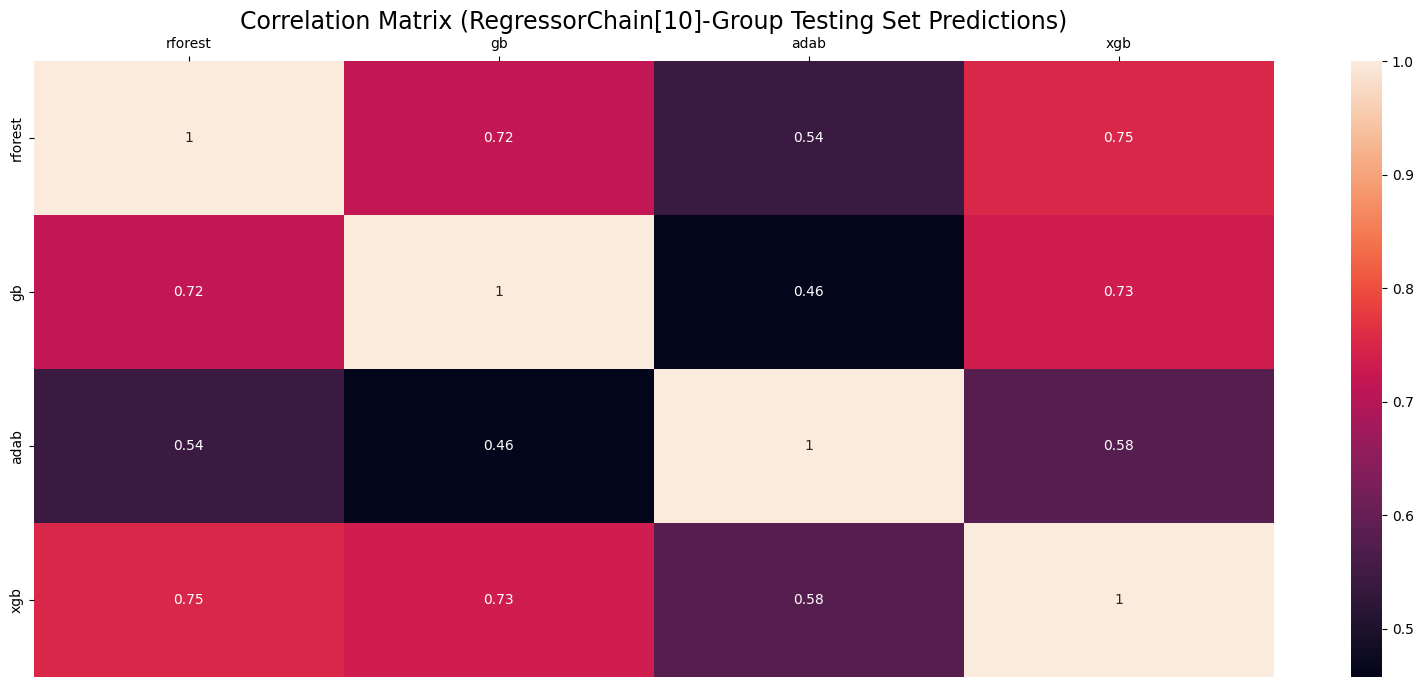

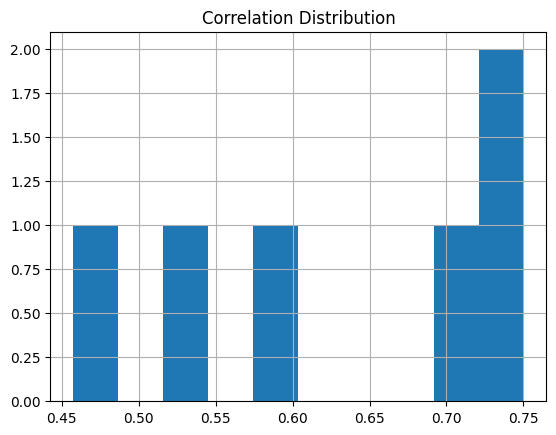

Testing correlation distribution:
count    6.000000
mean     0.629682
std      0.120773
min      0.457310
25%      0.551061
50%      0.647684
75%      0.729086
max      0.750337
Name: corr, dtype: float64

Diferença entre correlações das previsões do assessor e do conjunto de teste:
MSE: 0.0059
NMSE: 0.0552
MAE: 0.1802
NMAE: 0.3555
aRRMSE: 0.3997
aCC: 0.9486


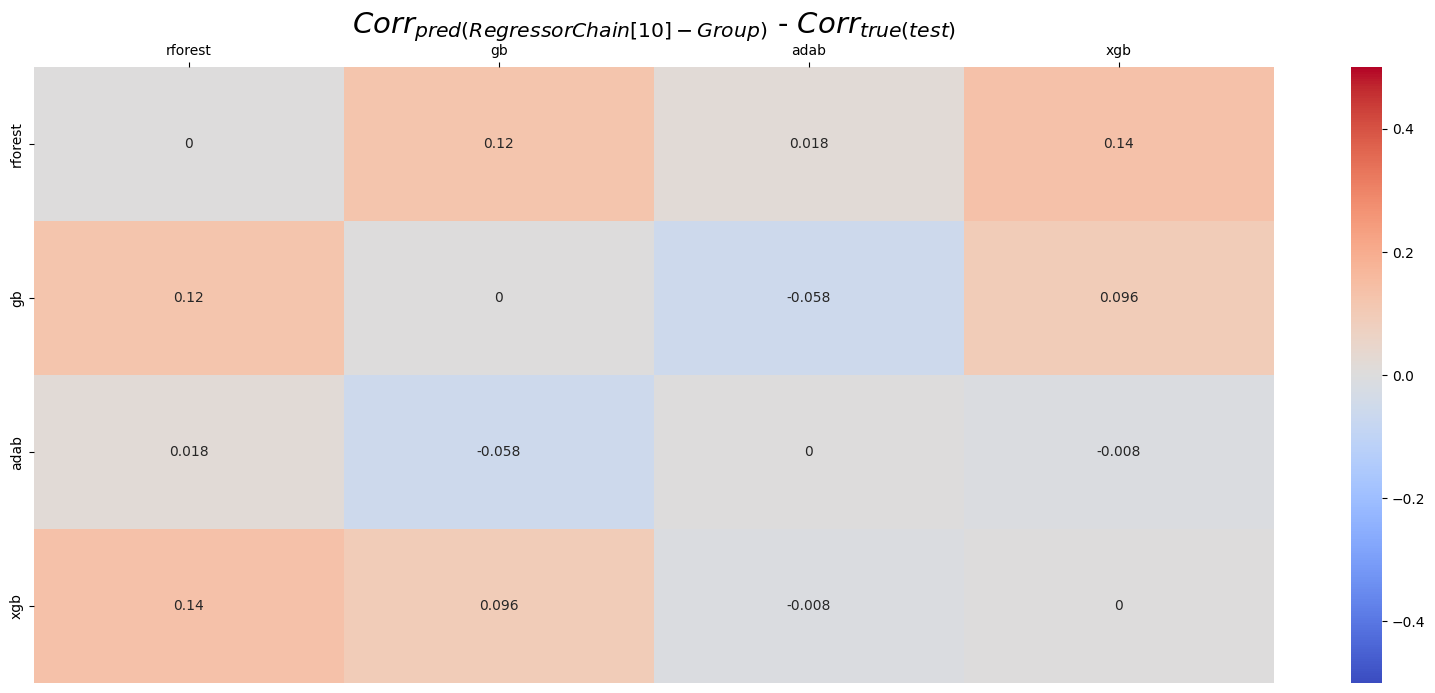

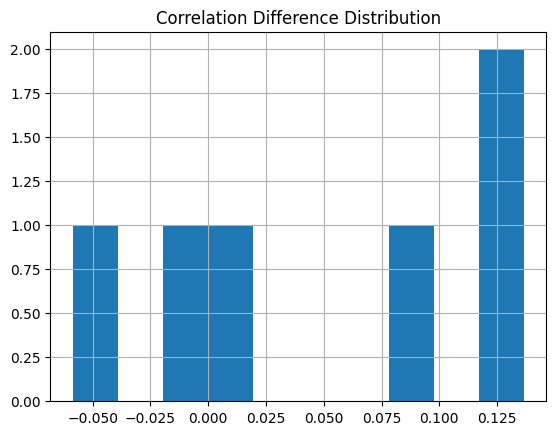

[['xgb', 'adab'], ['xgb', 'rforest', 'gb']]


In [36]:
# keeping the concat because multiple numbers of chains could be recorded
# 10chains
if(rcg_ac in metrics_df.index):
    metrics_df.loc[rcg_ac,:] = assr_performance(rcg_plus, Xa_test, ya_test, Xa_train, ya_train)
else:
    new_df = pd.DataFrame(assr_performance(rcg_plus, Xa_test, ya_test, Xa_train, ya_train), 
                          columns=metrics_cols,
                          index=multIdx(rcg_ac, subindex=model_names))

    metrics_df = pd.concat([metrics_df, new_df])

results = correlation_pred_performance(rcg_plus, Xa_test, ya_test, min_score=MIN_SCORE, name=f"RegressorChain[{num_chains}]-Group")

diff_metrics.loc[rcg_ac,:] = results['results']

groups[f'rcg({num_chains})_assessor'] = results['groups']
print(groups[f'rcg({num_chains})_assessor']['test'])

### Multi-Output SVR

In [ ]:
msvrg = GroupedAssessor([MSVR() for _ in range(len(groups['true_assessor_train']))])

msvrg.fit(Xa_train_norm, ya_train, groups['true_assessor_train'])

c:\Users\pedro\Documents\NOVOdeltadelta\pog\meu\proj-mtr\MSVR.py:74: RuntimeWarning: divide by zero encountered in divide
  a = 2 * C * (u - epsi) / u
c:\Users\pedro\Documents\NOVOdeltadelta\pog\meu\proj-mtr\MSVR.py:74: RuntimeWarning: divide by zero encountered in divide
  a = 2 * C * (u - epsi) / u


[TRAINING SET]
MSE: 0.0537
NMSE: 1.0717
MAE: 0.1646
NMAE: 0.8942
aRRMSE: 0.9089
aCC: 0.6604

[TESTING SET]
MSE: 0.0849
NMSE: 2.9803
MAE: 0.2027
NMAE: 1.1524
aRRMSE: 1.3092
aCC: 0.2722


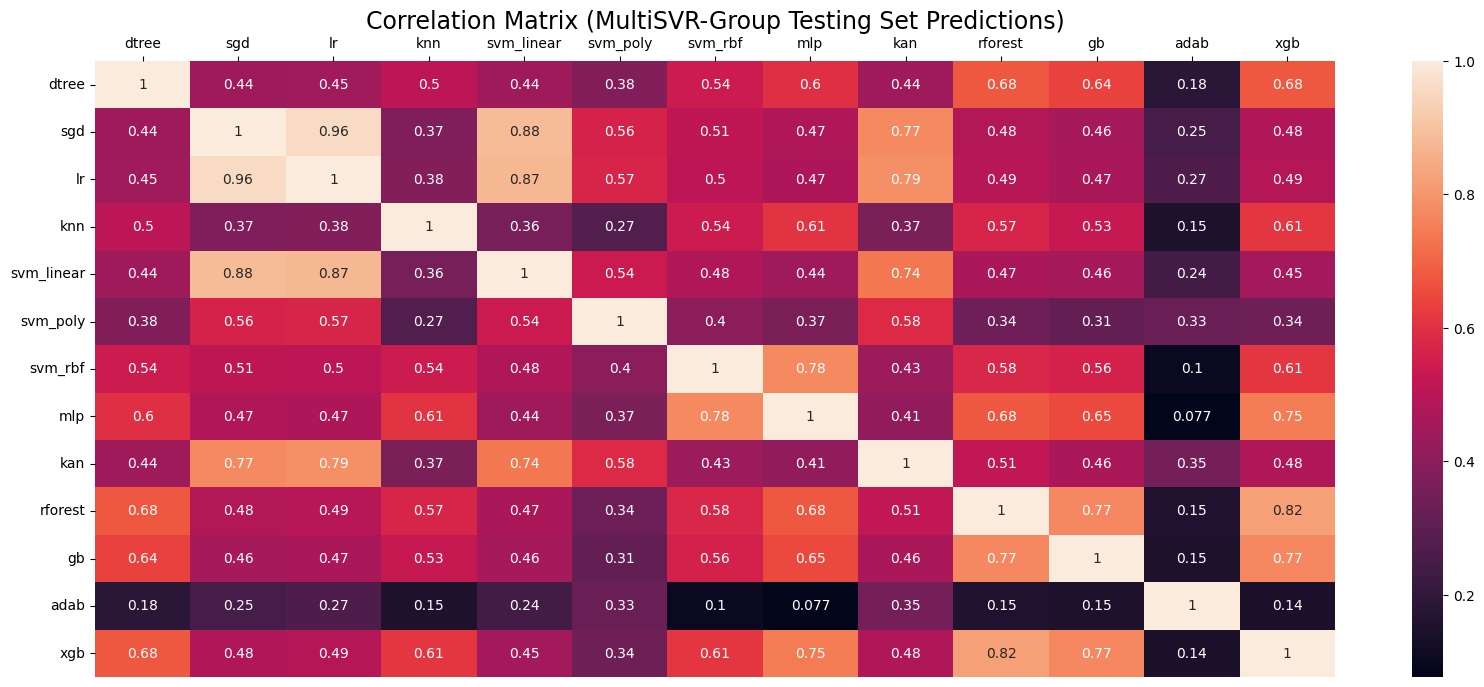

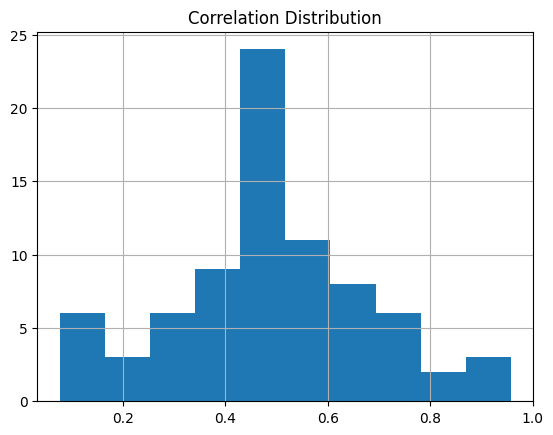

Testing correlation distribution:
count    78.000000
mean      0.489920
std       0.189730
min       0.077105
25%       0.373914
50%       0.477970
75%       0.593791
max       0.957100
Name: corr, dtype: float64

Diferença entre correlações das previsões do assessor e do conjunto de teste:
MSE: 0.0231
NMSE: 0.1241
MAE: 0.6646
NMAE: 0.9461
aRRMSE: 0.7690
aCC: 0.8336


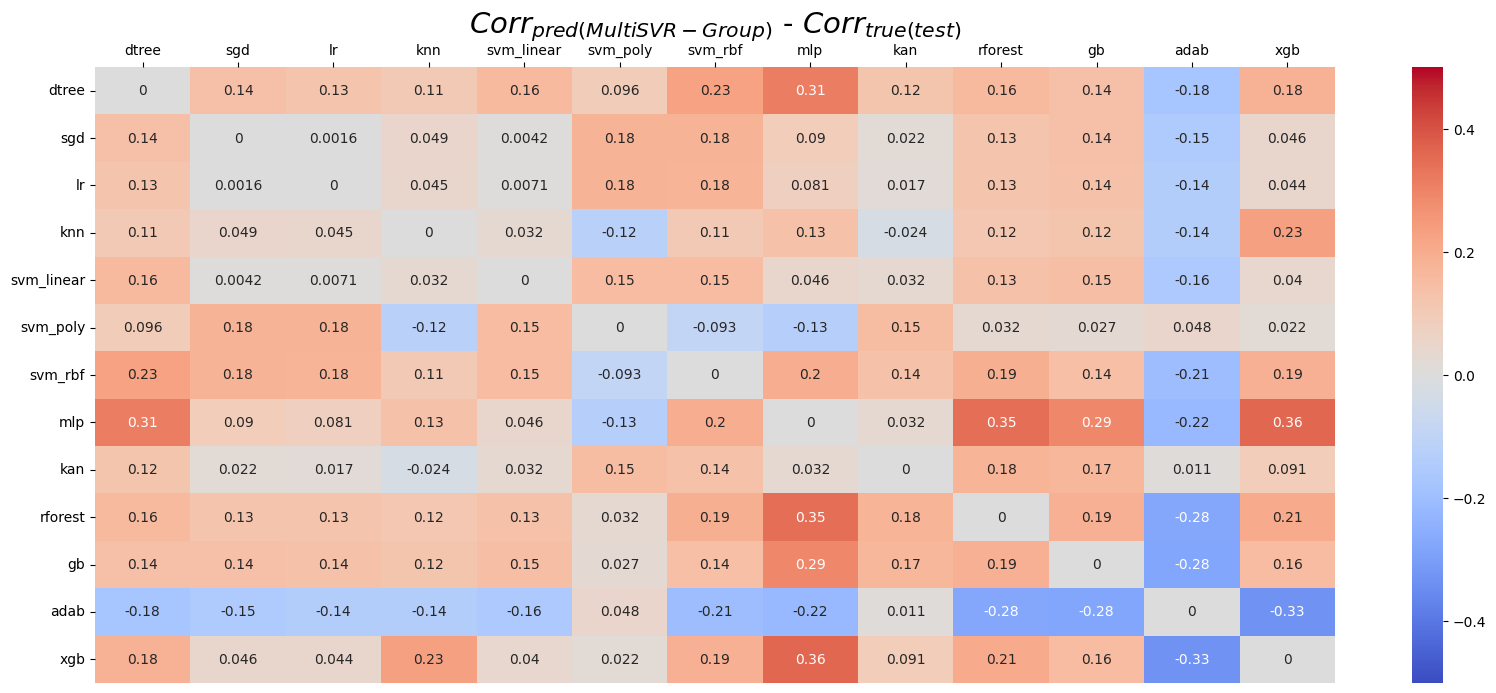

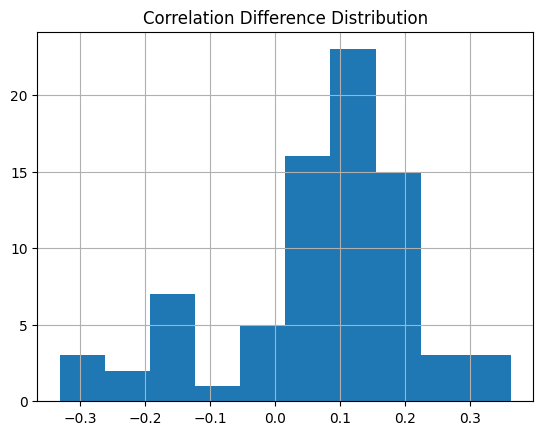

[['mlp', 'knn', 'rforest', 'xgb'], ['rforest', 'mlp', 'gb', 'dtree', 'xgb'], ['rforest', 'mlp', 'gb', 'svm_rbf', 'xgb'], ['kan', 'sgd', 'svm_poly', 'lr'], ['sgd', 'lr', 'kan', 'svm_linear'], ['adab']]


In [105]:
metrics_df.loc['M-SVR(g)',:] = assr_performance(msvrg, Xa_test_norm, ya_test, Xa_train_norm, ya_train)

results = correlation_pred_performance(msvrg, pd.DataFrame(Xa_test_norm, index=Xa_test.index), 
                                       ya_test, min_score=MIN_SCORE, name="MultiSVR-Group")

diff_metrics.loc['M-SVR(g)',:] = results['results']

groups['msvrg_assessor'] = results['groups']
print(groups['msvrg_assessor']['test'])

### Multi-Target Random Forest Regressor

In [ ]:
mrfg = GroupedAssessor([RandomForestRegressor(random_state=seed) for _ in range(len(groups['true_assessor_train']))])

mrfg.fit(Xa_train, ya_train, groups['true_assessor_train'])

c:\Users\pedro\pyenvs\mainpy\Lib\site-packages\sklearn\base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
c:\Users\pedro\pyenvs\mainpy\Lib\site-packages\sklearn\base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
c:\Users\pedro\pyenvs\mainpy\Lib\site-packages\sklearn\base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
c:\Users\pedro\pyenvs\mainpy\Lib\site-packages\sklearn\base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (

[TRAINING SET]
MSE: 0.0102
NMSE: 0.1146
MAE: 0.0648
NMAE: 0.2882
aRRMSE: 0.3380
aCC: 0.9686

[TESTING SET]
MSE: 0.0759
NMSE: 0.8492
MAE: 0.1752
NMAE: 0.7804
aRRMSE: 0.9212
aCC: 0.4046


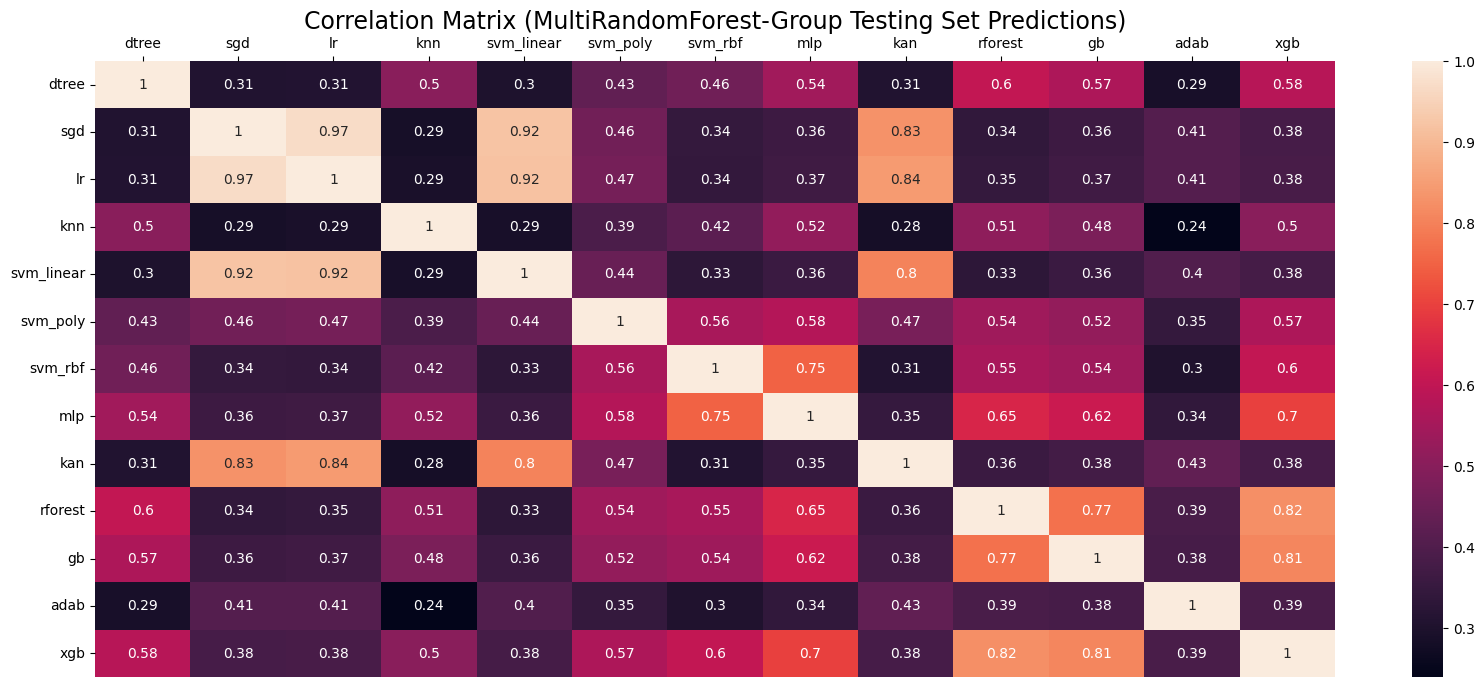

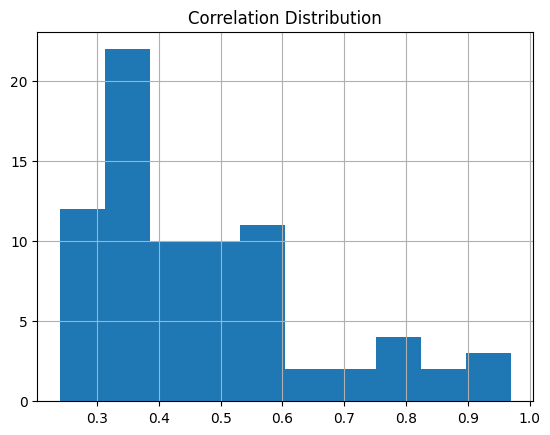

Testing correlation distribution:
count    78.000000
mean      0.474640
std       0.175296
min       0.239815
25%       0.346645
50%       0.407452
75%       0.556814
max       0.969496
Name: corr, dtype: float64

Diferença entre correlações das previsões do assessor e do conjunto de teste:
MSE: 0.0113
NMSE: 0.0732
MAE: 0.3404
NMAE: 0.5658
aRRMSE: 0.5122
aCC: 0.9062


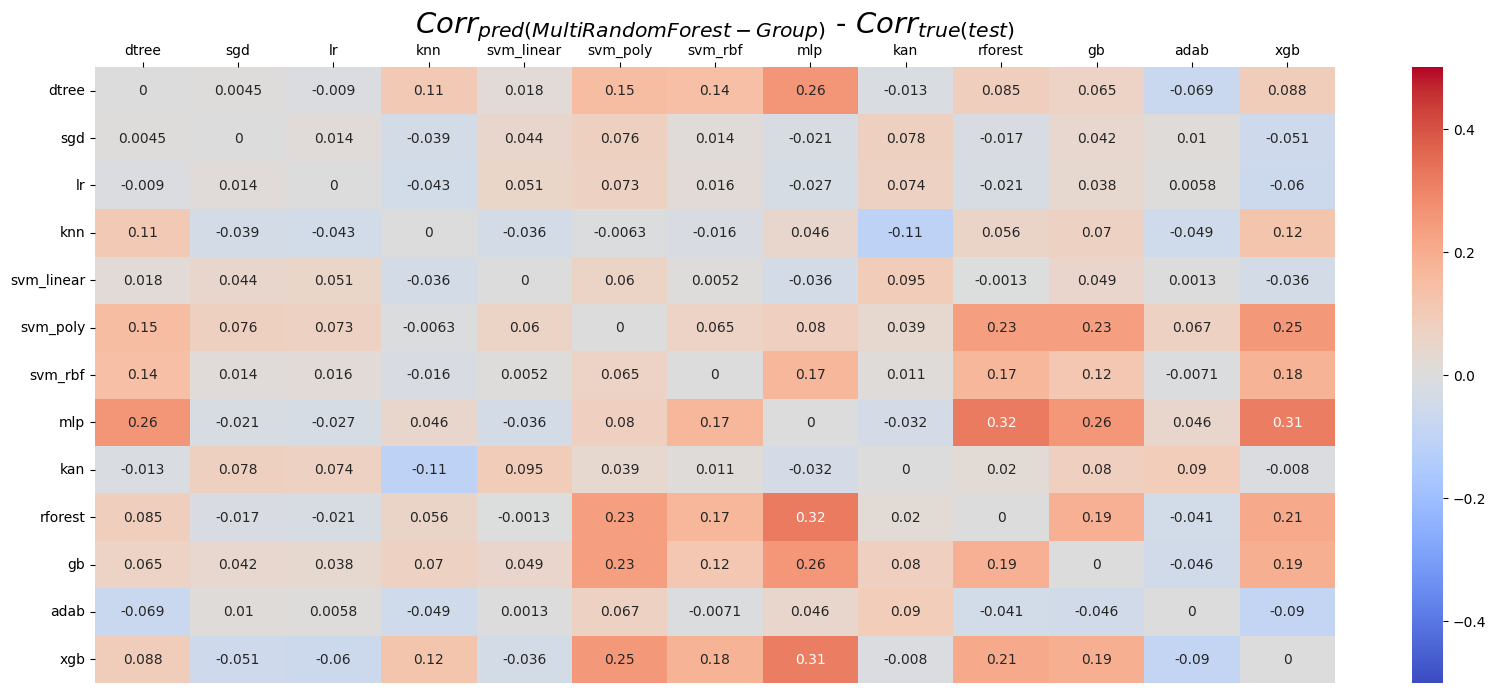

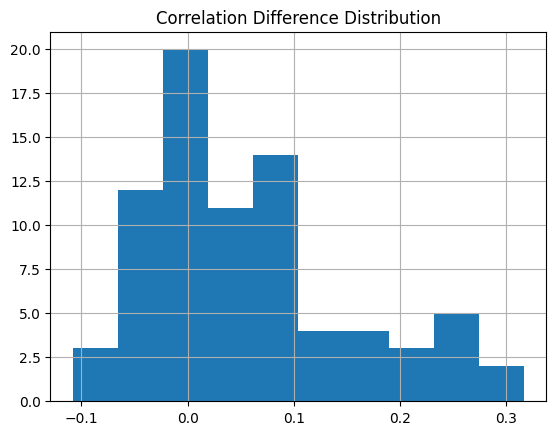

[['sgd', 'lr', 'kan', 'svm_linear'], ['mlp', 'svm_rbf', 'svm_poly', 'xgb'], ['dtree', 'rforest', 'gb', 'xgb'], ['mlp', 'svm_rbf', 'rforest', 'xgb'], ['xgb', 'mlp', 'rforest', 'gb'], ['knn'], ['adab']]


In [107]:
metrics_df.loc['MRT(g)',:] = assr_performance(mrfg, Xa_test, ya_test, Xa_train, ya_train)

results = correlation_pred_performance(mrfg, Xa_test, ya_test, min_score=MIN_SCORE, name="MultiRandomForest-Group")

diff_metrics.loc['MRT(g)',:] = results['results']

groups['mrfg_assessor'] = results['groups']
print(groups['mrfg_assessor']['test'])

In [ ]:
#keys = list(groups.keys())
#OBJV = len(groups['true_assessor_test'])
#for i in range(len(keys)):
#    if('test' in keys[i] and keys[i] != 'true_assessor_test'):
#        print(f'{keys[i]}({len(groups[keys[i]])}) & true_assessor_test({OBJV}):')
#        count = 0
#        for g in groups[keys[i]]:
#            if(g in groups['true_assessor_test']):
#                print(g)
#                count += 1
#        print(f'Número de grupos em comum: {count}\n\n')

regchain_assessor_test(6) & true_assessor_test(6):
['gb', 'xgb', 'rforest']
Número de grupos em comum: 1


mrf_assessor_test(2) & true_assessor_test(6):
Número de grupos em comum: 0


msvr_assessor_test(4) & true_assessor_test(6):
Número de grupos em comum: 0


mor_assessor_test(9) & true_assessor_test(6):
Número de grupos em comum: 0


regchain_group_test(9) & true_assessor_test(6):
Número de grupos em comum: 0


msvr_group_test(7) & true_assessor_test(6):
Número de grupos em comum: 0


mrf_group_test(7) & true_assessor_test(6):
Número de grupos em comum: 0




## Análises

In [104]:
results_df = metrics_df.dropna().copy()
results_df = results_df.reset_index()

results_df

Assessor    Model       MSE       MAE      NMSE      NMAE    aRRMSE  \
0          ST  rforest  0.062368  0.760117  0.170469  0.746096  0.871847   
1          ST       gb  0.141508  0.909401  0.252974   0.78808  0.953625   
2          ST     adab  0.002491  0.800159  0.032487  0.722684  0.894516   
3          ST      xgb  0.095247  0.872552  0.209144  0.801779  0.934105   
4          RC  rforest  0.062368  0.760117  0.170469  0.746096  0.871847   
5          RC       gb  0.142943  0.918627   0.25739  0.801837   0.95845   
6          RC     adab  0.002476  0.795496  0.033494  0.745096  0.891906   
7          RC      xgb  0.102033  0.934713  0.217264  0.832907  0.966806   
8       RC(g)  rforest  0.059304  0.722781  0.168958   0.73948  0.850165   
9       RC(g)       gb  0.142649  0.916735  0.262272  0.817044  0.957463   
10      RC(g)     adab  0.002476  0.795485  0.033073  0.735723    0.8919   
11      RC(g)      xgb  0.095247  0.872552  0.209144  0.801779  0.934105   
12     RC[10]  rforest  0.060945  0.742773  0.173272  0.758363  0.861843   
13     RC[10]       gb  0.140914  0.905585  0.258945  0.806681  0.951622   
14     RC[10]     adab  0.002442  0.784486   0.03254  0.723868  0.885712   
15     RC[10]      xgb  0.093796  0.859253  0.211515  0.810868  0.926959   
16  RC[10](g)  rforest  0.060517  0.737558  0.170434  0.745941  0.858812   
17  RC[10](g)       gb  0.139959   0.89945   0.25671  0.799718  0.948393   
18  RC[10](g)     adab  0.002455  0.788757  0.032836   0.73046   0.88812   
19  RC[10](g)      xgb  0.093717  0.858536  0.209564  0.803391  0.926572   
20     RC[30]  rforest  0.061118  0.744884  0.173449  0.759136  0.863067   
21     RC[30]       gb  0.140552  0.903258  0.257988  0.803699  0.950399   
22     RC[30]     adab  0.002435  0.782273  0.032573  0.724609  0.884462   
23     RC[30]      xgb  0.093157  0.853405  0.210866   0.80838  0.923799   
24  RC[30](g)  rforest  0.060808  0.741103  0.170667  0.746959  0.860873   
25  RC[30](g)       gb  0.139939  0.899319   0.25702  0.800684  0.948325   
26  RC[30](g)     adab  0.002447  0.786077   0.03267  0.726768   0.88661   
27  RC[30](g)      xgb  0.093279  0.854516  0.209402  0.802769  0.924401   
28     RC[50]  rforest  0.061117  0.744865  0.173585  0.759734  0.863056   
29     RC[50]       gb  0.140483  0.902815  0.258035  0.803846  0.950166   
30     RC[50]     adab  0.002436   0.78251  0.032562  0.724357  0.884596   
31     RC[50]      xgb  0.093246  0.854217  0.210639  0.807512  0.924238   
32  RC[50](g)  rforest  0.060716  0.739979  0.170672  0.746981   0.86022   
33  RC[50](g)       gb  0.139982  0.899598  0.256987  0.800581  0.948471   
34  RC[50](g)     adab  0.002446  0.785861   0.03264  0.726096  0.886488   
35  RC[50](g)      xgb  0.093286  0.854583  0.209374   0.80266  0.924437   
36     RC[80]  rforest  0.060973  0.743121  0.172807  0.756325  0.862045   
37     RC[80]       gb   0.14033  0.901834  0.257874  0.803345  0.949649   
38     RC[80]     adab  0.002432  0.781202  0.032633  0.725928  0.883856   
39     RC[80]      xgb  0.093087  0.852762  0.210209  0.805862  0.923451   
40  RC[80](g)  rforest  0.060575  0.738271   0.17044  0.745967  0.859227   
41  RC[80](g)       gb  0.139994  0.899674  0.257576  0.802415  0.948511   
42  RC[80](g)     adab  0.002446  0.785744  0.032611  0.725452  0.886422   
43  RC[80](g)      xgb  0.093261  0.854355  0.209273  0.802275  0.924313   

         aCC  
0   0.493599  
1   0.336606  
2   0.461324  
3   0.377444  
4   0.493599  
5    0.32598  
6   0.462718  
7   0.314579  
8   0.526896  
9   0.318049  
10  0.465838  
11  0.377444  
12  0.507939  
13  0.331885  
14  0.475054  
15  0.383281  
16  0.514081  
17  0.340439  
18  0.471952  
19  0.387213  
20  0.505998  
21  0.334954  
22  0.477405  
23  0.389387  
24  0.510637  
25   0.34004  
26   0.47441  
27  0.390963  
28  0.506016  
29  0.335281  
30   0.47723  
31  0.388732  
32  0.511709  
33   0.33978  
34  0.474601  
35   0.39093  
36  0.508042  
37  0.336212  

In [105]:
diff_results = diff_metrics.dropna().reset_index(names=['Assessor'])
diff_results.to_csv(f'data/{DIR}/results_diff_RC.csv') # MUDAR PARA ARQUIVO NORMAL
diff_results

Assessor       MSE       MAE      NMSE      NMAE    aRRMSE       aCC
0          ST  0.003932  0.049565  0.116603  0.316346  0.338855  0.961911
1          RC  0.001614  0.028086   0.04665  0.177681  0.209144  0.986913
2       RC(g)  0.002384  0.035192  0.068693  0.222427  0.260977  0.978683
3      RC[10]  0.005541  0.056017  0.168177  0.359285  0.389434  0.960557
4   RC[10](g)  0.005902   0.05523   0.18018  0.355461  0.399656  0.948606
5      RC[30]  0.006753  0.060382  0.206632  0.388406  0.426098  0.950955
6   RC[30](g)  0.006338  0.056467  0.194683   0.36421  0.412101   0.94483
7   RC[50](g)  0.006687  0.057365  0.205165  0.370066   0.42226   0.94225
8      RC[80]  0.007891  0.063866  0.241884  0.411557  0.456395  0.941838
9   RC[80](g)  0.006507  0.056746  0.199497  0.365916   0.41755   0.94382
10     RC[50]  0.007353  0.062562  0.225012  0.402657  0.443365  0.946736

In [106]:
win_table = pd.DataFrame(index=results_df['Assessor'].unique(), columns=results_df.drop(columns=['Assessor', 'Model']).columns)

for mt in ['MSE', 'MAE', 'NMSE', 'NMAE', 'aRRMSE']:
    assr_wins = results_df.loc[results_df.groupby("Model")[mt].idxmin(), ["Model", "Assessor", mt]]
    win_table[mt] = assr_wins['Assessor'].value_counts()

assr_wins = results_df.loc[results_df.groupby("Model")['aCC'].idxmin(), ["Model", "Assessor", 'aCC']]
win_table['aCC'] = assr_wins['Assessor'].value_counts()

win_table = win_table.fillna(0)
win_table.to_csv(f'data/{DIR}/win_table_RC.csv') # MUDAR PARA ARQUIVO NORMAL
win_table

MSE  MAE  NMSE  NMAE  aRRMSE  aCC
ST         0.0  0.0   2.0   2.0     0.0  2.0
RC         0.0  0.0   0.0   0.0     0.0  1.0
RC(g)      1.0  1.0   2.0   2.0     1.0  1.0
RC[10]     0.0  0.0   0.0   0.0     0.0  0.0
RC[10](g)  0.0  0.0   0.0   0.0     0.0  0.0
RC[30]     0.0  0.0   0.0   0.0     0.0  0.0
RC[30](g)  1.0  1.0   0.0   0.0     1.0  0.0
RC[50]     0.0  0.0   0.0   0.0     0.0  0.0
RC[50](g)  0.0  0.0   0.0   0.0     0.0  0.0
RC[80]     2.0  2.0   0.0   0.0     2.0  0.0
RC[80](g)  0.0  0.0   0.0   0.0     0.0  0.0

In [107]:
summary = results_df.drop(columns=['Model']).groupby(['Assessor']).agg(['mean', 'std'])
summary.to_csv(f'data/{DIR}/results_RC.csv') # MUDAR PARA ARQUIVO NORMAL
summary

MSE                 MAE                NMSE            \
               mean       std      mean       std      mean       std   
Assessor                                                                
RC         0.077455  0.059839  0.852238  0.087399  0.169654  0.097476   
RC(g)      0.074919  0.059139  0.826889  0.085600  0.168362  0.097955   
RC[10]     0.074524  0.058193  0.823024  0.073153  0.169068  0.097532   
RC[10](g)  0.074162  0.057850  0.821075  0.072031  0.167386  0.096386   
RC[30]     0.074316  0.057975  0.820955  0.070969  0.168719  0.097131   
RC[30](g)  0.074118  0.057774  0.820254  0.070376   0.16744  0.096538   
RC[50]      0.07432  0.057958  0.821102  0.070887  0.168705  0.097120   
RC[50](g)  0.074107  0.057798  0.820005  0.070947  0.167418  0.096538   
RC[80]     0.074206  0.057895   0.81973  0.071146  0.168381  0.096964   
RC[80](g)  0.074069  0.057811  0.819511  0.071602  0.167475  0.096717   
ST         0.075403  0.058451  0.835557  0.067739  0.166269  0.095344   

               NMAE              aRRMSE                 aCC            
               mean       std      mean       std      mean       std  
Assessor                                                               
RC         0.781484  0.043340  0.922252  0.047459  0.399219  0.092137  
RC(g)      0.773506  0.041953  0.908408  0.047369  0.422057  0.092585  
RC[10]     0.774945  0.041559  0.906534  0.040336   0.42454  0.081229  
RC[10](g)  0.769878  0.037150  0.905474  0.039857  0.428421  0.078891  
RC[30]     0.773956  0.039684  0.905432  0.039132  0.426936  0.078885  
RC[30](g)  0.769295  0.038355  0.905052  0.038896  0.429013  0.077647  
RC[50]     0.773862  0.039504  0.905514  0.039092  0.426815  0.078832  
RC[50](g)  0.769079  0.038540  0.904904  0.039223  0.429255  0.078165  
RC[80]     0.772865  0.038706   0.90475  0.039268  0.428302  0.079103  
RC[80](g)  0.769027  0.039373  0.904618  0.039606  0.429585  0.079050  
ST          0.76466  0.036665  0.913523  0.037103  0.417243  0.072708

In [137]:
results_df_c = results_df.copy()

In [113]:
class_palette = sns.color_palette()[:7]

In [101]:
from torch import relu
from torch import Tensor

class_palette = [sns.color_palette('bright')[-3],
                 sns.color_palette('bright')[3], relu(Tensor(sns.color_palette()[3])-Tensor([0.2]*3)).tolist(),
                 sns.color_palette('bright')[2], relu(Tensor(sns.color_palette()[2])-Tensor([0.15]*3)).tolist(),
                 sns.color_palette('bright')[0], relu(Tensor(sns.color_palette()[0])-Tensor([0.15]*3)).tolist(),
                 sns.color_palette('bright')[8], relu(Tensor(sns.color_palette()[8])-Tensor([0.15]*3)).tolist(),
                 sns.color_palette('bright')[4], relu(Tensor(sns.color_palette()[4])-Tensor([0.15]*3)).tolist(),
                 
                 ]

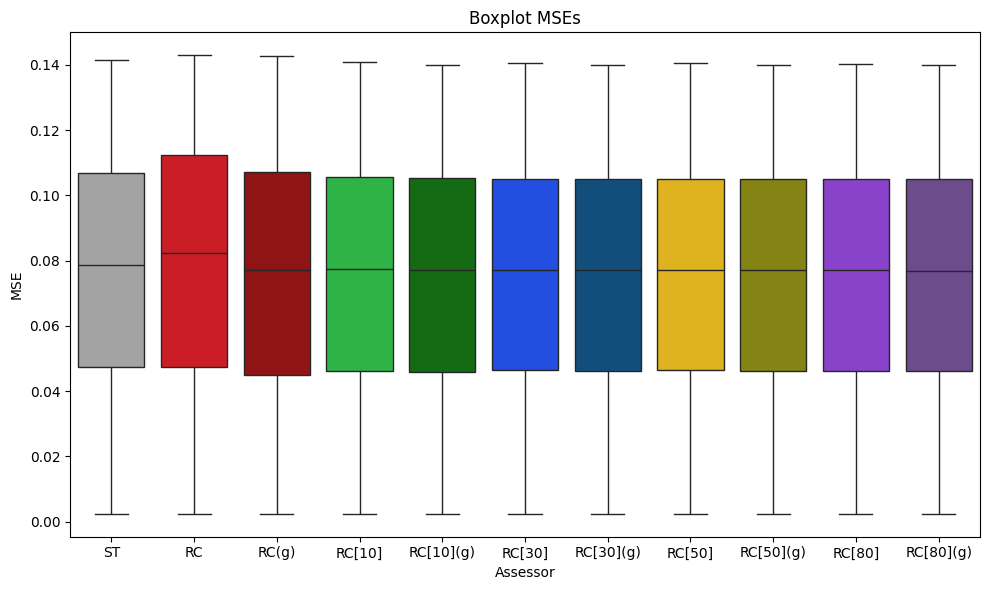

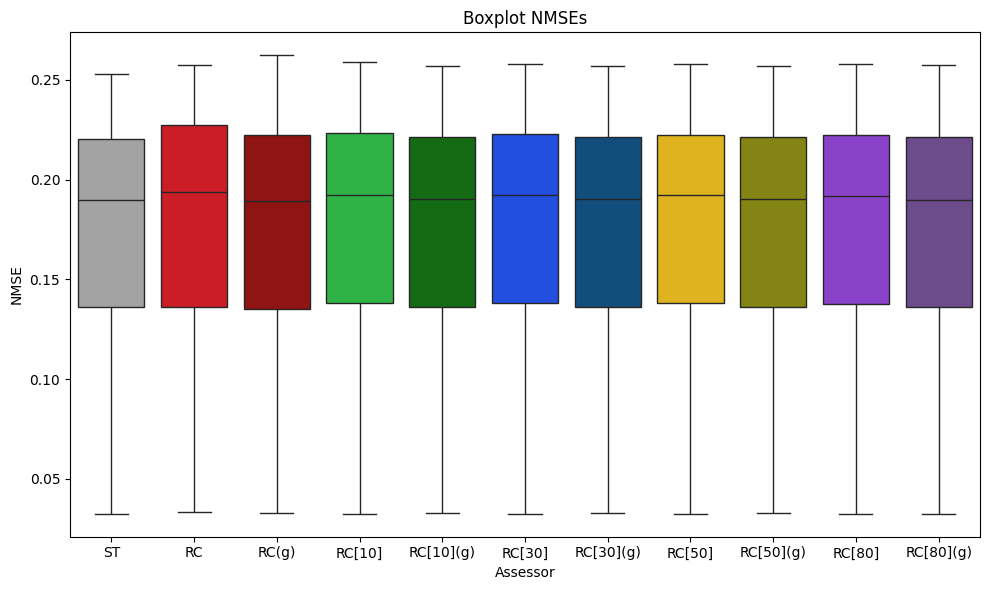

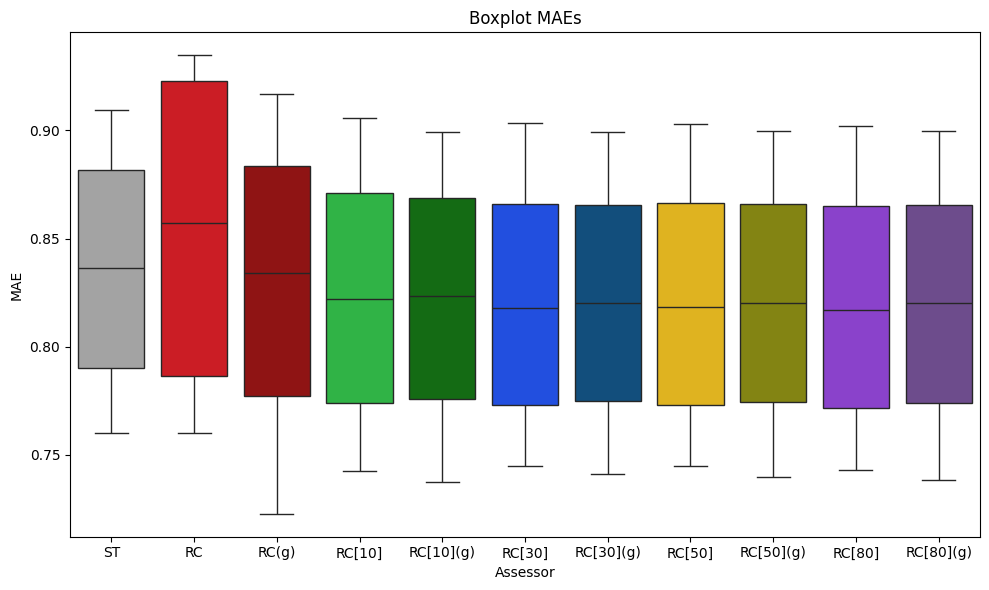

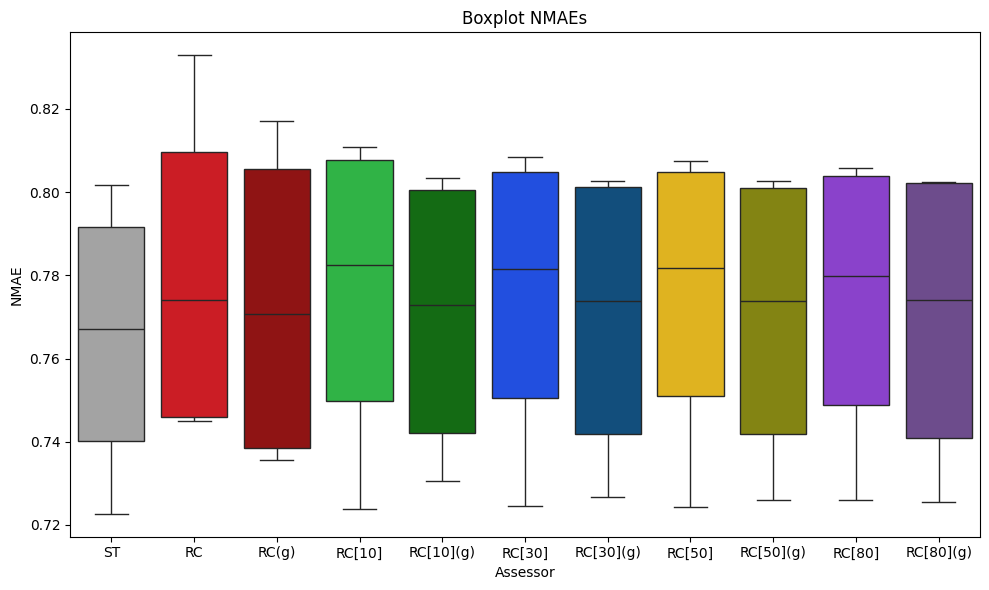

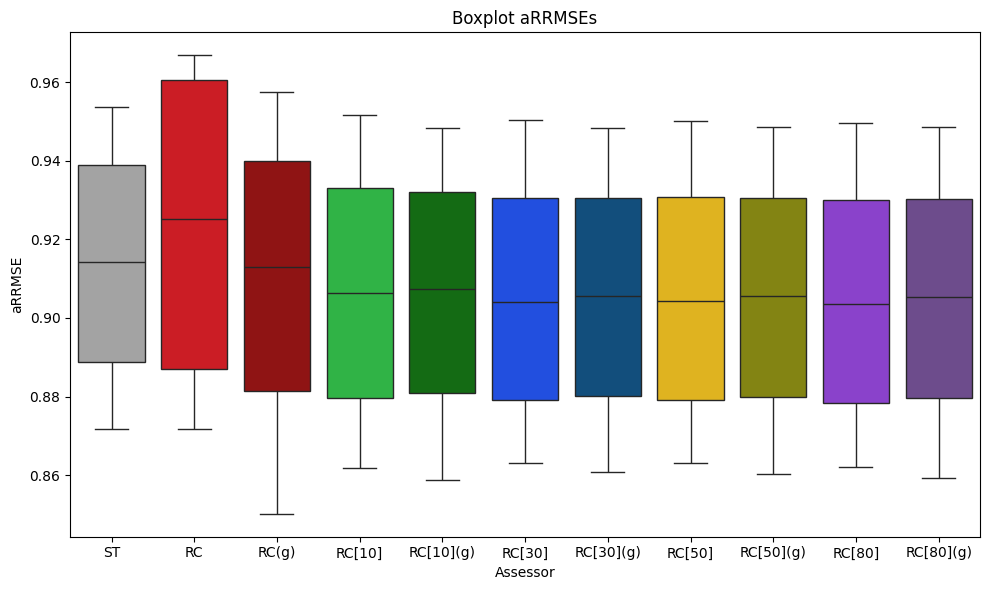

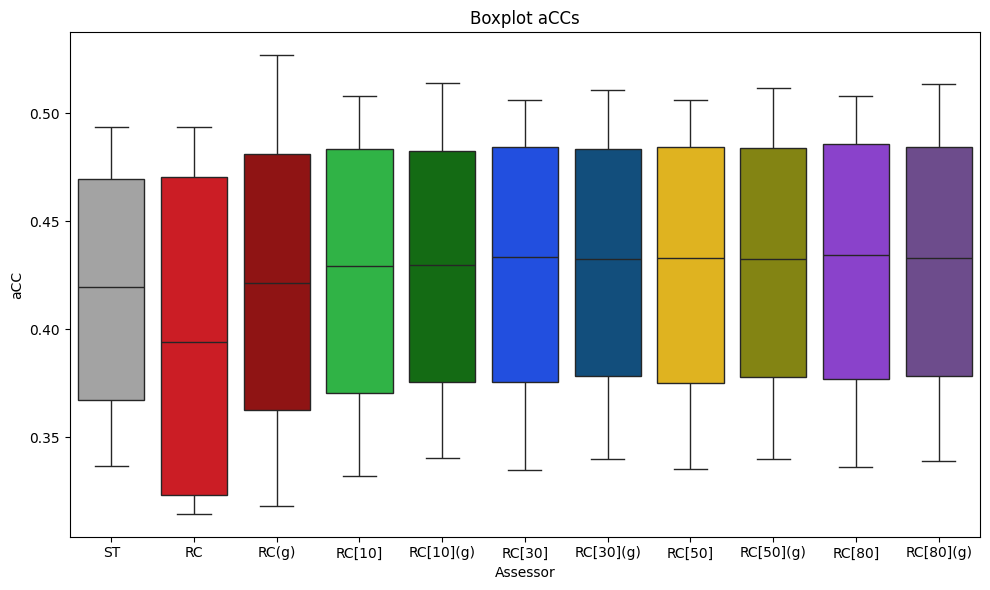

In [108]:
#temp = results_df.drop(index=results_df[results_df['Assessor'].str.contains('M-SVR')].index) #.copy()

for mt in ['MSE', 'NMSE', 'MAE', 'NMAE', 'aRRMSE', 'aCC']:
    plt.figure(figsize=(10,6))
    plt.title(f'Boxplot {mt}s')
    temp = results_df.loc[:,['Assessor','Model',mt]].copy()
    if((temp[mt] > 1.2).any()):
        dicio = {}
        for a in temp['Assessor'].unique():
            out_limits = (temp.loc[temp["Assessor"]==a,mt]>1.2).sum()
            if(out_limits > 0):
                dicio[a] = a + "*"*out_limits
        temp = temp.replace(dicio)
        plt.ylim(bottom=temp[mt].min()-0.017,top=temp.loc[temp[mt]<1.2,mt].max()+0.017)
    imgplt = sns.boxplot(temp, y=mt, x='Assessor', hue='Assessor', palette=class_palette)
    plt.tight_layout()
    plt.show(imgplt)
    imgplt.figure.savefig(f'data/{DIR}/imgs/bp_{mt.lower()}_RC.eps', format='eps', dpi=300)

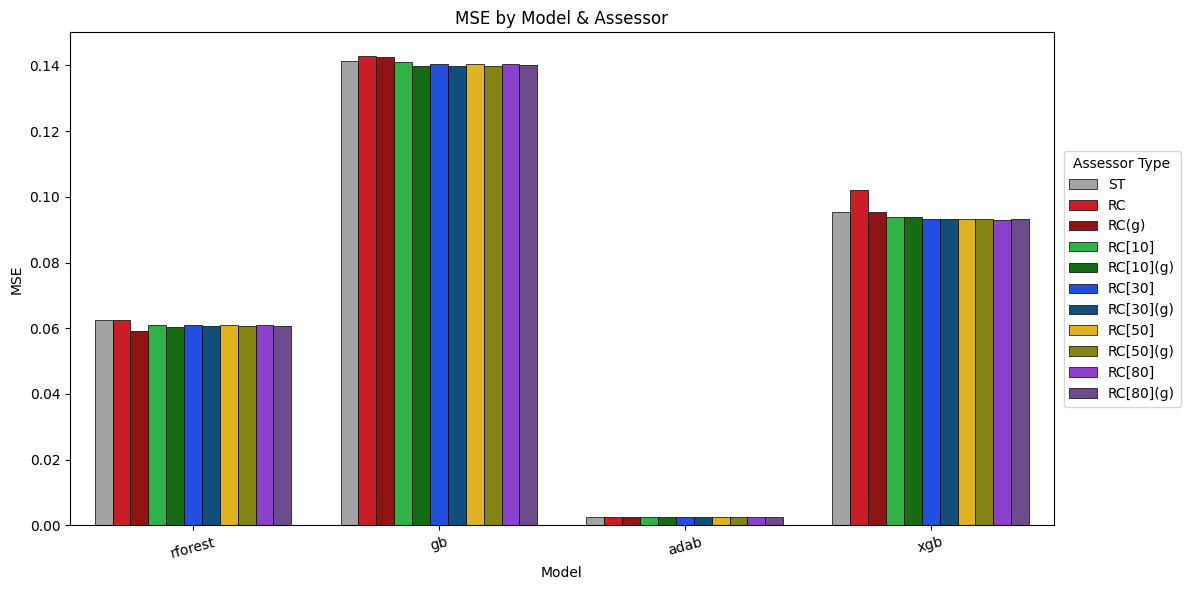

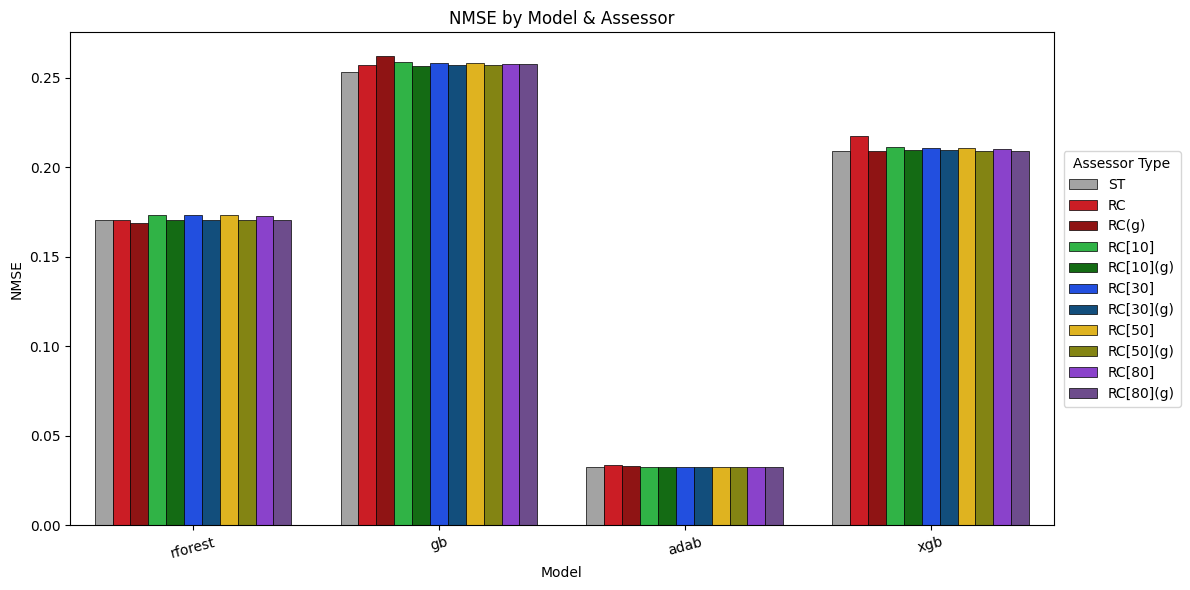

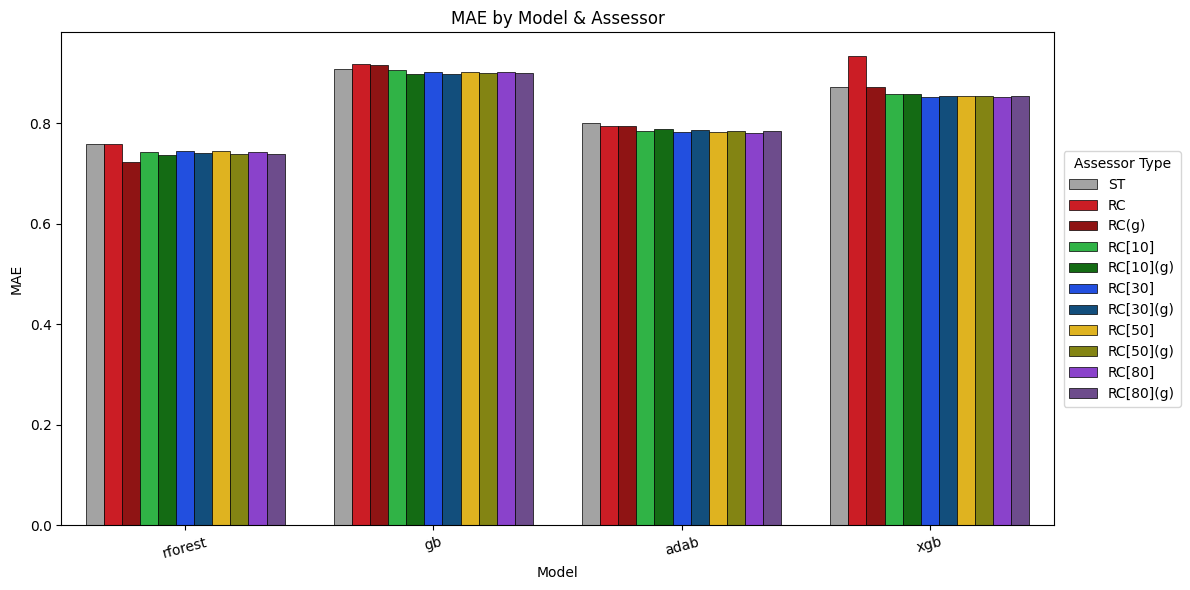

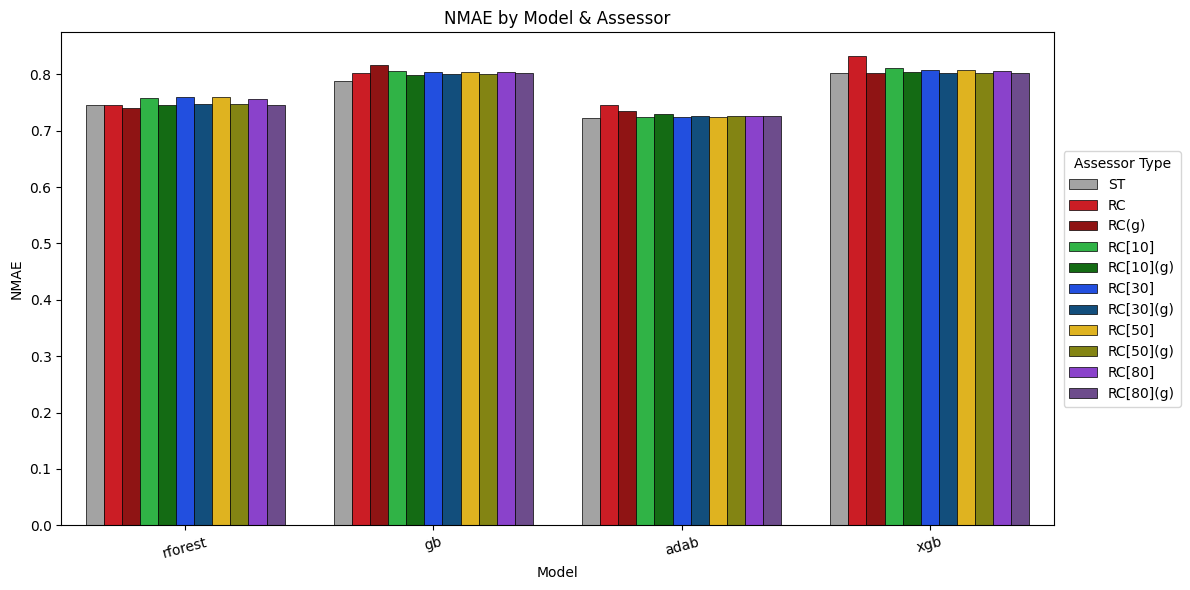

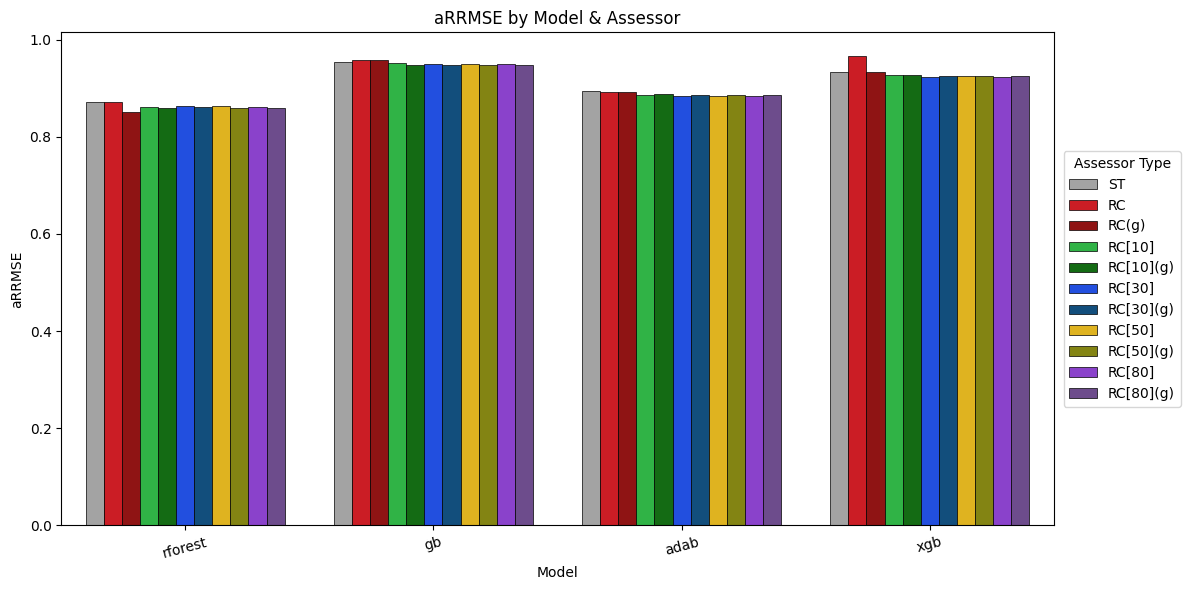

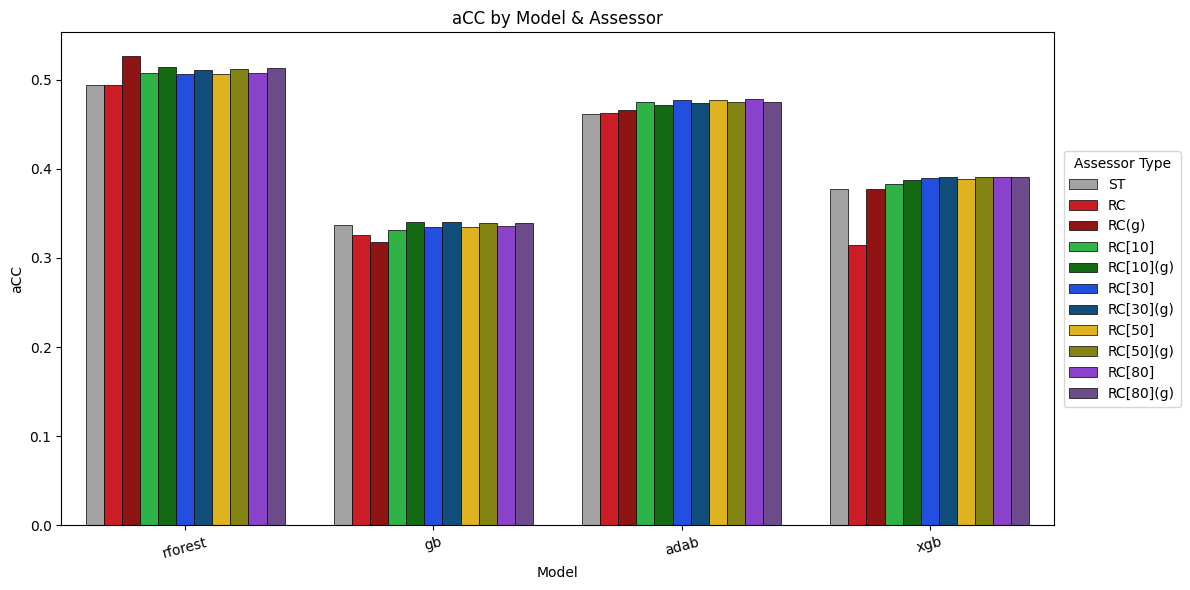

In [109]:
for mt in ['MSE', 'NMSE', 'MAE', 'NMAE', 'aRRMSE', 'aCC']:
    plt.figure(figsize=(12, 6))
    imgplt = sns.barplot(data=results_df, x='Model', y=mt, hue='Assessor', palette=class_palette, edgecolor='black', linewidth=0.5)
    plt.legend(bbox_to_anchor=(1.01, 0.5), loc='center left', borderaxespad=0, title='Assessor Type')
    plt.title(f'{mt} by Model & Assessor')
    plt.xticks(rotation=15)
    plt.tight_layout()
    plt.show(imgplt)
    #imgplt.figure.savefig(f'data/{DIR}/imgs/bar_{mt.lower()}.eps', format='eps', dpi=300)

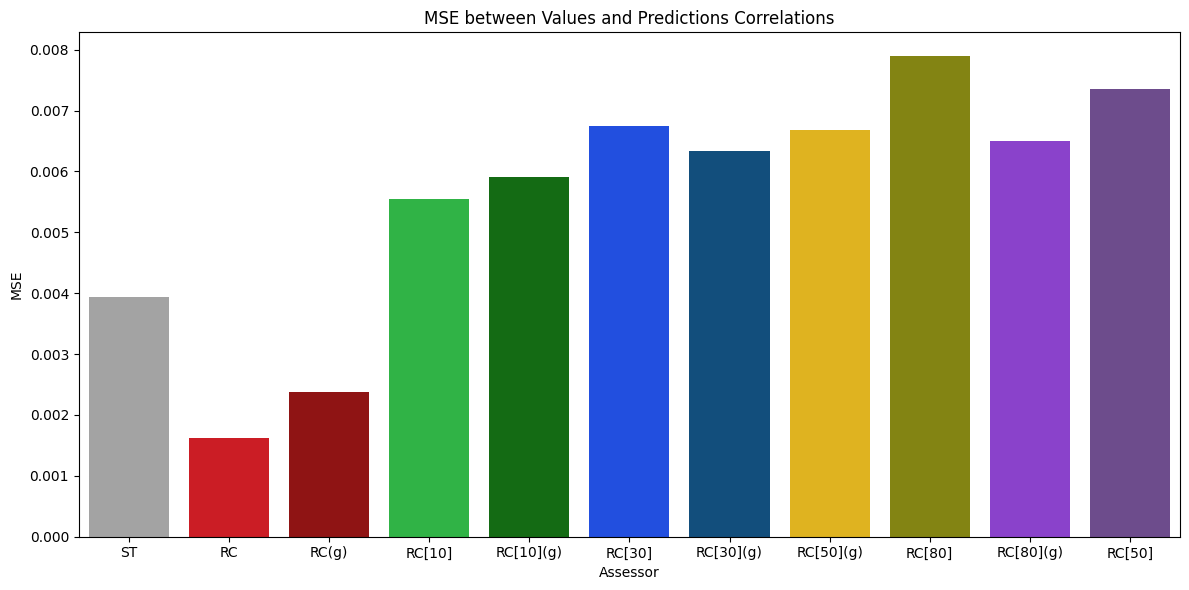

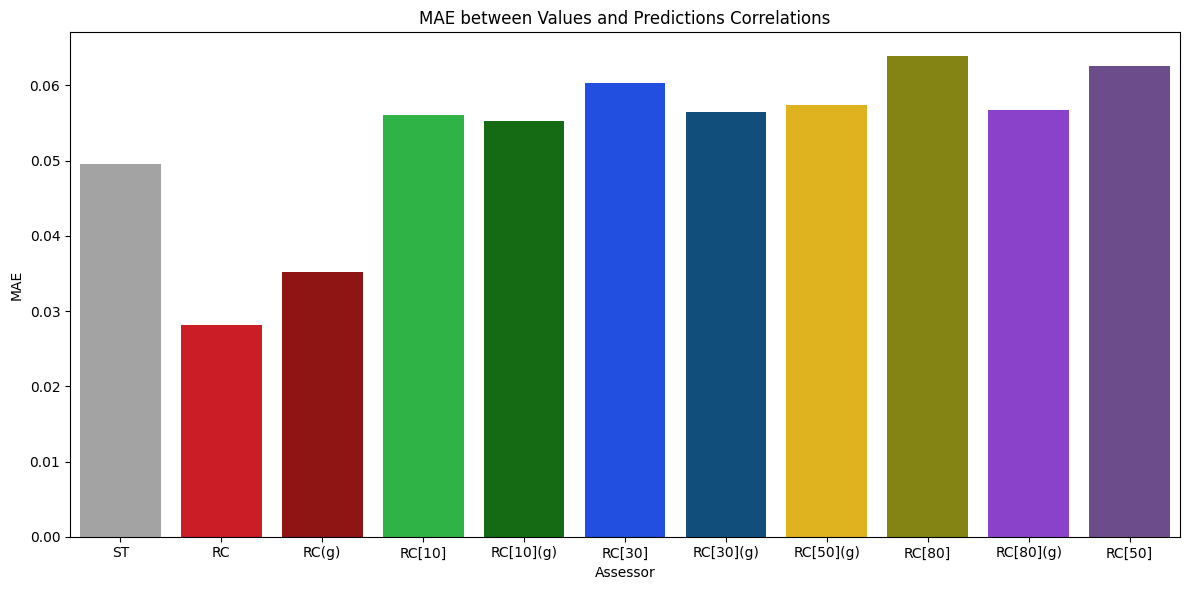

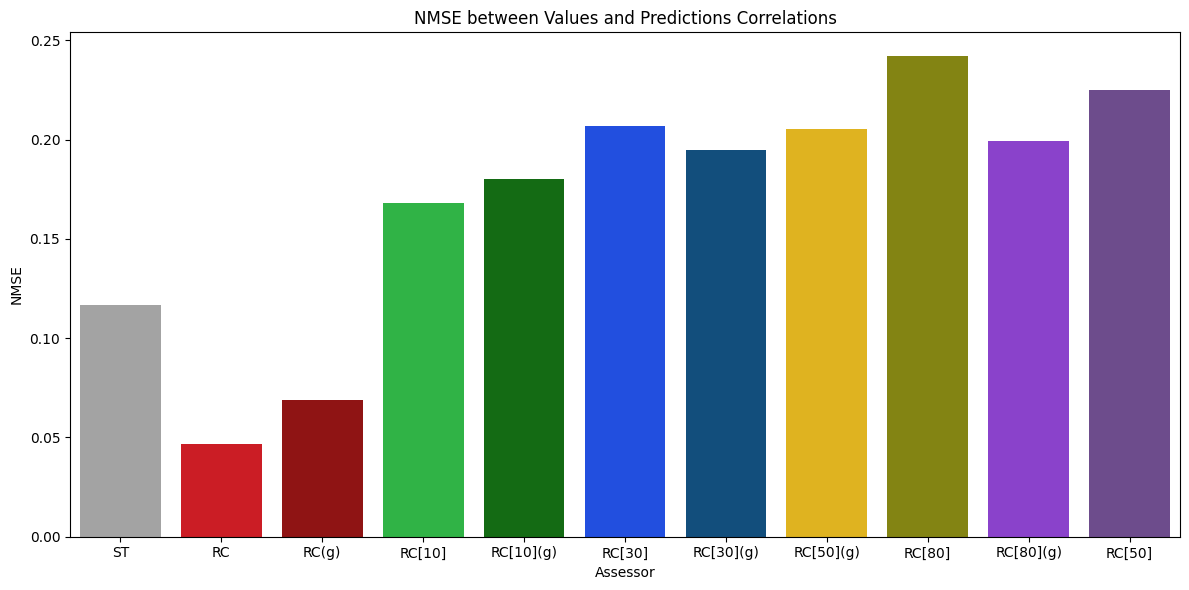

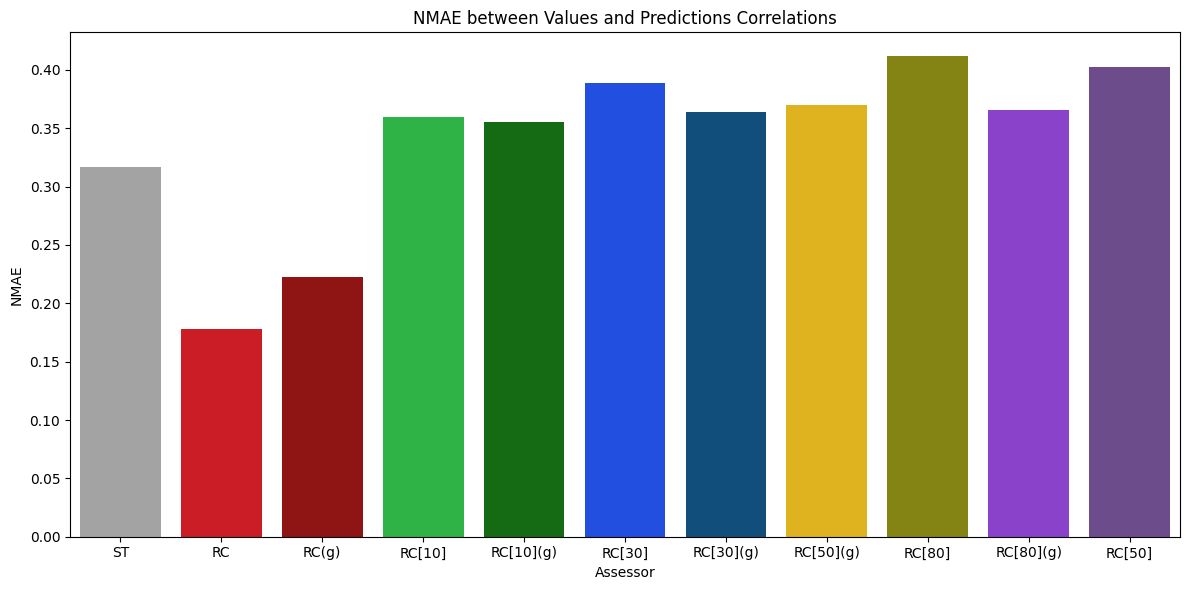

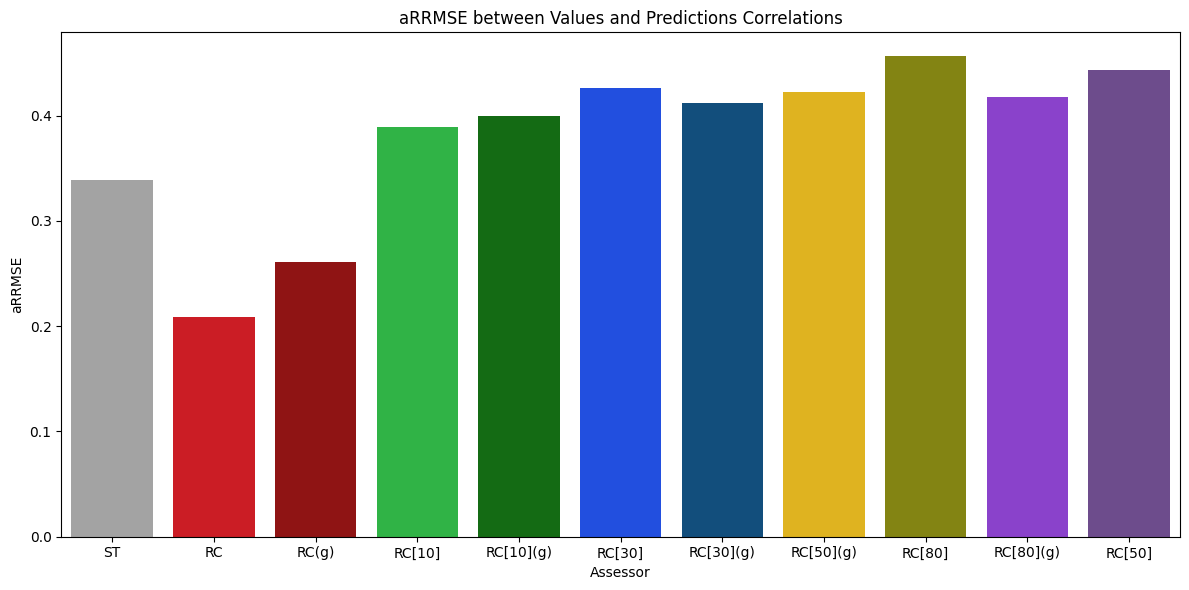

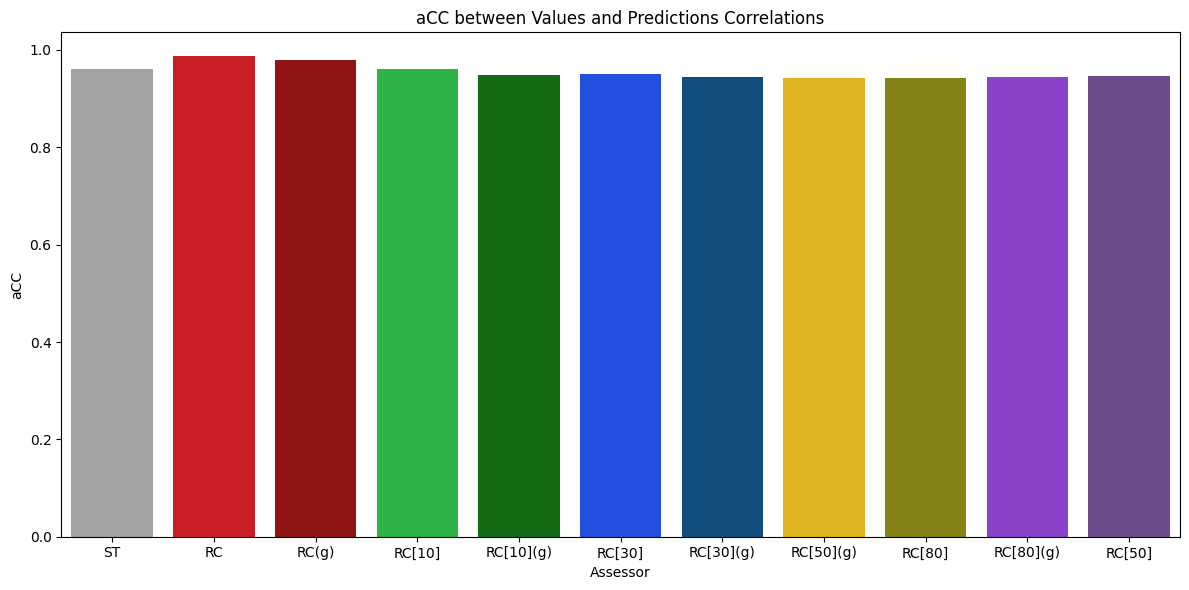

In [110]:
for mt in diff_metrics.columns:
    plt.figure(figsize=(12, 6))
    imgplt = sns.barplot(data=diff_results.loc[:,['Assessor', mt]], x='Assessor', y=mt, hue='Assessor', palette=class_palette)
    plt.title(f"{mt} between Values and Predictions Correlations")
    plt.tight_layout()
    plt.show(imgplt)
    #imgplt.figure.savefig(f'data/{DIR}/imgs/bardiff_{mt.lower()}.eps', format='eps', dpi=300)

---

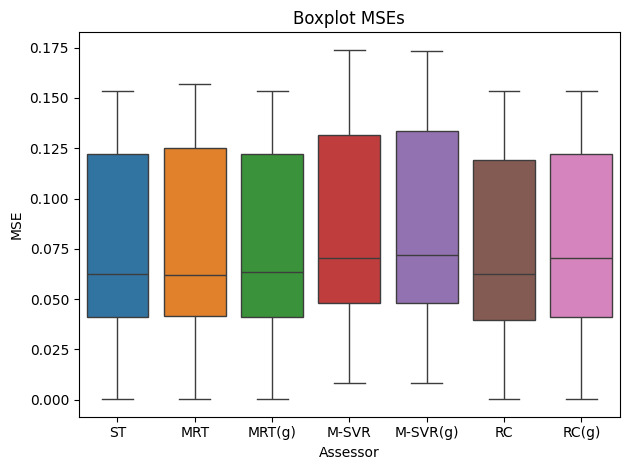

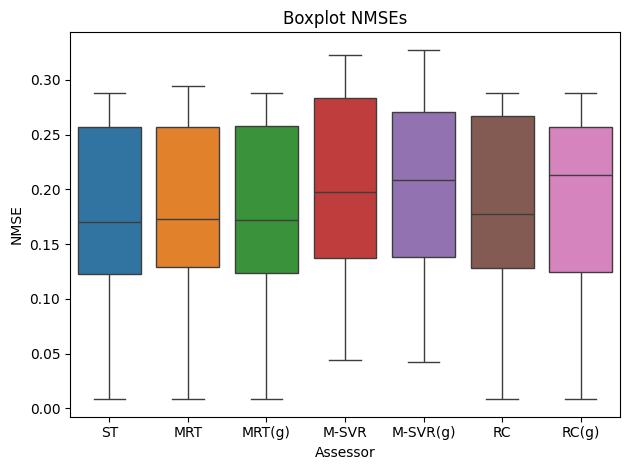

C:\Users\pedro\AppData\Local\Temp\ipykernel_12212\1332952985.py:12: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  temp = temp.replace(dicio)


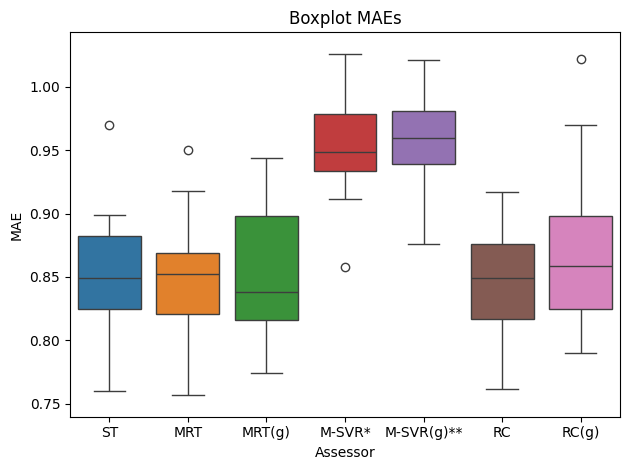

C:\Users\pedro\AppData\Local\Temp\ipykernel_12212\1332952985.py:12: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  temp = temp.replace(dicio)


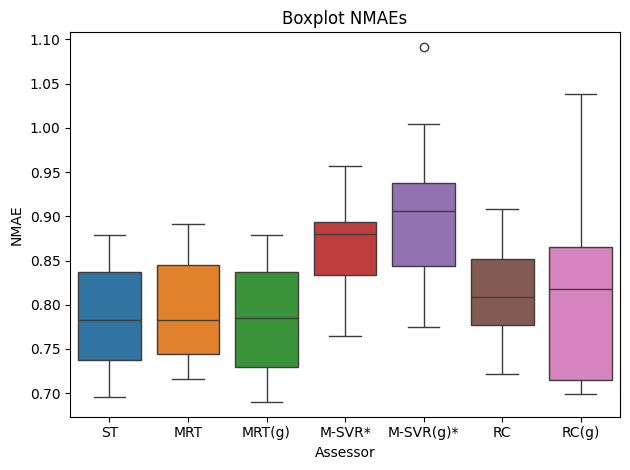

C:\Users\pedro\AppData\Local\Temp\ipykernel_12212\1332952985.py:12: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  temp = temp.replace(dicio)


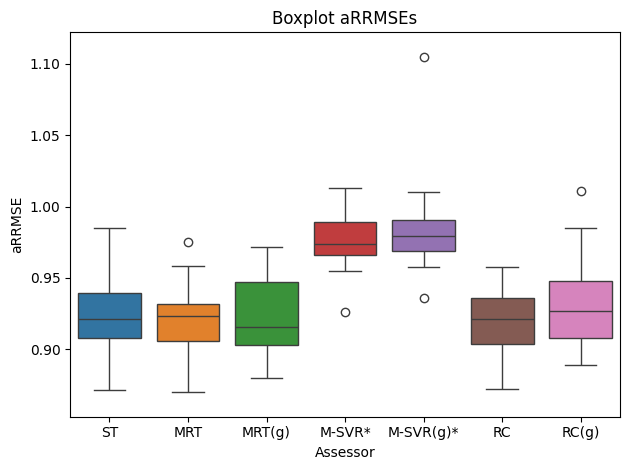

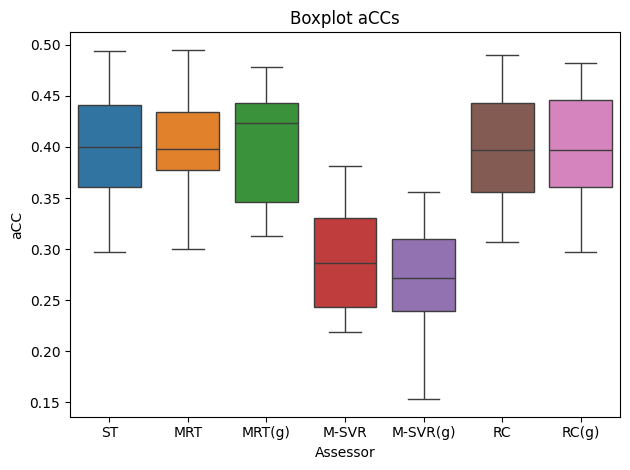

In [157]:
#temp = results_df.drop(index=results_df[results_df['Assessor'].str.contains('M-SVR')].index) #.copy()

for mt in ['MSE', 'NMSE', 'MAE', 'NMAE', 'aRRMSE', 'aCC']:
    plt.title(f'Boxplot {mt}s')
    temp = results_df.loc[:,['Assessor','Model',mt]].copy()
    if((temp[mt] > 1.2).any()):
        dicio = {}
        for a in temp['Assessor'].unique():
            out_limits = (temp.loc[temp["Assessor"]==a,mt]>1.2).sum()
            if(out_limits > 0):
                dicio[a] = a + "*"*out_limits
        temp = temp.replace(dicio)
        plt.ylim(bottom=temp[mt].min()-0.017,top=temp.loc[temp[mt]<1.2,mt].max()+0.017)
    imgplt = sns.boxplot(temp, y=mt, x='Assessor', hue='Assessor', palette=class_palette)
    plt.tight_layout()
    plt.show(imgplt)
    imgplt.figure.savefig(f'data/{DIR}/imgs/bp_{mt.lower()}.eps', format='eps', dpi=300)

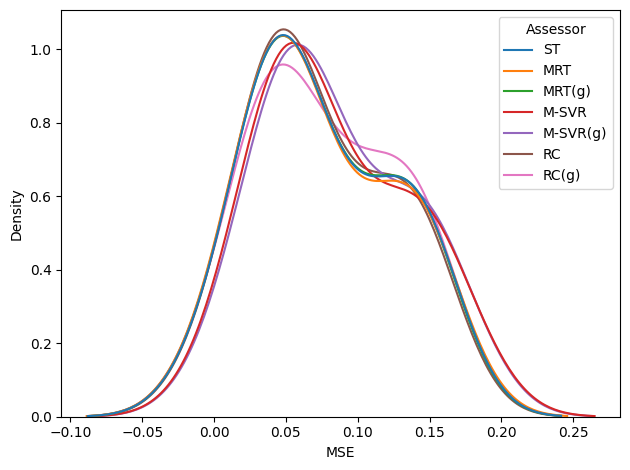

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


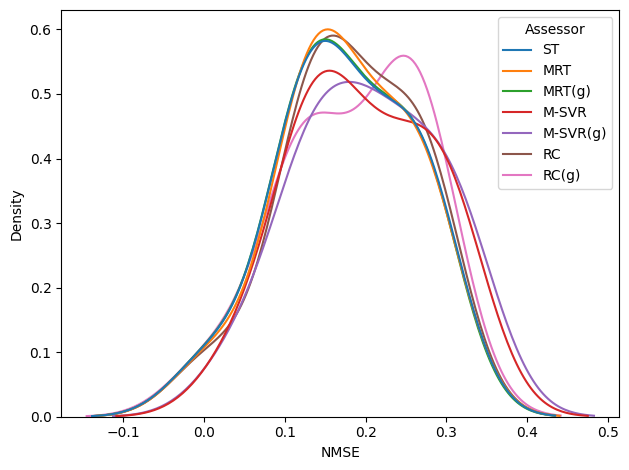

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
C:\Users\pedro\AppData\Local\Temp\ipykernel_12212\1530833369.py:17: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  temp = temp.replace(dicio)


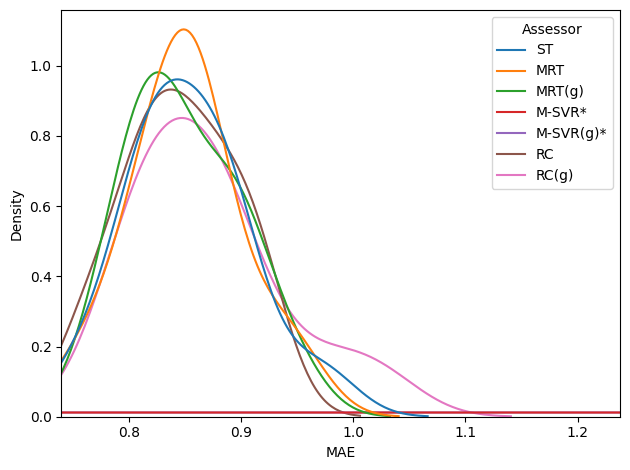

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
C:\Users\pedro\AppData\Local\Temp\ipykernel_12212\1530833369.py:17: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  temp = temp.replace(dicio)


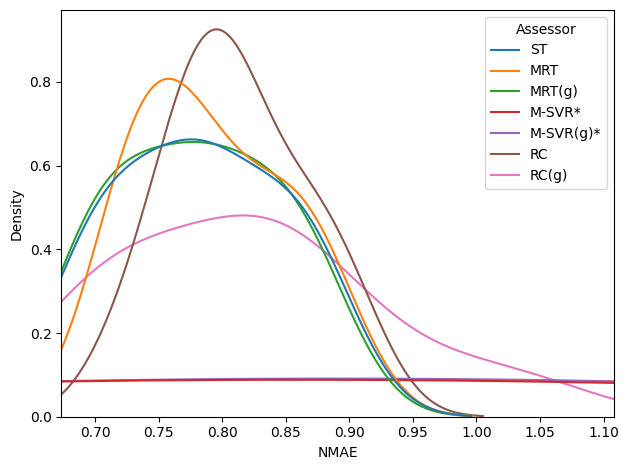

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
C:\Users\pedro\AppData\Local\Temp\ipykernel_12212\1530833369.py:17: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  temp = temp.replace(dicio)


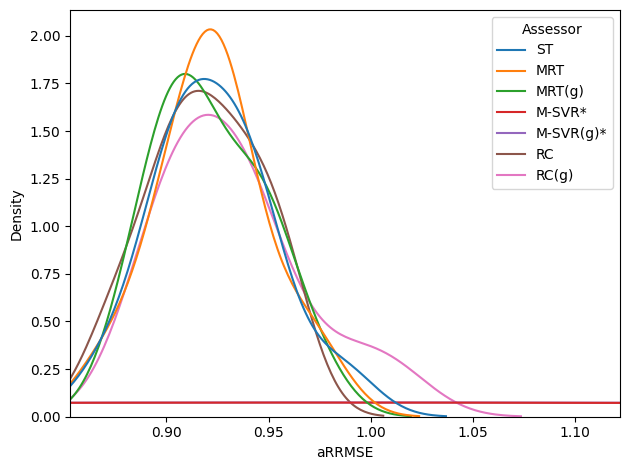

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


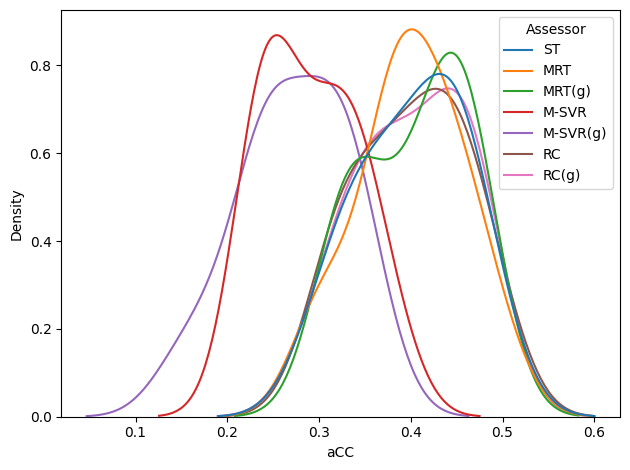

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


In [ ]:
for mt in ['MSE', 'NMSE', 'MAE', 'NMAE', 'aRRMSE', 'aCC']:
    temp = results_df.loc[:,['Assessor','Model',mt]].copy()
    if((temp[mt] > 1.5).any()):
        dicio = {}
        for a in temp['Assessor'].unique():
            out_limits = (temp.loc[temp["Assessor"]==a,mt]>1.5).sum()
            if(out_limits > 0):
                dicio[a] = a + "*"*out_limits
        temp = temp.replace(dicio)
        plt.xlim(temp[mt].min()-0.017,temp.loc[temp[mt]<1.5,mt].max()+0.017)
    imgplt = sns.kdeplot(temp, x=mt, hue='Assessor', palette=class_palette)
    plt.tight_layout()
    plt.show(imgplt)
    imgplt.figure.savefig(f'data/{DIR}/imgs/kde_{mt.lower()}.eps', format='eps', dpi=300)

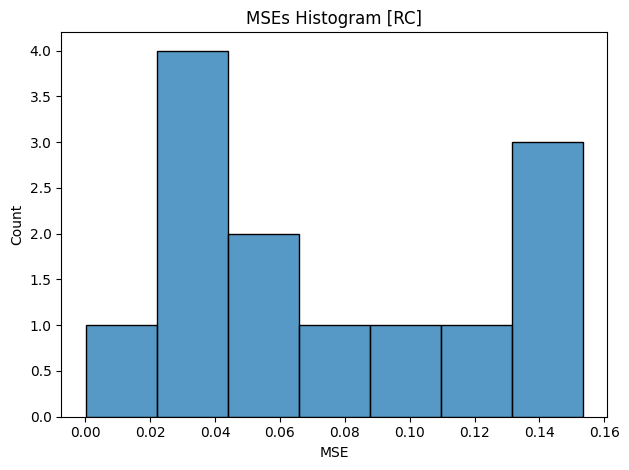

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


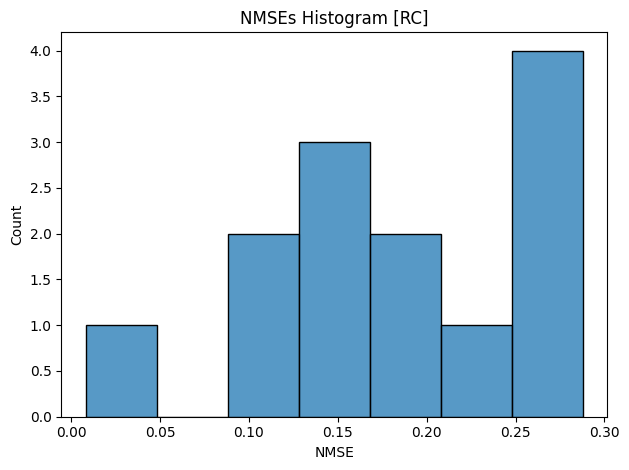

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


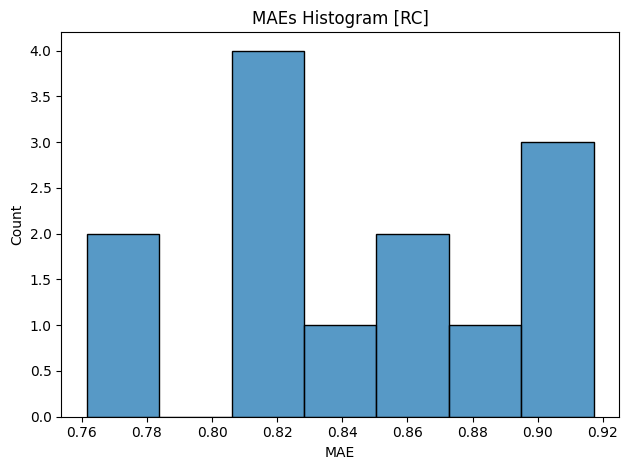

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


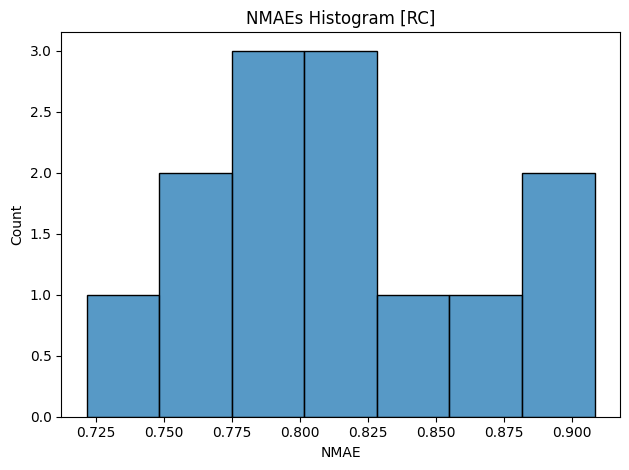

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


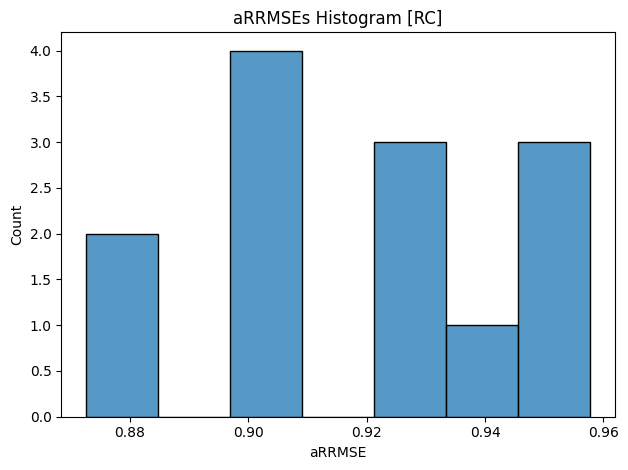

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


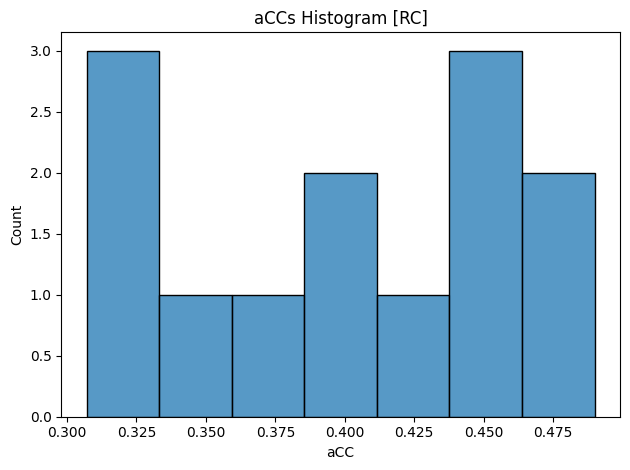

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


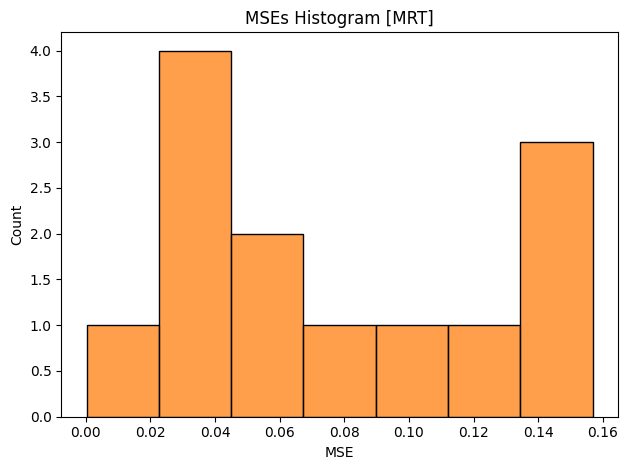

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


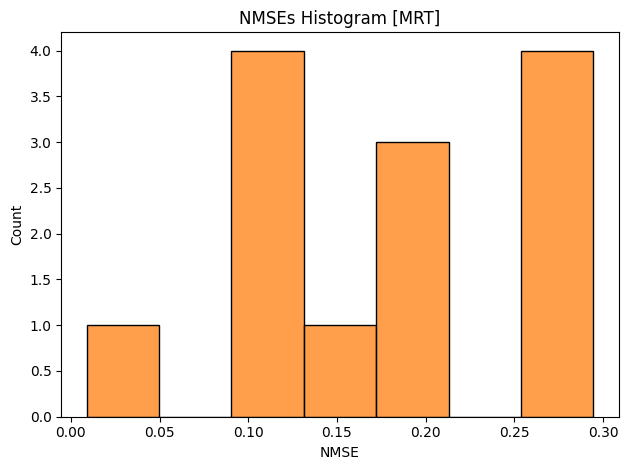

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


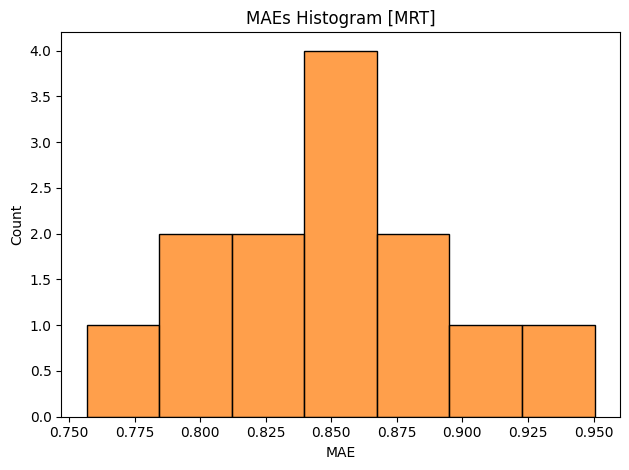

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


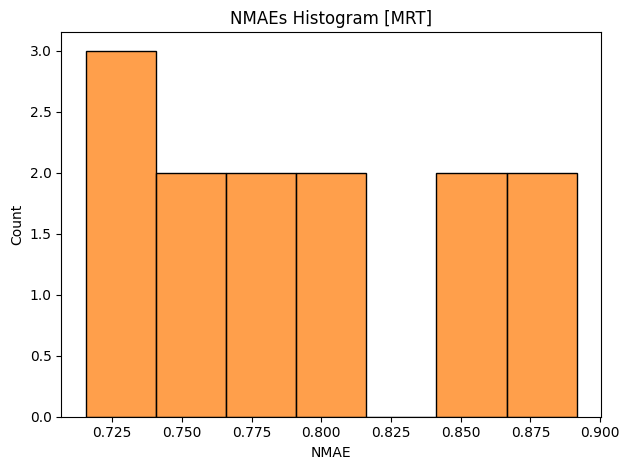

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


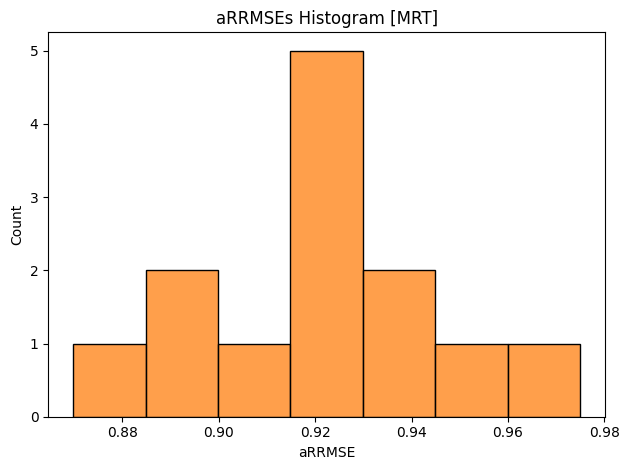

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


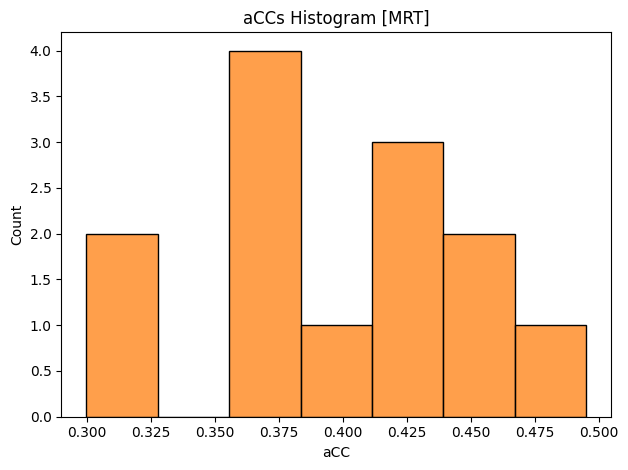

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


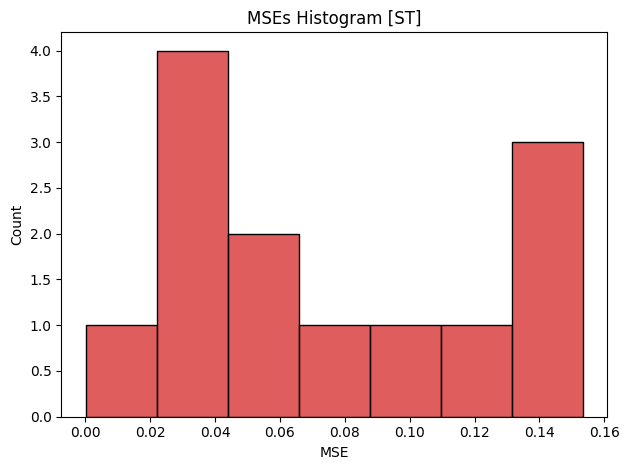

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


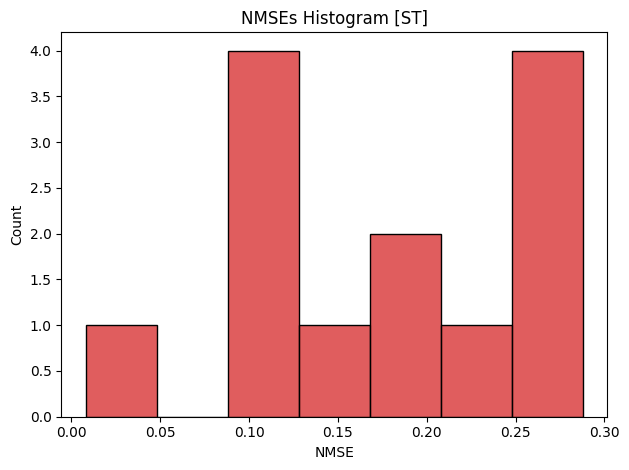

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


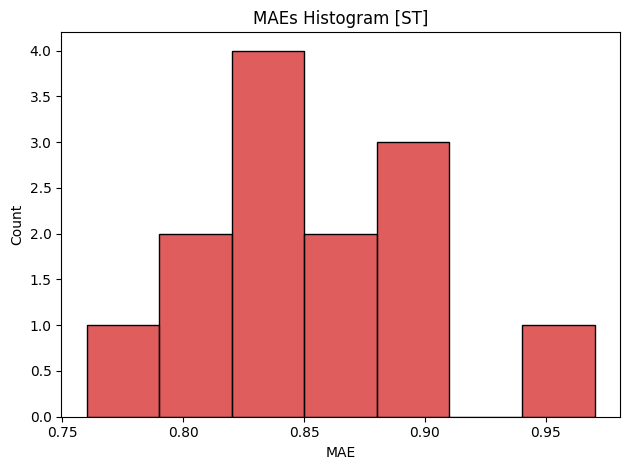

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


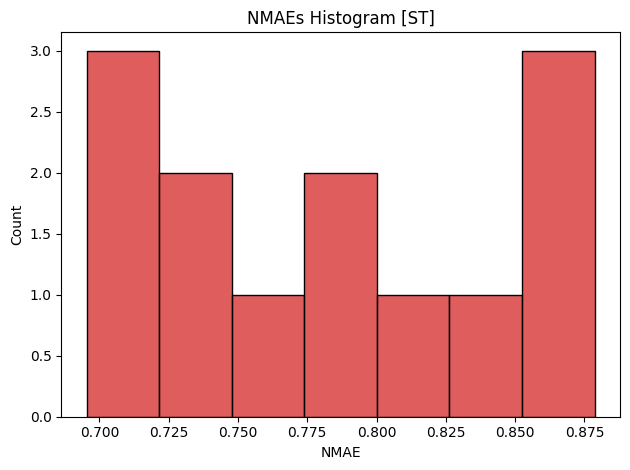

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


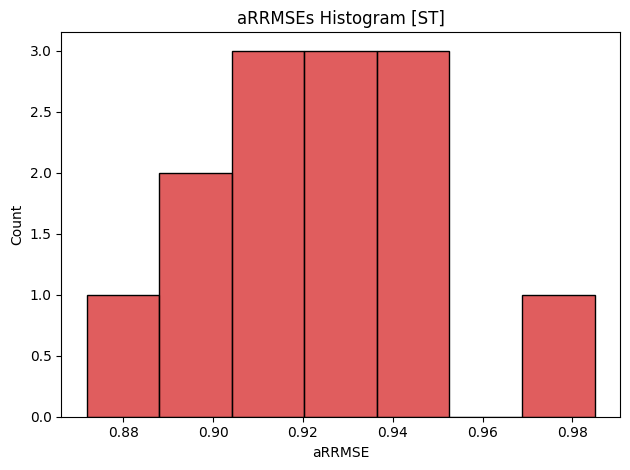

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


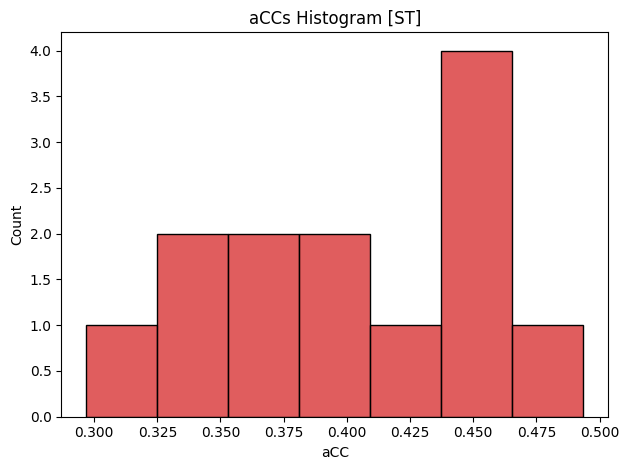

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


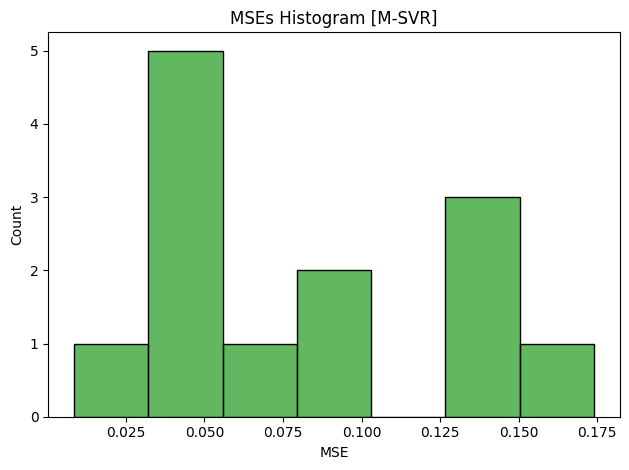

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


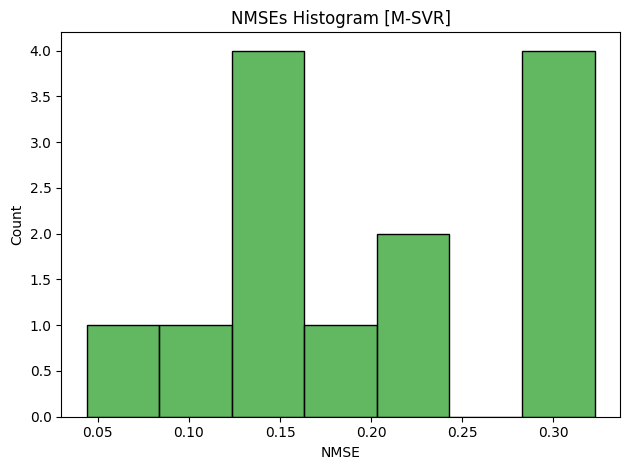

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


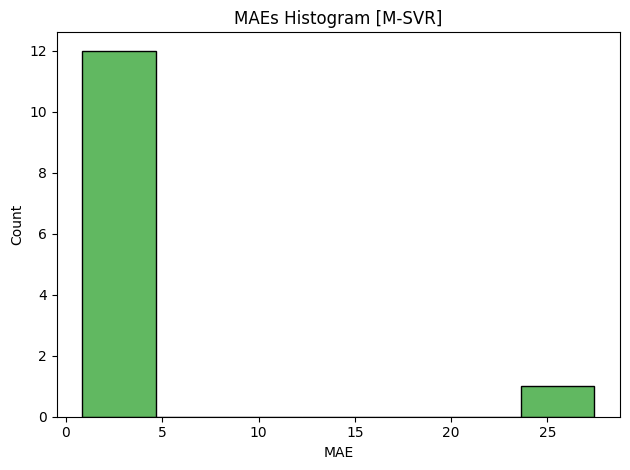

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


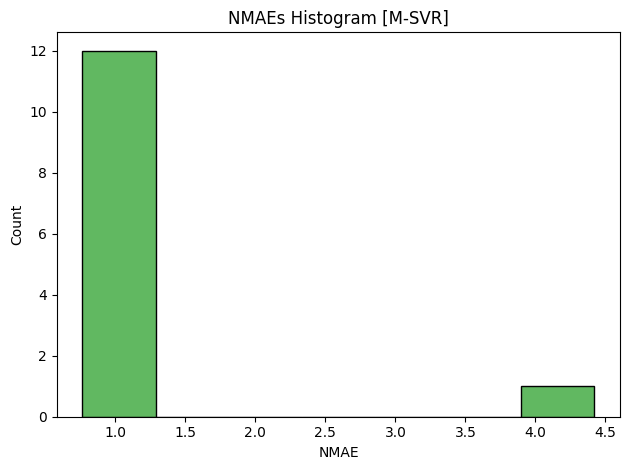

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


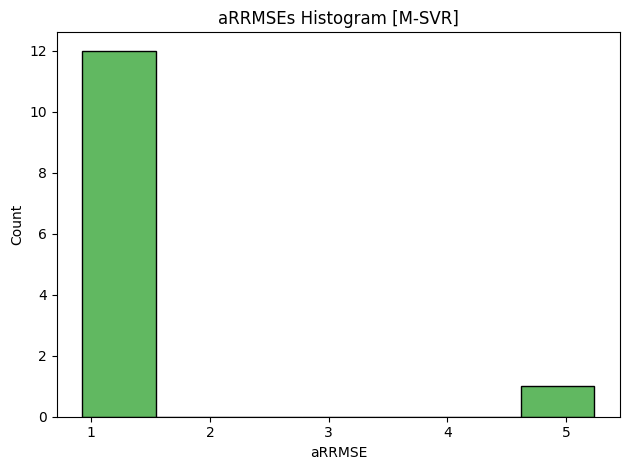

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


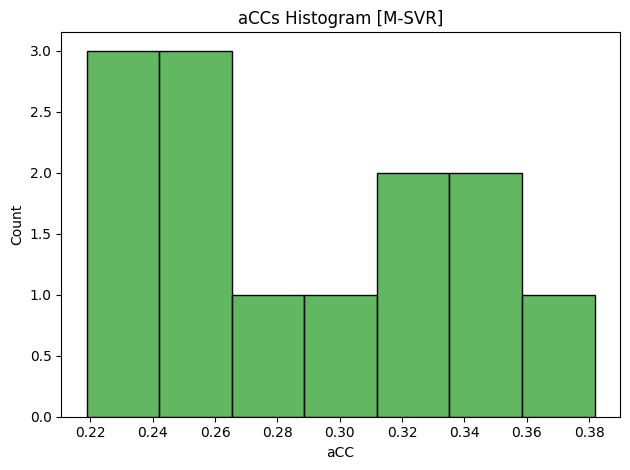

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


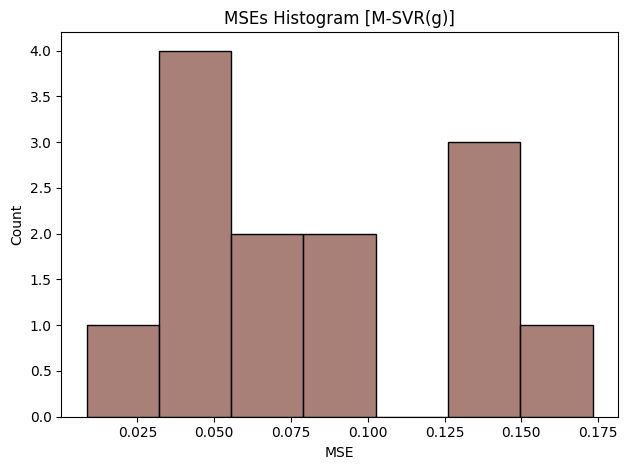

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


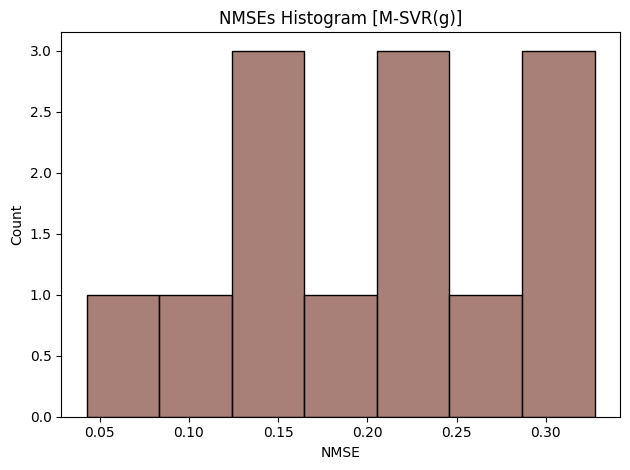

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


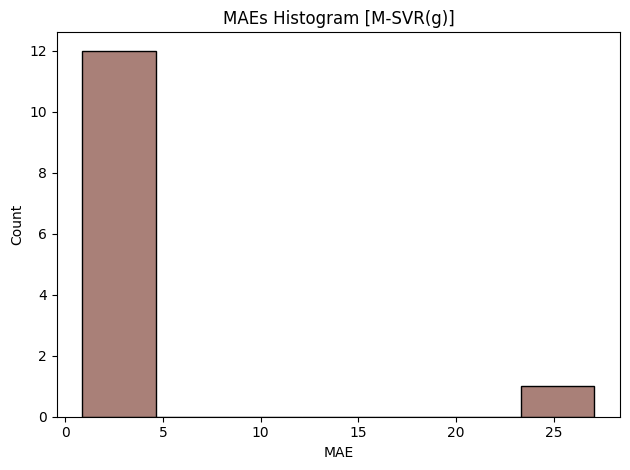

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


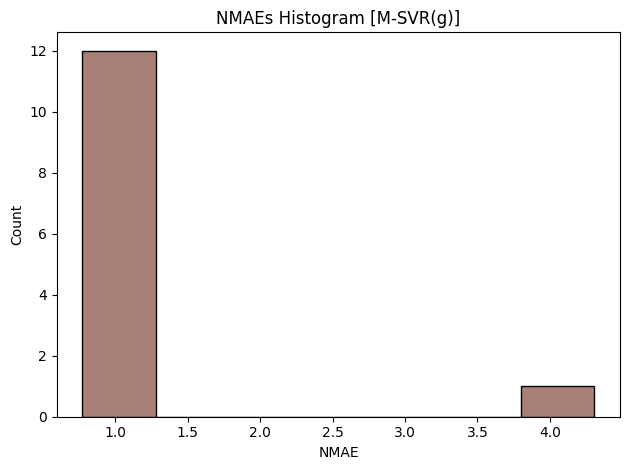

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


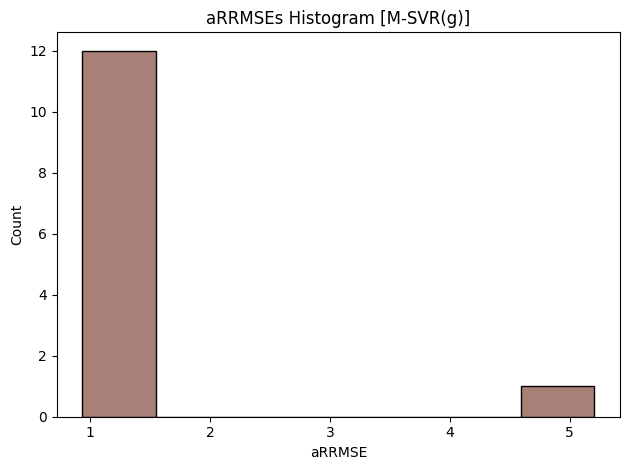

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


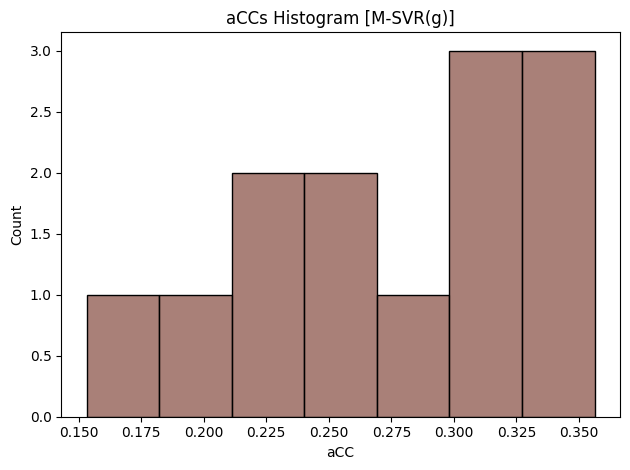

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


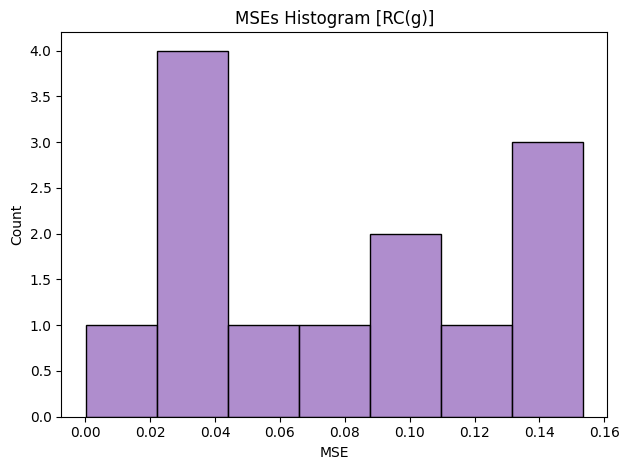

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


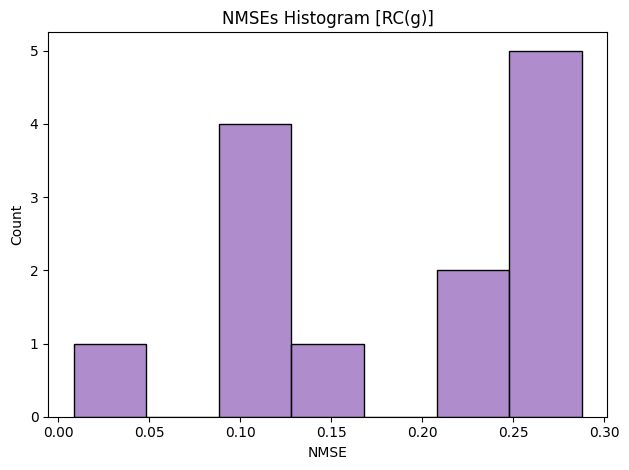

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


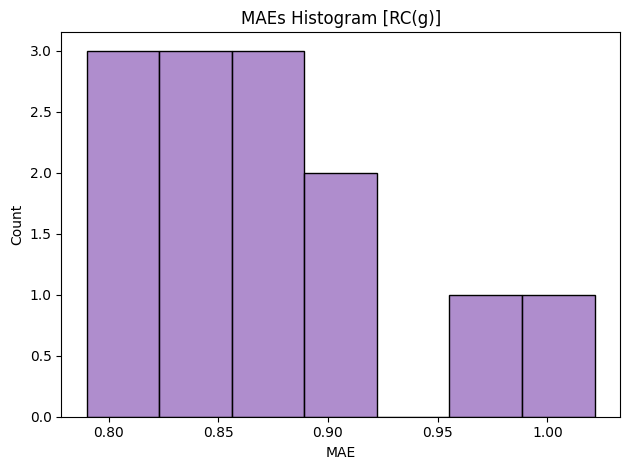

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


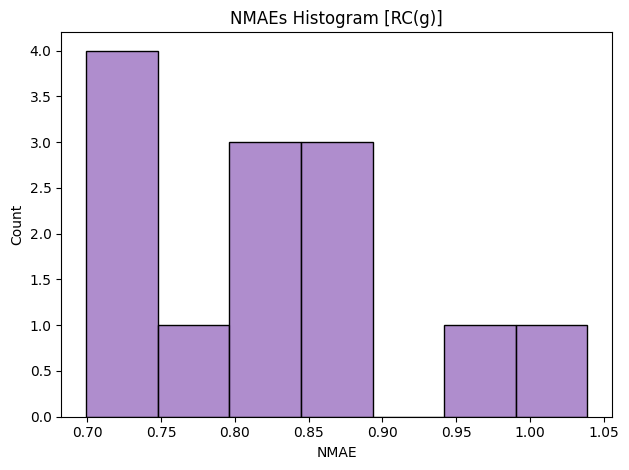

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


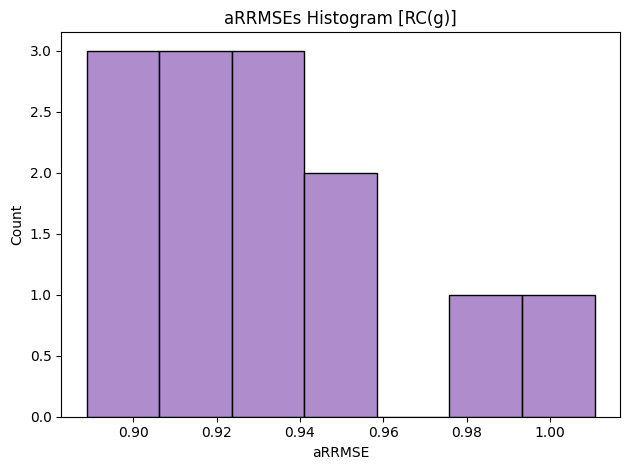

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


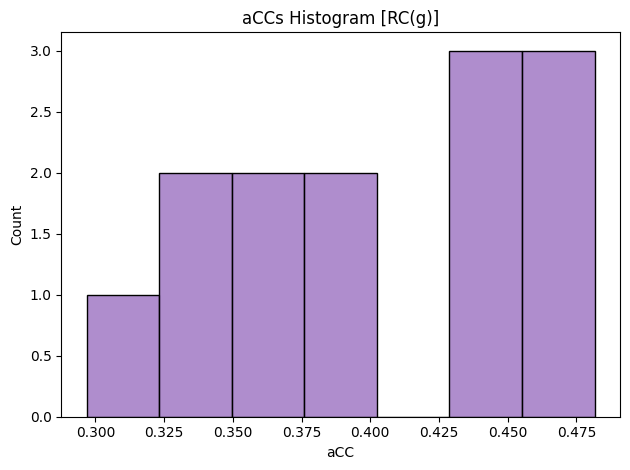

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


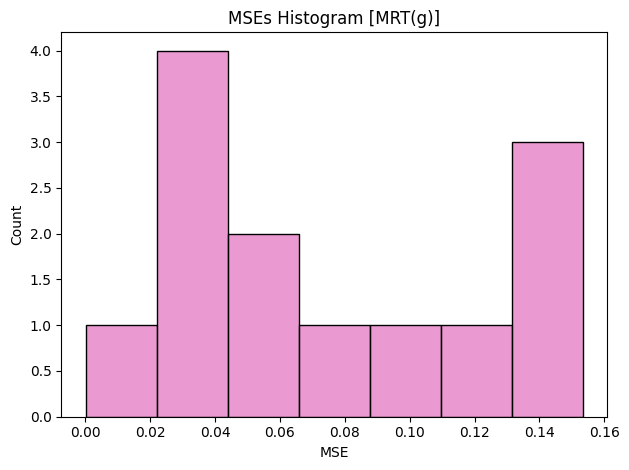

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


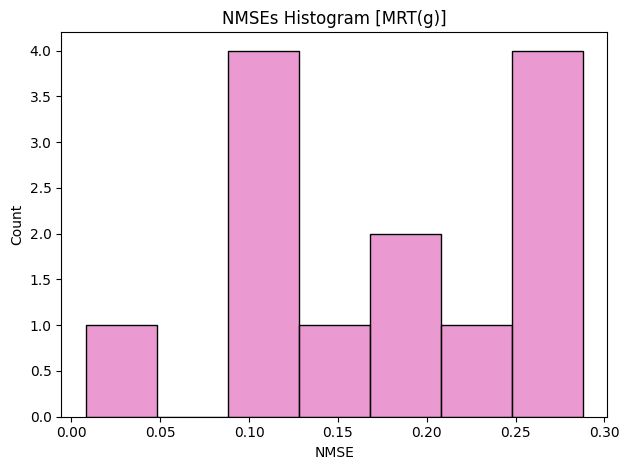

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


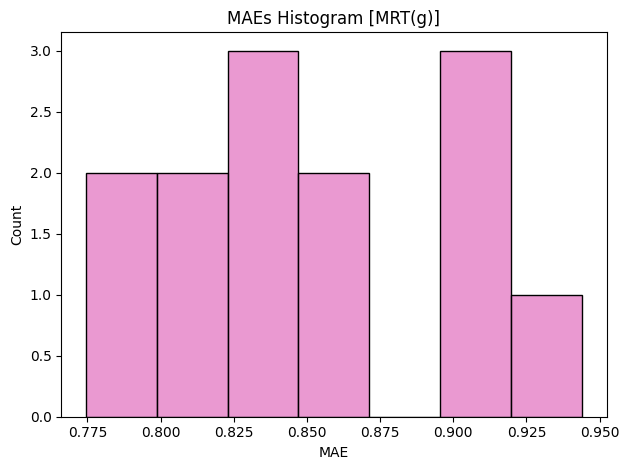

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


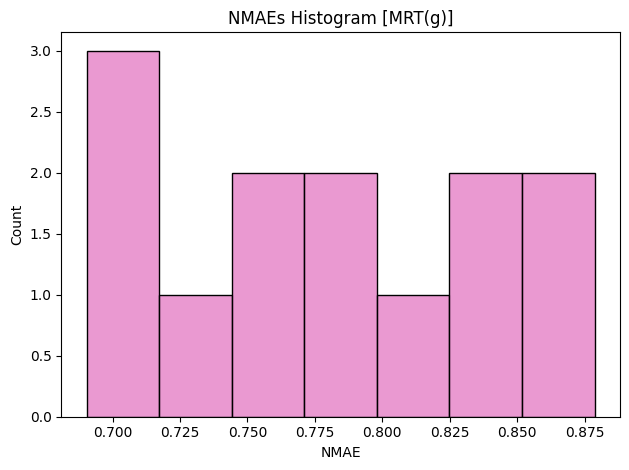

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


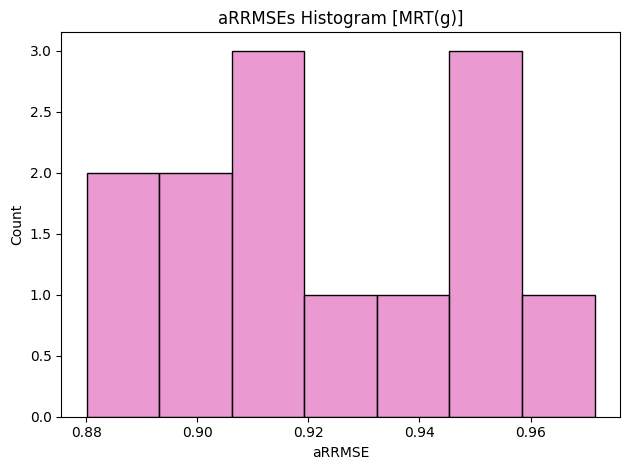

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


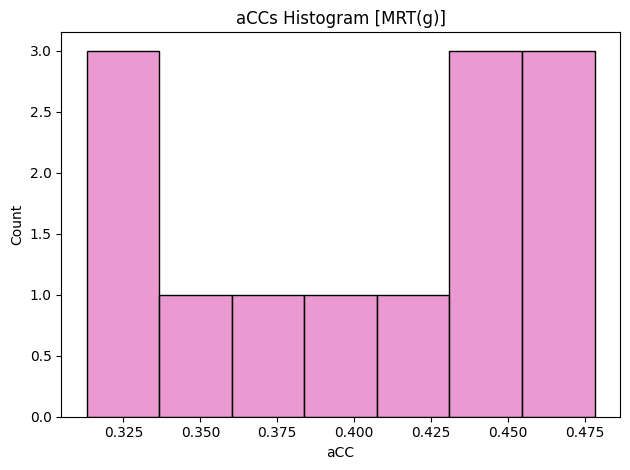

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


In [ ]:
dicio = {'RC': {'color': class_palette[0], 'code': 'RC'},
         'MRT': {'color': class_palette[1], 'code': 'MRT'},
         'ST': {'color': class_palette[3], 'code': 'ST'},
         'M-SVR': {'color': class_palette[2], 'code': 'MSVR'},
         'M-SVR(g)': {'color': class_palette[-2], 'code': 'MSVRG'},
         'RC(g)': {'color': class_palette[-3], 'code': 'RCG'},
         'MRT(g)': {'color': class_palette[-1], 'code': 'MRTG'}}

for a in dicio.keys():
    for mt in ['MSE', 'NMSE', 'MAE', 'NMAE', 'aRRMSE', 'aCC']:
        plt.title(f'{mt}s Histogram [{a}]')
        imgplt = sns.histplot(results_df.loc[results_df['Assessor']==a,['Assessor','Model',mt]], x=mt, bins=7, color=dicio[a]['color'])
        plt.tight_layout()
        plt.show(imgplt)
        imgplt.figure.savefig(f'data/{DIR}/imgs/hg_{dicio[a]["code"]}_{mt.lower()}.eps', format='eps', dpi=300)

In [196]:
results_df

Assessor       Model       MSE       MAE      NMSE      NMAE    aRRMSE  \
0        ST       dtree  0.153325  0.849345  0.287726  0.796725  0.921599   
1        ST         sgd  0.041294  0.805318  0.124518  0.701221  0.897395   
2        ST          lr  0.037319  0.808483  0.116097  0.695384  0.899157   
3        ST         knn  0.122224  0.898261  0.270177  0.878673  0.947766   
4        ST  svm_linear  0.042197  0.825686  0.122798  0.696288  0.908673   
..      ...         ...       ...       ...       ...       ...       ...   
86    RC(g)         kan  0.032466  0.824435  0.102386  0.715437  0.907984   
87    RC(g)     rforest  0.070478  0.858956  0.219478  0.960591  0.926799   
88    RC(g)          gb  0.138433  0.882543  0.257027  0.783275  0.939438   
89    RC(g)        adab  0.000258  0.826838  0.008307  0.837356  0.909306   
90    RC(g)         xgb  0.095387  0.873833  0.213429  0.818208   0.93479   

         aCC  
0     0.3973  
1   0.462458  
2   0.462045  
3   0.333111  
4   0.441369  
..       ...  
86  0.437141  
87  0.481603  
88  0.360295  
89  0.438088  
90  0.390474  

[91 rows x 8 columns]

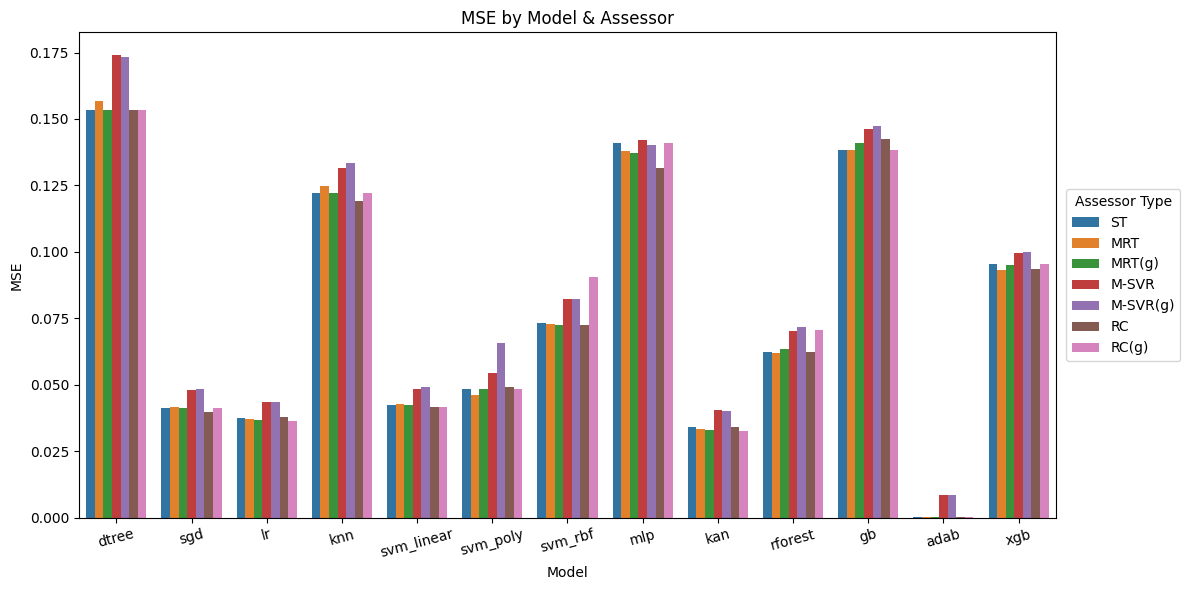

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


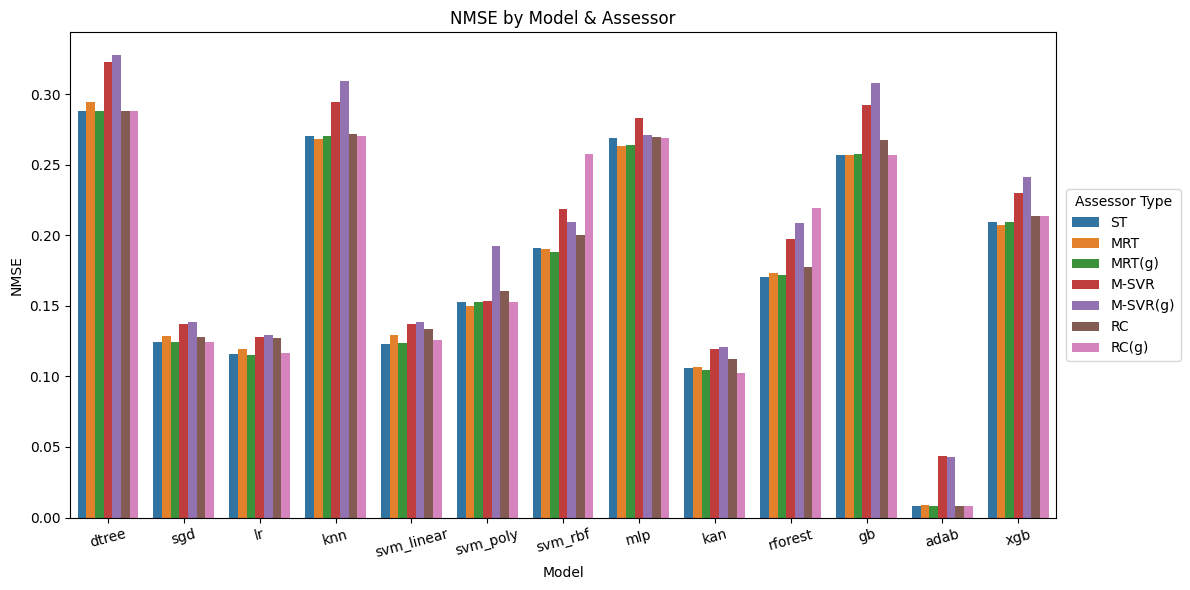

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


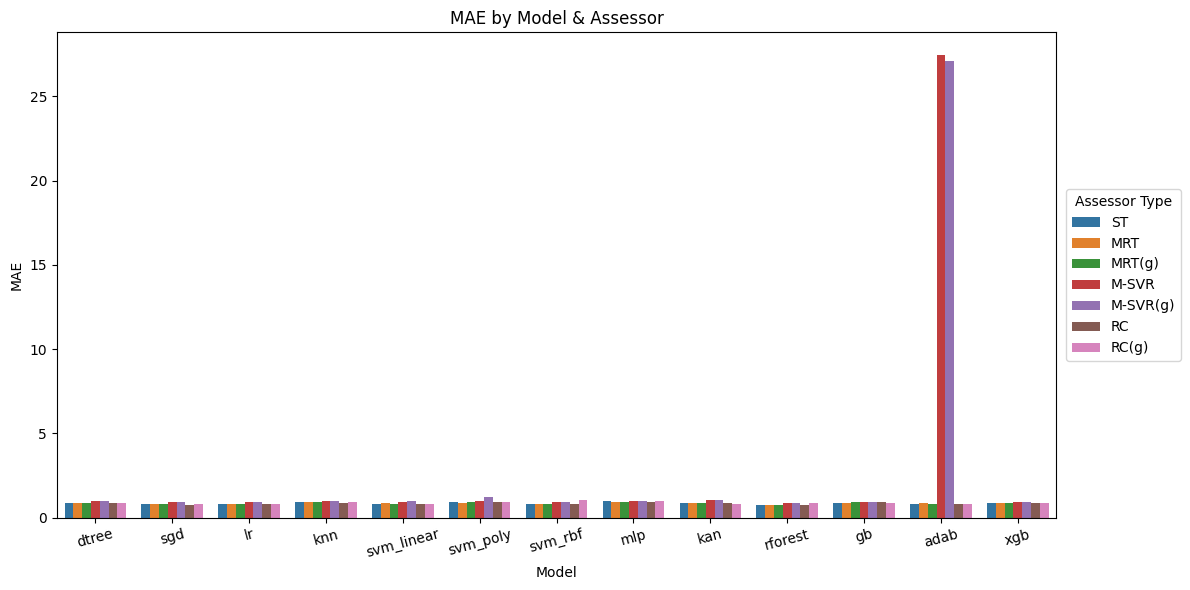

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


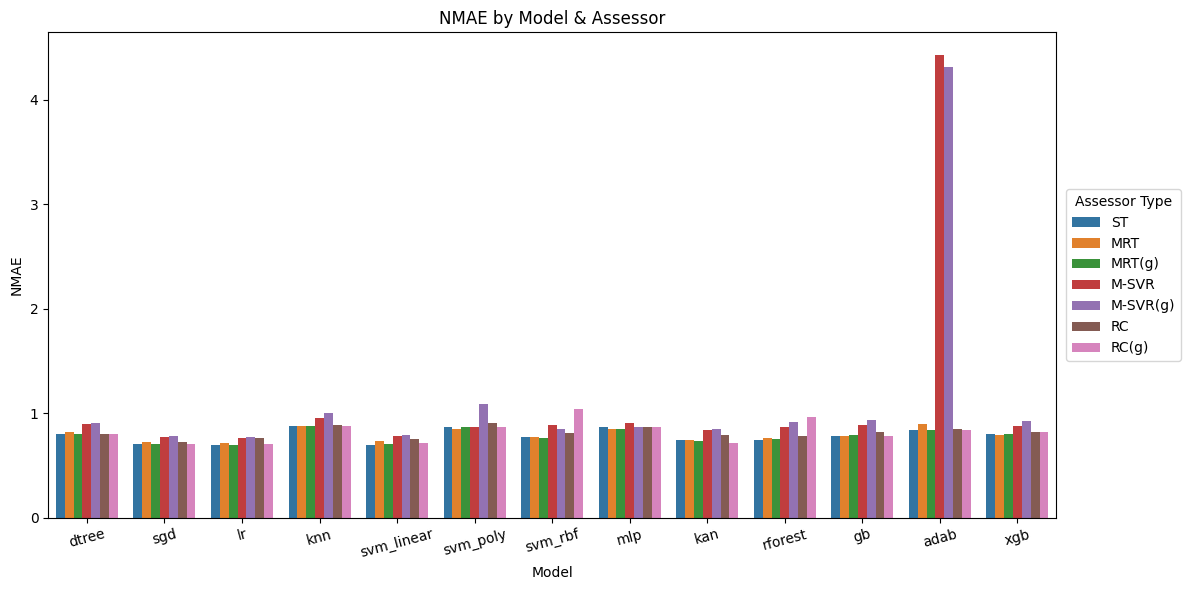

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


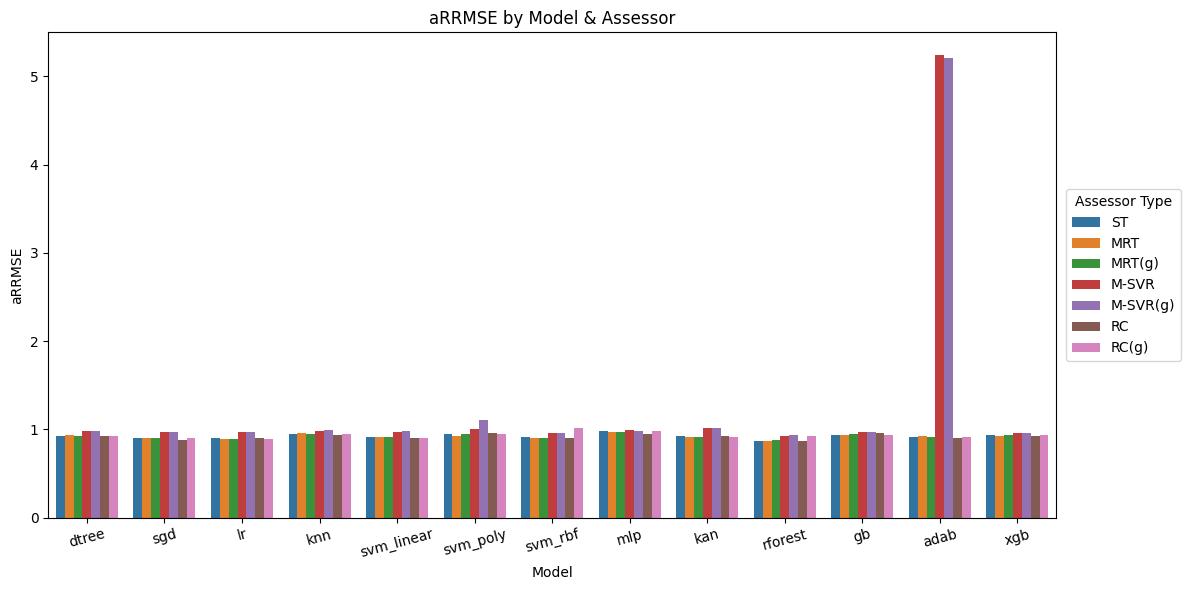

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


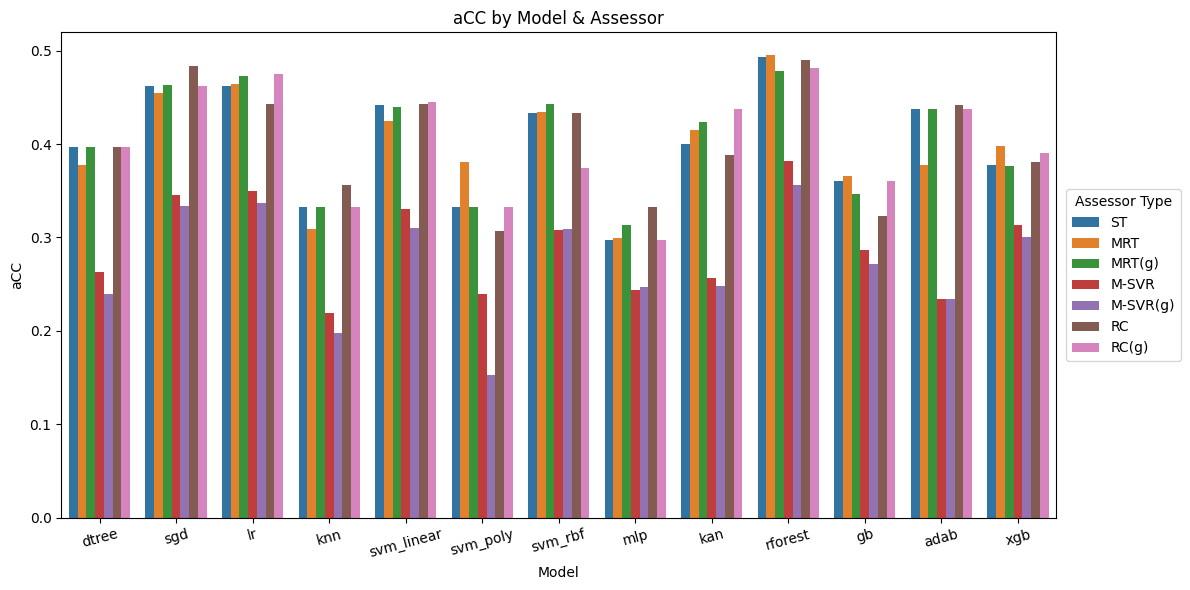

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


In [170]:
for mt in ['MSE', 'NMSE', 'MAE', 'NMAE', 'aRRMSE', 'aCC']:
    plt.figure(figsize=(12, 6))
    imgplt = sns.barplot(data=results_df, x='Model', y=mt, hue='Assessor', palette=class_palette)
    plt.legend(bbox_to_anchor=(1.01, 0.5), loc='center left', borderaxespad=0, title='Assessor Type')
    plt.title(f'{mt} by Model & Assessor')
    plt.xticks(rotation=15)
    plt.tight_layout()
    plt.show(imgplt)
    imgplt.figure.savefig(f'data/{DIR}/imgs/bar_{mt.lower()}.eps', format='eps', dpi=300)

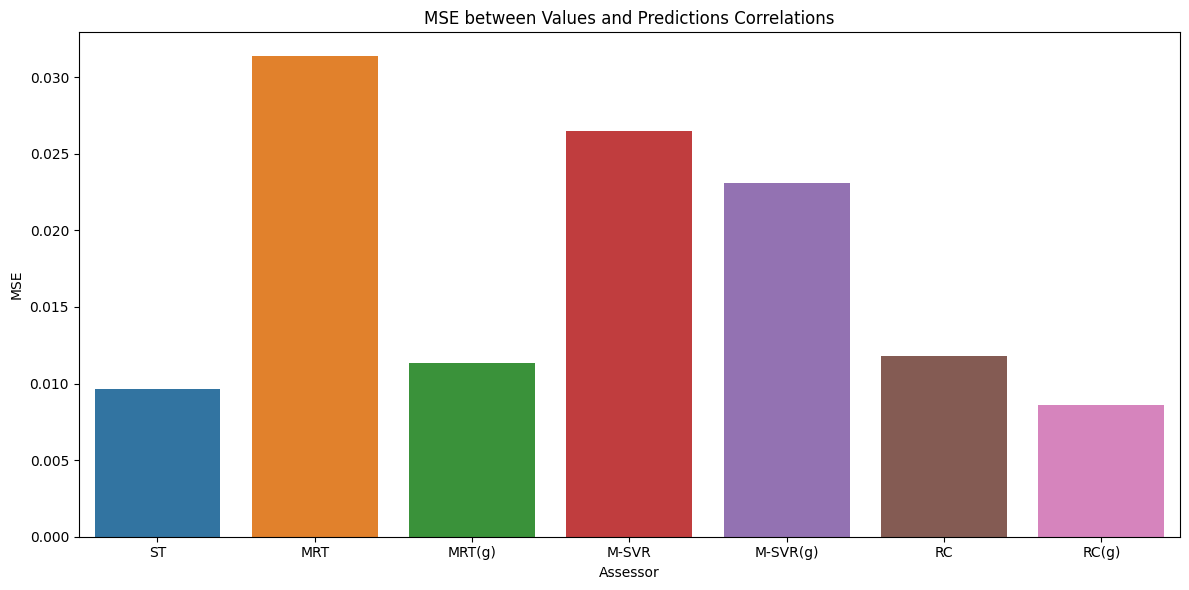

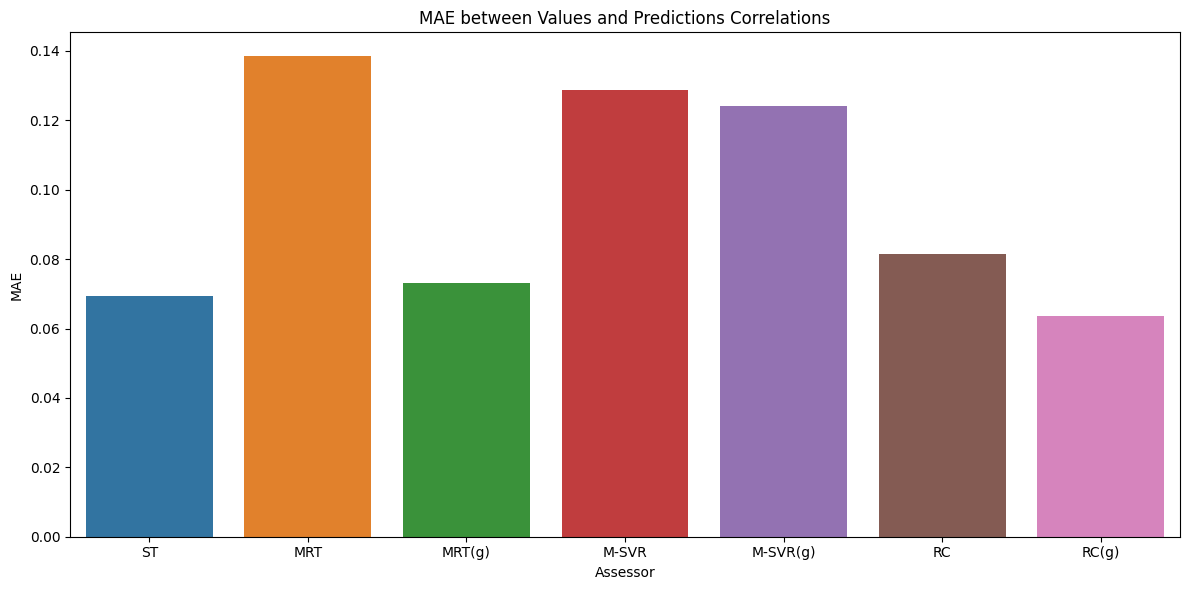

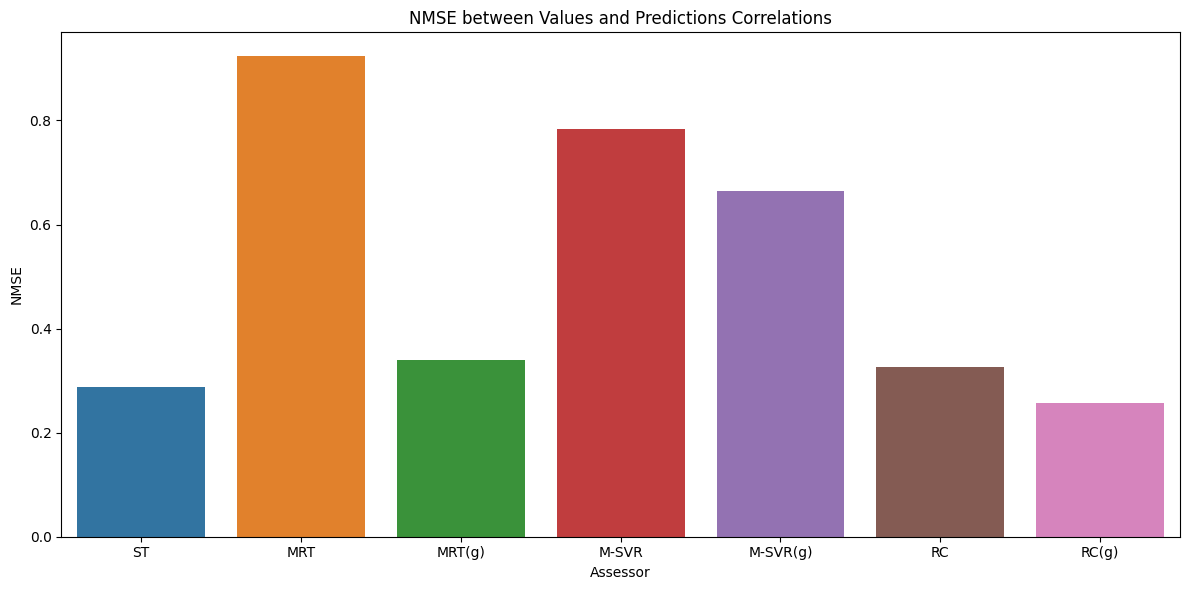

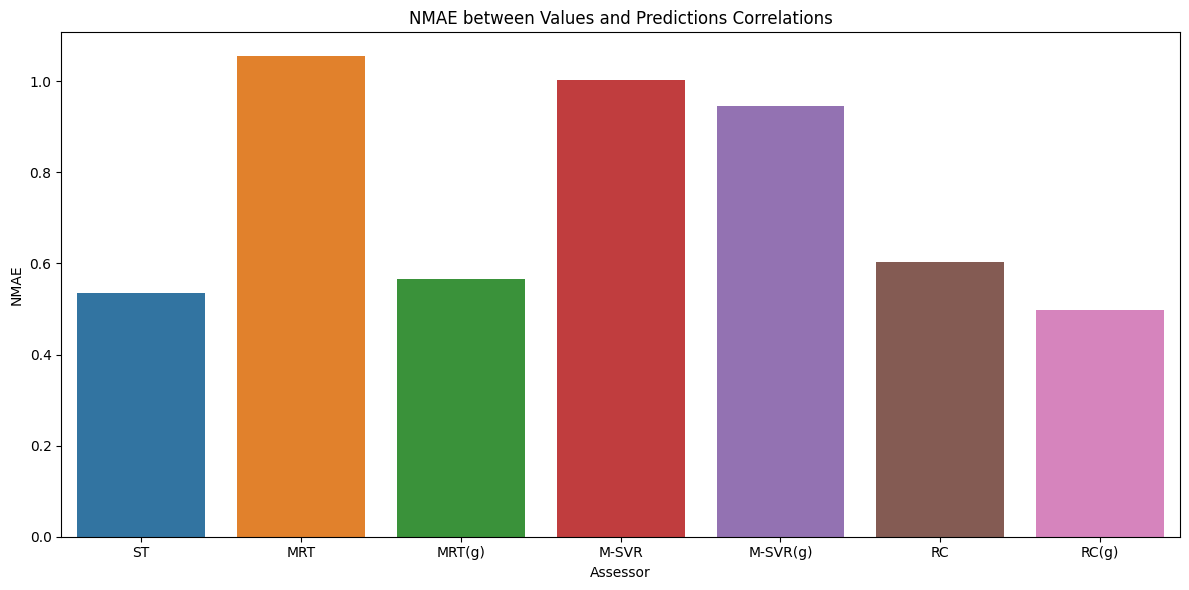

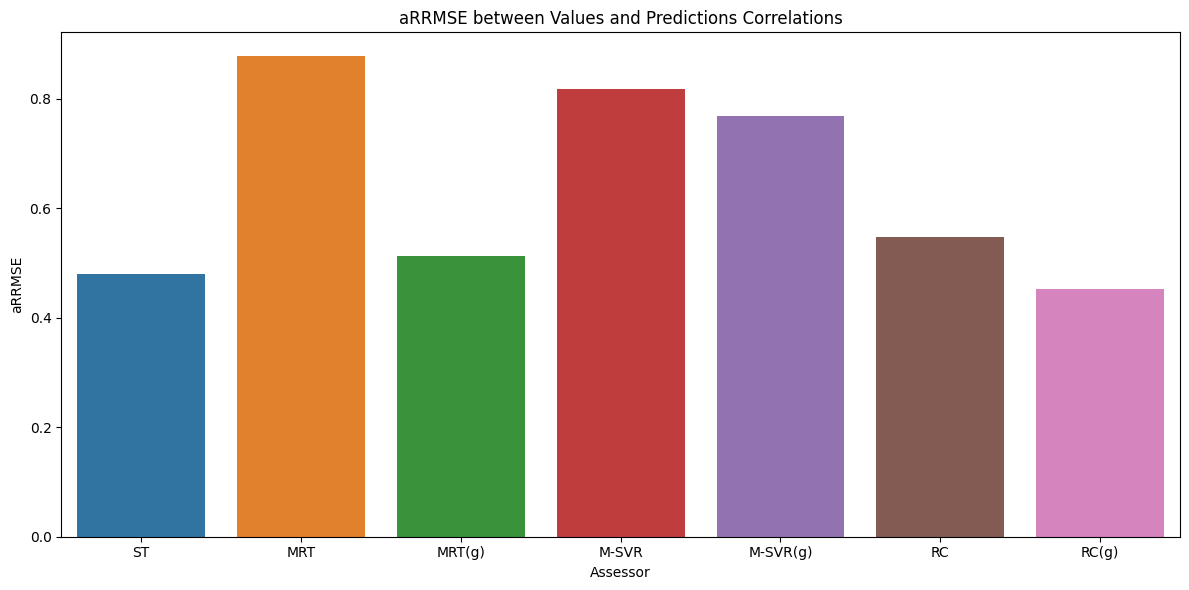

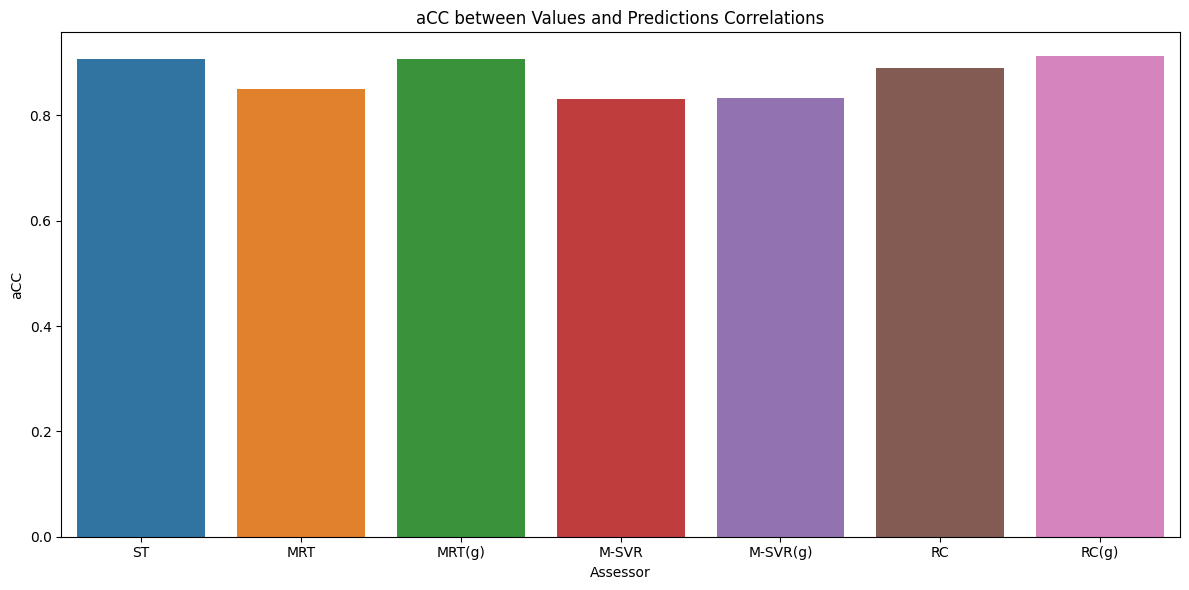

In [201]:
for mt in diff_metrics.columns:
    plt.figure(figsize=(12, 6))
    imgplt = sns.barplot(data=diff_results.loc[:,['Assessor', mt]], x='Assessor', y=mt, hue='Assessor', palette=class_palette)
    plt.title(f"{mt} between Values and Predictions Correlations")
    plt.tight_layout()
    plt.show(imgplt)
    imgplt.figure.savefig(f'data/{DIR}/imgs/bardiff_{mt.lower()}.eps', format='eps', dpi=300)